In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

# **Audio Feature Extraction using Librosa**

**Import libraries**

In [ ]:
%matplotlib inline  
!pip install librosa
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#audio = '/content/Audio/Kushal_Q.No-12.wav'
#y , sr = librosa.load(audio, sr = 44100)
#print(type(y), type(sr))
#print(y.shape, sr)


Y = []
SR = []
import glob
for audio in glob.glob("/content/Audio/*.wav"):
  y , sr = librosa.load(audio, sr = 44100)
  Y.append(y)
  SR.append(sr)

Y = np.array(Y)
SR = np.array(SR)

chroma_stft_list = []
#np.array(chroma_stft_list)
for i in range(0,2):
  chroma_stft = librosa.feature.chroma_stft(y=Y[i], sr=SR[i])
  chroma_stft_list.append(chroma_stft)

chroma_stft_list = np.array(chroma_stft_list)
chroma_stft_list, type(chroma_stft_list), chroma_stft_list.shape
#len(chroma_stft_list)

(array([[[0.10486655, 0.08058047, 0.07724099, ..., 1.        ,
          1.        , 0.85694044],
         [0.10873397, 0.10474585, 0.19024216, ..., 0.86464532,
          0.81050104, 0.70063112],
         [0.14915784, 0.28366423, 0.61168058, ..., 0.8024083 ,
          0.57146972, 0.47255955],
         ...,
         [0.40456843, 0.21999351, 0.13383724, ..., 0.6223243 ,
          0.71654087, 0.85149383],
         [0.52298914, 0.4461703 , 0.34561155, ..., 0.88690535,
          0.78346883, 0.89634825],
         [0.34872643, 0.26926919, 0.20165665, ..., 0.94030458,
          0.9613462 , 1.        ]],
 
        [[0.15019803, 0.51622475, 0.48856301, ..., 0.73745596,
          0.78853846, 0.86781131],
         [0.1304554 , 1.        , 0.64565268, ..., 0.31064316,
          0.37708142, 0.32828264],
         [0.06945361, 0.50365377, 0.68458911, ..., 0.80137126,
          0.62282255, 0.56981869],
         ...,
         [0.65754532, 0.35044631, 0.35719245, ..., 0.08900361,
          0.13137775, 0.

In [ ]:
chroma_stft_list_min = [[] for i in range(2)]
chroma_stft_list_max = [[] for i in range(2)]
chroma_stft_list_range = [[] for i in range(2)]
chroma_stft_list_mean = [[] for i in range(2)]
chroma_stft_list_median = [[] for i in range(2)]
chroma_stft_list_var = [[] for i in range(2)]
chroma_stft_list_std = [[] for i in range(2)]

for j in range(0,2):
  for i in range(0, 12):
    chroma_stft_list_min[j].append(np.min(chroma_stft_list[j][i]))
    chroma_stft_list_max[j].append(np.max(chroma_stft_list[j][i]))
    chroma_stft_list_range[j].append(chroma_stft_list_max[j][i] - chroma_stft_list_min[j][i])
    chroma_stft_list_mean[j].append(np.mean(chroma_stft_list[j][i]))
    chroma_stft_list_median[j].append(np.median(chroma_stft_list[j][i]))
    chroma_stft_list_var[j].append(np.var(chroma_stft_list[j][i]))
    chroma_stft_list_std[j].append(np.std(chroma_stft_list[j][i]))


chroma_stft_list_q25 = [[] for i in range(2)]
chroma_stft_list_q50 = [[] for i in range(2)]
chroma_stft_list_q75 = [[] for i in range(2)]

for j in range(0,2):
  for i in range(0, 12):
    chroma_stft_list_q25[j].append(np.percentile(chroma_stft_list[j][i], 25))
    chroma_stft_list_q50[j].append(np.percentile(chroma_stft_list[j][i], 50))
    chroma_stft_list_q75[j].append(np.percentile(chroma_stft_list[j][i], 75))

chroma_stft_list_IQR = [[] for i in range(2)]
for j in range(0,2):
  for i in range (0, 12):
    chroma_stft_list_IQR[j].append(chroma_stft_list_q75[j][i] - chroma_stft_list_q25[j][i])


header = []
for i in range(0,12):
    header.append('chroma_stft_min_'+str(i))
for i in range(0,12):  
    header.append('chroma_stft_max_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_range_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_mean_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_median_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_var_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_std_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_q25_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_q50_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_q75_'+str(i))
for i in range(0,12):
    header.append('chroma_stft_IQR_'+str(i))


chroma_stft__list_df = pd.DataFrame(np.concatenate([chroma_stft_list_min, chroma_stft_list_max, chroma_stft_list_range, chroma_stft_list_mean, chroma_stft_list_median, chroma_stft_list_var, chroma_stft_list_std, chroma_stft_list_q25, chroma_stft_list_q50, chroma_stft_list_q75, chroma_stft_list_IQR], axis=1))

chroma_stft__list_df.columns = header
chroma_stft__list_df

chroma_stft_min_0  chroma_stft_min_1  ...  chroma_stft_IQR_10  chroma_stft_IQR_11
0           0.000000           0.000000  ...            0.559492            0.554739
1           0.000144           0.000145  ...            0.554095            0.533701

[2 rows x 132 columns]

In [ ]:
import IPython.display as ipd
ipd.Audio(audio)

**Audio Overview:**

In [ ]:
print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(y)))
secs=np.size(y)/sr
print('Audio Length: '+str(secs)+' s')
#IPython.display.Audio(audio)

Audio Sampling Rate: 44100 samples/sec
Total Samples: 1846791
Audio Length: 41.87734693877551 s


**Visualize the audio file**

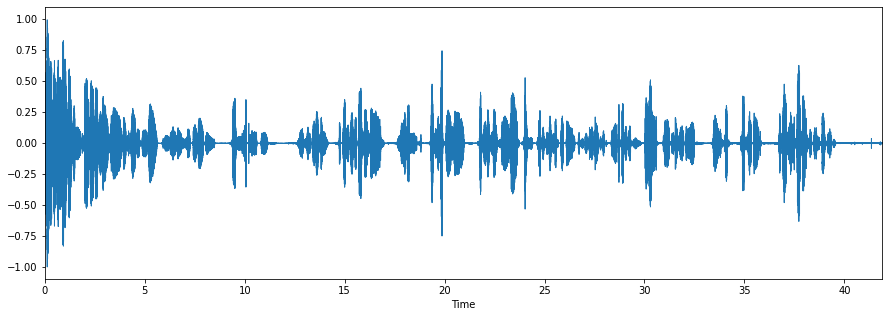

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr)

**Spectogram**

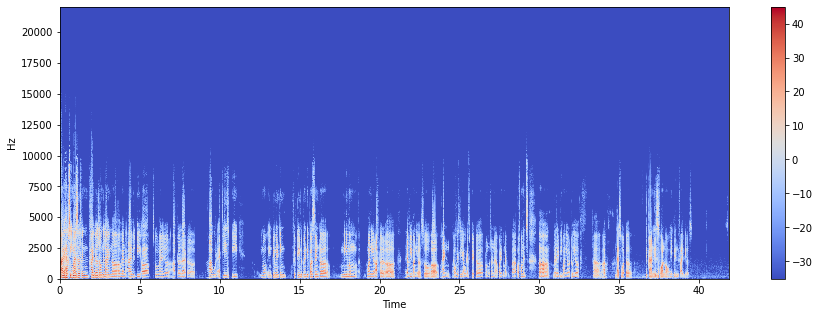

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## **Feature Extraction**

**1. Spectral Features**

**a) chroma_stft  (Compute a chromagram from a waveform or power spectrogram)**

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_stft, type(chroma_stft), chroma_stft.shape

(array([[0.39720424, 0.72630206, 0.69775309, ..., 0.59805287, 0.96548354,
         0.72991426],
        [0.44558405, 1.        , 0.60271315, ..., 0.53746999, 0.49388354,
         0.38616151],
        [0.85193448, 0.9671454 , 0.36807848, ..., 0.42384548, 0.29430784,
         0.27743007],
        ...,
        [0.23019788, 0.21445891, 0.13271076, ..., 0.88707111, 0.90707338,
         0.89937879],
        [0.42199251, 0.2093258 , 0.19748561, ..., 0.73586381, 0.96574924,
         1.        ],
        [0.44993225, 0.45431858, 0.366446  , ..., 0.54775479, 1.        ,
         0.96972464]]), numpy.ndarray, (12, 3608))

In [ ]:
chroma_stft_min = np.min(chroma_stft,axis=1)
chroma_stft_max = np.max(chroma_stft,axis=1)
chroma_stft_range = chroma_stft_max - chroma_stft_min
chroma_stft_mean = np.mean(chroma_stft,axis=1)
chroma_stft_median = np.median(chroma_stft,axis=1)
chroma_stft_var = np.var(chroma_stft,axis=1)
chroma_stft_std = np.std(chroma_stft,axis=1)


chroma_stft_q25 = []
chroma_stft_q50 = []
chroma_stft_q75 = []

for i in range(0, len(chroma_stft)):
  chroma_stft_q25.append(np.percentile(chroma_stft[i], 25))
  chroma_stft_q50.append(np.percentile(chroma_stft[i], 50))
  chroma_stft_q75.append(np.percentile(chroma_stft[i], 75))

chroma_stft_IQR = []
for i in range (0, len(chroma_stft)):
  chroma_stft_IQR.append(chroma_stft_q75[i] - chroma_stft_q25[i])


#Generate the chromagram Dataframe
chroma_stft_df=pd.DataFrame()
for i in range(0,12):
    chroma_stft_df['chroma_stft_min_'+str(i)] = chroma_stft_min[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_max_'+str(i)] = chroma_stft_max[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_range_'+str(i)] = chroma_stft_range[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_mean_'+str(i)] = chroma_stft_mean[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_median_'+str(i)] = chroma_stft_median[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_var_'+str(i)] = chroma_stft_var[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_std_'+str(i)] = chroma_stft_std[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_q25_'+str(i)] = chroma_stft_q25[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_q50_'+str(i)] = chroma_stft_q50[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_q75_'+str(i)] = chroma_stft_q75[i]
for i in range(0,12):
    chroma_stft_df['chroma_stft_IQR_'+str(i)] = chroma_stft_IQR[i]


chroma_stft_df.loc[0]=np.concatenate((chroma_stft_min, chroma_stft_max, chroma_stft_range, chroma_stft_mean, chroma_stft_median, chroma_stft_var, chroma_stft_std, chroma_stft_q25, chroma_stft_q50, chroma_stft_q75, chroma_stft_IQR),axis=0)
chroma_stft_df

chroma_stft_min_0  chroma_stft_min_1  ...  chroma_stft_IQR_10  chroma_stft_IQR_11
0            0.00804           0.007399  ...            0.480304             0.53473

[1 rows x 132 columns]

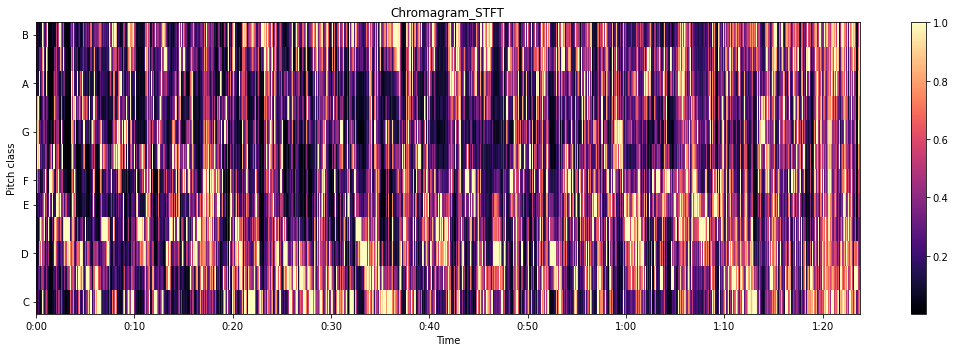

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram_STFT')
plt.tight_layout()
plt.show()

**b) chroma_cqt (Constant-Q chromagram)**

In [ ]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_cqt,  type(chroma_cqt), chroma_cqt.shape

(array([[1.        , 0.90286113, 1.        , ..., 0.86014301, 0.86318063,
         0.91884812],
        [0.91301282, 1.        , 0.80045273, ..., 0.73382163, 0.64254478,
         0.69995946],
        [0.85352145, 0.65791959, 0.41337063, ..., 0.66977193, 0.61749456,
         0.59398158],
        ...,
        [0.495276  , 0.38923019, 0.42000217, ..., 0.85799519, 0.99900275,
         1.        ],
        [0.99570927, 0.70917534, 0.65635962, ..., 0.74005351, 0.90873088,
         0.9571586 ],
        [0.79378665, 0.75987427, 0.8868557 , ..., 0.58504503, 0.82110036,
         0.80941196]]), numpy.ndarray, (12, 3608))

In [ ]:
chroma_cqt_min = np.min(chroma_cqt,axis=1)
chroma_cqt_max = np.max(chroma_cqt,axis=1)
chroma_cqt_range = chroma_cqt_max - chroma_cqt_min
chroma_cqt_mean = np.mean(chroma_cqt,axis=1)
chroma_cqt_median = np.median(chroma_cqt,axis=1)
chroma_cqt_var = np.var(chroma_cqt,axis=1)
chroma_cqt_std = np.std(chroma_cqt,axis=1)


chroma_cqt_q25 = []
chroma_cqt_q50 = []
chroma_cqt_q75 = []

for i in range(0, len(chroma_stft)):
  chroma_cqt_q25.append(np.percentile(chroma_cqt[i], 25))
  chroma_cqt_q50.append(np.percentile(chroma_cqt[i], 50))
  chroma_cqt_q75.append(np.percentile(chroma_cqt[i], 75))

chroma_cqt_IQR = []
for i in range (0, len(chroma_cqt)):
  chroma_cqt_IQR.append(chroma_cqt_q75[i] - chroma_cqt_q25[i])


#Generate the chroma_cqt Dataframe
chroma_cqt_df=pd.DataFrame()
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_min_'+str(i)] = chroma_cqt_min[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_max_'+str(i)] = chroma_cqt_max[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_range_'+str(i)] = chroma_cqt_range[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_mean_'+str(i)] = chroma_cqt_mean[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_median_'+str(i)] = chroma_cqt_median[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_var_'+str(i)] = chroma_cqt_var[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_std_'+str(i)] = chroma_cqt_std[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_q25_'+str(i)] = chroma_cqt_q25[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_q50_'+str(i)] = chroma_cqt_q50[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_q75_'+str(i)] = chroma_cqt_q75[i]
for i in range(0,len(chroma_cqt)):
    chroma_cqt_df['chroma_cqt_IQR_'+str(i)] = chroma_cqt_IQR[i]


chroma_cqt_df.loc[0]=np.concatenate((chroma_cqt_min, chroma_cqt_max, chroma_cqt_range, chroma_cqt_mean, chroma_cqt_median, chroma_cqt_var, chroma_cqt_std, chroma_cqt_q25, chroma_cqt_q50, chroma_cqt_q75, chroma_cqt_IQR), axis=0)
chroma_cqt_df

chroma_cqt_min_0  chroma_cqt_min_1  ...  chroma_cqt_IQR_10  chroma_cqt_IQR_11
0          0.045835          0.026965  ...           0.454224            0.46359

[1 rows x 132 columns]

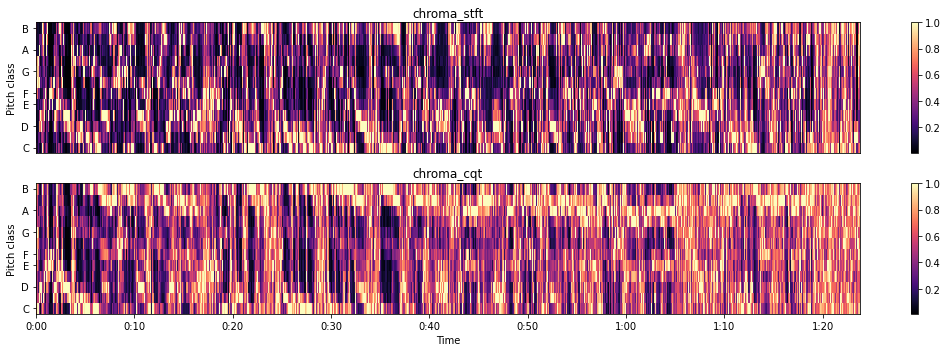

In [ ]:
#Compare a long-window STFT chromagram to the CQT chromagram

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
librosa.display.specshow(chroma_stft, y_axis='chroma')
plt.title('chroma_stft')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time')
plt.title('chroma_cqt')
plt.colorbar()
plt.tight_layout()
plt.show()

**c) chroma_cens  (Computes the chroma variant “Chroma Energy Normalized” (CENS))**

In [ ]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cens, type(chroma_cens), chroma_cens.shape

(array([[0.45643811, 0.45461747, 0.45192731, ..., 0.29218355, 0.29303641,
         0.29406229],
        [0.30507343, 0.3072477 , 0.31062487, ..., 0.21797472, 0.2204677 ,
         0.22305847],
        [0.18773821, 0.1889703 , 0.19231576, ..., 0.22422628, 0.22510325,
         0.22619017],
        ...,
        [0.19334462, 0.19169311, 0.1904525 , ..., 0.34575642, 0.34506608,
         0.3448602 ],
        [0.24566361, 0.23536314, 0.22498876, ..., 0.29859536, 0.29701723,
         0.29597609],
        [0.37328606, 0.3667221 , 0.35947179, ..., 0.30457817, 0.30007399,
         0.29537643]]), numpy.ndarray, (12, 3608))

In [ ]:
chroma_cens_min = np.min(chroma_cens,axis=1)
chroma_cens_max = np.max(chroma_cens,axis=1)
chroma_cens_range = chroma_cens_max - chroma_cens_min
chroma_cens_mean = np.mean(chroma_cens,axis=1)
chroma_cens_median = np.median(chroma_cens,axis=1)
chroma_cens_var = np.var(chroma_cens,axis=1)
chroma_cens_std = np.std(chroma_cens,axis=1)


chroma_cens_q25 = []
chroma_cens_q50 = []
chroma_cens_q75 = []

for i in range(0, len(chroma_cens)):
  chroma_cens_q25.append(np.percentile(chroma_cens[i], 25))
  chroma_cens_q50.append(np.percentile(chroma_cens[i], 50))
  chroma_cens_q75.append(np.percentile(chroma_cens[i], 75))

chroma_cens_IQR = []
for i in range (0, len(chroma_cens)):
  chroma_cens_IQR.append(chroma_cens_q75[i] - chroma_cens_q25[i])


#Generate the chroma_cen Dataframe
chroma_cens_df=pd.DataFrame()
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_min_'+str(i)] = chroma_cens_min[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_max_'+str(i)] = chroma_cens_max[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_range_'+str(i)] = chroma_cens_range[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_mean_'+str(i)] = chroma_cens_mean[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_median_'+str(i)] = chroma_cens_median[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_var_'+str(i)] = chroma_cens_var[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_std_'+str(i)] = chroma_cens_std[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_q25_'+str(i)] = chroma_cens_q25[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_q50_'+str(i)] = chroma_cens_q50[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_q75_'+str(i)] = chroma_cens_q75[i]
for i in range(0,len(chroma_cens)):
    chroma_cens_df['chroma_cens_IQR_'+str(i)] = chroma_cens_IQR[i]


chroma_cens_df.loc[0]=np.concatenate((chroma_cens_min, chroma_cens_max, chroma_cens_range, chroma_cens_mean, chroma_cens_median, chroma_cens_var, chroma_cens_std, chroma_cens_q25, chroma_cens_q50, chroma_cens_q75, chroma_cens_IQR), axis=0)
chroma_cens_df

chroma_cens_min_0  chroma_cens_min_1  ...  chroma_cens_IQR_10  chroma_cens_IQR_11
0           0.024779            0.02778  ...            0.164551            0.154966

[1 rows x 132 columns]

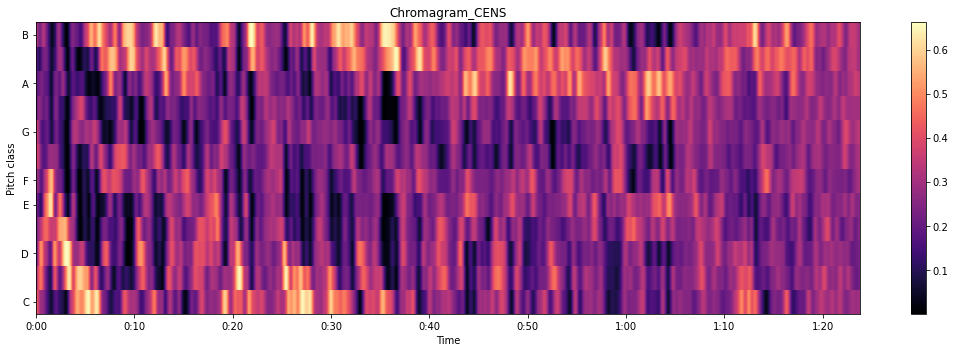

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram_CENS')
plt.tight_layout()
plt.show()

**d) Melspectogram (Compute a mel-scaled spectrogram)**

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spec, type(mel_spec), mel_spec.shape

(array([[2.24919868e-01, 4.11258763e-01, 1.18186045e-01, ...,
         1.77266569e-05, 5.68944358e-05, 2.16815610e-04],
        [2.99043395e-01, 7.74305345e-01, 1.90349316e-01, ...,
         1.04666802e-04, 1.25446404e-04, 1.17846138e-04],
        [7.20191480e-01, 3.36683420e+00, 3.62966196e+00, ...,
         6.94171763e-04, 6.07485511e-04, 1.06111984e-03],
        ...,
        [1.67206167e-09, 9.00306040e-09, 1.89738049e-08, ...,
         2.15479418e-09, 6.98833428e-07, 2.89305446e-06],
        [4.48858705e-10, 2.83004678e-09, 7.76323213e-09, ...,
         9.15709379e-10, 8.32404728e-07, 3.45127911e-06],
        [6.72586759e-11, 3.54948360e-10, 8.59556235e-10, ...,
         1.15458040e-10, 7.86606036e-07, 3.26447304e-06]]),
 numpy.ndarray,
 (128, 3608))

In [ ]:
mel_spec_min = np.min(mel_spec,axis=1)
mel_spec_max = np.max(mel_spec,axis=1)
mel_spec_range = mel_spec_max - mel_spec_min
mel_spec_mean = np.mean(mel_spec,axis=1)
mel_spec_median = np.median(mel_spec,axis=1)
mel_spec_var = np.var(mel_spec,axis=1)
mel_spec_std = np.std(mel_spec,axis=1)


mel_spec_q25 = []
mel_spec_q50 = []
mel_spec_q75 = []

for i in range(0, len(mel_spec)):
  mel_spec_q25.append(np.percentile(mel_spec[i], 25))
  mel_spec_q50.append(np.percentile(mel_spec[i], 50))
  mel_spec_q75.append(np.percentile(mel_spec[i], 75))

mel_spec_IQR = []
for i in range (0, len(mel_spec)):
  mel_spec_IQR.append(mel_spec_q75[i] - mel_spec_q25[i])


#Generate the Mel-Scaled-Spectogram Dataframe
mel_spec_df=pd.DataFrame()
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_min_'+str(i)] = mel_spec_min[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_max_'+str(i)] = mel_spec_max[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_range_'+str(i)] = mel_spec_range[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_mean_'+str(i)] = mel_spec_mean[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_median_'+str(i)] = mel_spec_median[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_var_'+str(i)] = mel_spec_var[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_std_'+str(i)] = mel_spec_std[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_q25_'+str(i)] = mel_spec_q25[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_q50_'+str(i)] = mel_spec_q50[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_q75_'+str(i)] = mel_spec_q75[i]
for i in range(0,len(mel_spec)):
    mel_spec_df['mel_spec_IQR_'+str(i)] = mel_spec_IQR[i]


mel_spec_df.loc[0]=np.concatenate((mel_spec_min, mel_spec_max, mel_spec_range, mel_spec_mean, mel_spec_median, mel_spec_var, mel_spec_std, mel_spec_q25, mel_spec_q50, mel_spec_q75, mel_spec_IQR), axis=0)
mel_spec_df

mel_spec_min_0  mel_spec_min_1  ...  mel_spec_IQR_126  mel_spec_IQR_127
0    9.874828e-09    1.098293e-07  ...      5.418669e-10      8.452277e-11

[1 rows x 1408 columns]

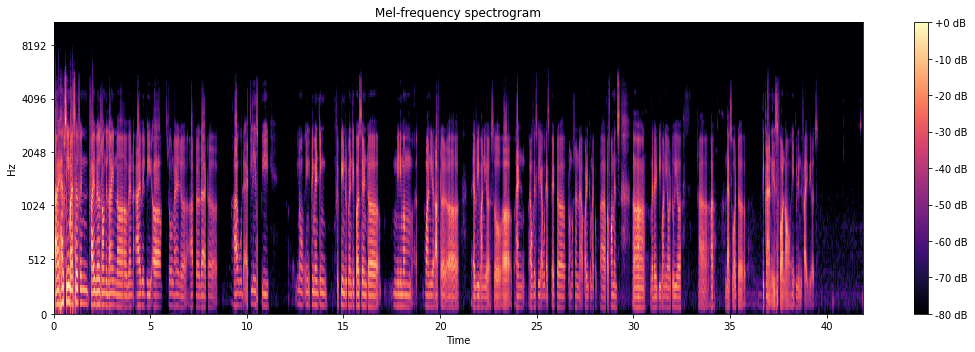

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

**e) MFCC  (Mel-frequency cepstral coefficients (MFCCs))**

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
mfccs, type(mfccs), mfccs.shape

(array([[-3.05780975e+02, -2.30032554e+02, -1.72279563e+02, ...,
         -5.33171604e+02, -5.27672642e+02, -5.24609625e+02],
        [ 1.95777737e+02,  2.33241994e+02,  2.33656855e+02, ...,
          3.51799596e+01,  4.25346595e+01,  4.68873740e+01],
        [-1.06132770e+01, -3.40448506e+01, -5.60975905e+01, ...,
          2.58947198e+01,  3.20129714e+01,  3.64040644e+01],
        ...,
        [-1.28337325e+00, -4.02496318e+00, -6.69976864e+00, ...,
         -2.99940375e-01,  6.60621632e-01,  4.83297472e-01],
        [ 9.47835104e-01, -2.58265815e+00, -9.77714486e+00, ...,
         -1.62013281e+00, -3.74349213e-01,  7.88676697e-01],
        [-5.86797096e-01,  1.02526603e+00,  4.06373497e-01, ...,
         -1.81830349e+00, -1.07958621e+00,  6.16566708e-01]]),
 numpy.ndarray,
 (40, 3608))

In [ ]:
mfccs_min = np.min(mfccs,axis=1)
mfccs_max = np.max(mfccs,axis=1)
mfccs_range = mfccs_max - mfccs_min
mfccs_mean = np.mean(mfccs,axis=1)
mfccs_median = np.median(mfccs,axis=1)
mfccs_var = np.var(mfccs,axis=1)
mfccs_std = np.std(mfccs,axis=1)


mfccs_q25 = []
mfccs_q50 = []
mfccs_q75 = []

for i in range(0, len(mfccs)):
  mfccs_q25.append(np.percentile(mfccs[i], 25))
  mfccs_q50.append(np.percentile(mfccs[i], 50))
  mfccs_q75.append(np.percentile(mfccs[i], 75))

mfccs_IQR = []
for i in range (0, len(mfccs)):
  mfccs_IQR.append(mfccs_q75[i] - mfccs_q25[i])


#Generate the MFCC Dataframe
mfccs_df = pd.DataFrame()
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_min_'+str(i)] = mfccs_min[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_max_'+str(i)] = mfccs_max[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_range_'+str(i)] = mfccs_range[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_mean_'+str(i)] = mfccs_mean[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_median_'+str(i)] = mfccs_median[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_var_'+str(i)] = mfccs_var[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_std_'+str(i)] = mfccs_std[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_q25_'+str(i)] = mfccs_q25[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_q50_'+str(i)] = mfccs_q50[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_q75_'+str(i)] = mfccs_q75[i]
for i in range(0,len(mfccs)):
    mfccs_df['mfccs_IQR_'+str(i)] = mfccs_IQR[i]


mfccs_df.loc[0]=np.concatenate((mfccs_min, mfccs_max, mfccs_range, mfccs_mean, mfccs_median, mfccs_var, mfccs_std, mfccs_q25, mfccs_q50, mfccs_q75, mfccs_IQR), axis=0)
mfccs_df

mfccs_min_0  mfccs_min_1  ...  mfccs_IQR_38  mfccs_IQR_39
0  -560.703112   -42.073554  ...      4.473603      4.330484

[1 rows x 440 columns]

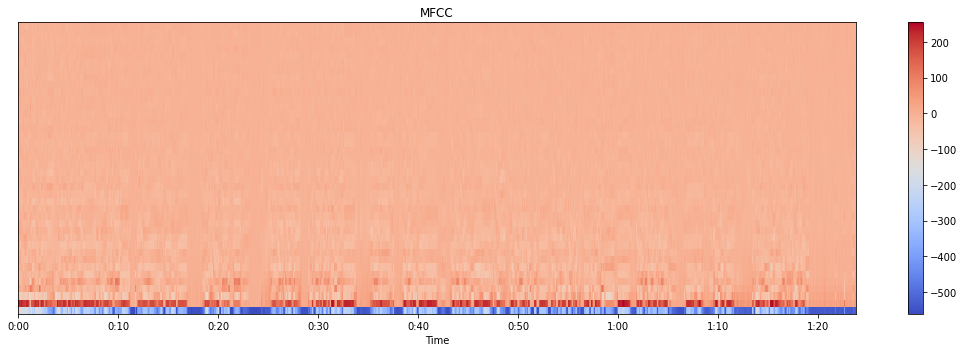

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

**f) RMS (Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S)**

In [ ]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
rms, type(rms), rms.shape

(array([[0.7105099 , 2.1985567 , 4.35602   , ..., 0.01706502, 0.02881522,
         0.05122487]], dtype=float32), numpy.ndarray, (1, 3608))

In [ ]:
rms_min = np.min(rms)
rms_max = np.max(rms)
rms_range = rms_max - rms_min
rms_mean = np.mean(rms)
rms_median = np.median(rms)
rms_var = np.var(rms)
rms_std = np.std(rms)
rms_q25 = np.percentile(rms, 25)
rms_q50 = np.percentile(rms, 50)
rms_q75 = np.percentile(rms, 75)
rms_IQR = rms_q75 - rms_q25

rms_list = [rms_min, rms_max, rms_range, rms_mean, rms_median, rms_var, rms_std, rms_q25, rms_q50, rms_q75, rms_IQR]

#Generate the RMS Dataframe
rms_df = pd.DataFrame(data = [rms_list], columns = ['rms_min', 'rms_max', 'rms_range', 'rms_mean', 'rms_median', 'rms_var', 'rms_std', 'rms_q25', 'rms_q50', 'rms_q75', 'rms_IQR'])
rms_df

rms_min   rms_max  rms_range  ...   rms_q50   rms_q75   rms_IQR
0  0.001998  8.994696   8.992697  ...  0.506161  1.306017  1.266055

[1 rows x 11 columns]

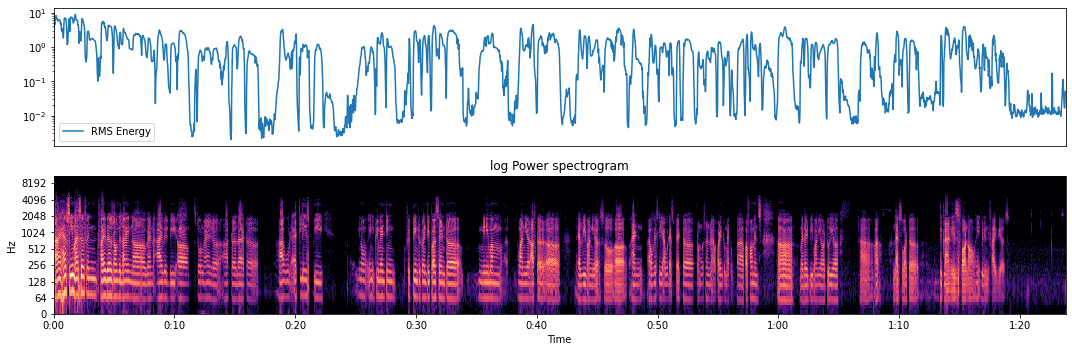

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

**g) Spectral Centroid (Compute the spectral centroid)**

In [ ]:
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_centroid, type(spec_centroid), spec_centroid.shape

(array([[1315.30461641, 1313.88809741, 1440.62495694, ..., 1709.79234332,
         4971.84471862, 5965.93095667]]), numpy.ndarray, (1, 3608))

In [ ]:
spec_centroid_min = np.min(spec_centroid)
spec_centroid_max = np.max(spec_centroid)
spec_centroid_range = spec_centroid_max - spec_centroid_min
spec_centroid_mean = np.mean(spec_centroid)
spec_centroid_median = np.median(spec_centroid)
spec_centroid_var = np.var(spec_centroid)
spec_centroid_std = np.std(spec_centroid)
spec_centroid_q25 = np.percentile(spec_centroid, 25)
spec_centroid_q50 = np.percentile(spec_centroid, 50)
spec_centroid_q75 = np.percentile(spec_centroid, 75)
spec_centroid_IQR = spec_centroid_q75 - spec_centroid_q25

spec_centroid_list = [spec_centroid_min, spec_centroid_max, spec_centroid_range, spec_centroid_mean, spec_centroid_median, spec_centroid_var, spec_centroid_std, spec_centroid_q25, spec_centroid_q50, spec_centroid_q75, spec_centroid_IQR]

#Generate the Spectral Centroid Dataframe
spec_centroid_df = pd.DataFrame(data = [spec_centroid_list], columns = ['spec_centroid_min', 'spec_centroid_max', 'spec_centroid_range', 'spec_centroid_mean', 'spec_centroid_median', 'spec_centroid_var', 'spec_centroid_std', 'spec_centroid_q25', 'spec_centroid_q50', 'spec_centroid_q75', 'spec_centroid_IQR'])
spec_centroid_df

spec_centroid_min  spec_centroid_max  ...  spec_centroid_q75  spec_centroid_IQR
0            473.161        5965.930957  ...        2035.313898         917.615354

[1 rows x 11 columns]

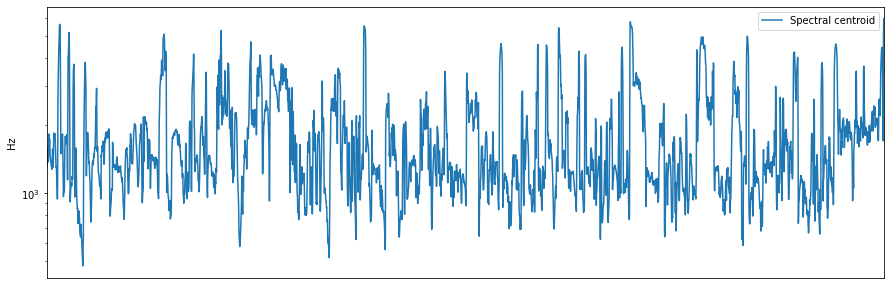

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(spec_centroid.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_centroid.shape[-1]])
plt.legend()

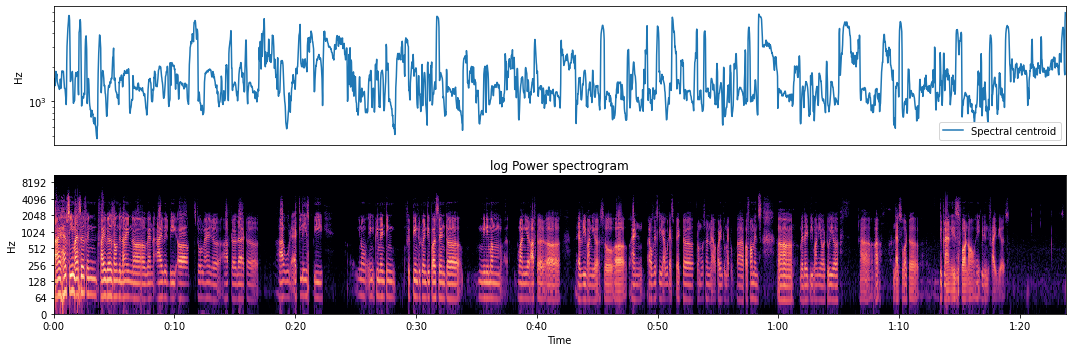

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.semilogy(spec_centroid.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_centroid.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

**h) Spectral Bandwidth  (Compute p’th-order spectral bandwidth)**

In [ ]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw, type(spec_bw), spec_bw.shape

(array([[1509.5281924 , 1428.45726858, 1546.8640669 , ..., 2948.49842081,
         6906.49913385, 7430.90784024]]), numpy.ndarray, (1, 3608))

In [ ]:
spec_bw_min = np.min(spec_bw)
spec_bw_max = np.max(spec_bw)
spec_bw_range = spec_bw_max - spec_bw_min
spec_bw_mean = np.mean(spec_bw)
spec_bw_median = np.median(spec_bw)
spec_bw_var = np.var(spec_bw)
spec_bw_std = np.std(spec_bw)
spec_bw_q25 = np.percentile(spec_bw, 25)
spec_bw_q50 = np.percentile(spec_bw, 50)
spec_bw_q75 = np.percentile(spec_bw, 75)
spec_bw_IQR = spec_bw_q75 - spec_bw_q25

spec_bw_list = [spec_bw_min, spec_bw_max, spec_bw_range, spec_bw_mean, spec_bw_median, spec_bw_var, spec_bw_std, spec_bw_q25, spec_bw_q50, spec_bw_q75, spec_bw_IQR]

#Generate the Spectral Bandwidth Dataframe
spec_bw_df = pd.DataFrame(data = [spec_bw_list], columns = ['spec_bw_min', 'spec_bw_max', 'spec_bw_range', 'spec_bw_mean', 'spec_bw_median', 'spec_bw_var', 'spec_bw_std', 'spec_bw_q25', 'spec_bw_q50', 'spec_bw_q75', 'spec_bw_IQR'])
spec_bw_df

spec_bw_min  spec_bw_max  ...  spec_bw_q75  spec_bw_IQR
0   723.002263   7430.90784  ...   2382.14683  1249.333189

[1 rows x 11 columns]

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


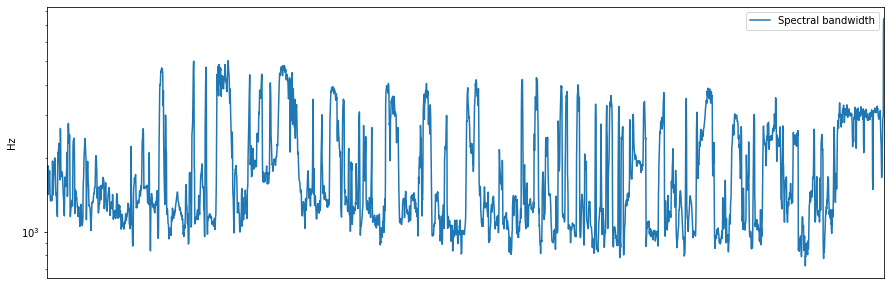

In [ ]:
%pylab
import matplotlib.pyplot as plt
plt.figure(figsize(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()

**i) Spectral Contrast (Computing spectral contrast)**

In [ ]:
S = np.abs(librosa.stft(y))
spec_contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
spec_contrast, type(spec_contrast), spec_contrast.shape

(array([[19.13675847,  7.31889573, 13.52336252, ..., 10.10971994,
         11.61978848, 18.5932506 ],
        [ 8.72994242, 15.89407033, 11.12731361, ..., 12.71556811,
         11.01922324, 16.76597133],
        [11.54682177,  7.76573533, 14.42150613, ...,  9.12788958,
         11.26217148, 19.73187807],
        ...,
        [20.3261287 , 16.64468547, 11.33364742, ..., 13.52649516,
         13.17933233, 18.35521746],
        [31.31333831, 27.15342198, 24.98989569, ..., 15.03248303,
         12.26238882, 16.70104046],
        [41.16574303, 34.76820613, 35.63754032, ..., 32.32685523,
          5.01202689,  4.44719651]]), numpy.ndarray, (7, 3608))

In [ ]:
spec_contrast_min = np.min(spec_contrast,axis=1)
spec_contrast_max = np.max(spec_contrast,axis=1)
spec_contrast_range = spec_contrast_max - spec_contrast_min
spec_contrast_mean = np.mean(spec_contrast,axis=1)
spec_contrast_median = np.median(spec_contrast,axis=1)
spec_contrast_var = np.var(spec_contrast,axis=1)
spec_contrast_std = np.std(spec_contrast,axis=1)


spec_contrast_q25 = []
spec_contrast_q50 = []
spec_contrast_q75 = []

for i in range(0, len(spec_contrast)):
  spec_contrast_q25.append(np.percentile(spec_contrast[i], 25))
  spec_contrast_q50.append(np.percentile(spec_contrast[i], 50))
  spec_contrast_q75.append(np.percentile(spec_contrast[i], 75))

spec_contrast_IQR = []
for i in range (0, len(spec_contrast)):
  spec_contrast_IQR.append(spec_contrast_q75[i] - spec_contrast_q25[i])


#Generate the Spctral Contrast Dataframe
spec_contrast_df = pd.DataFrame()
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_min_'+str(i)] = spec_contrast_min[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_max_'+str(i)] = spec_contrast_max[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_range_'+str(i)] = spec_contrast_range[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_mean_'+str(i)] = spec_contrast_mean[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_median_'+str(i)] = spec_contrast_median[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_var_'+str(i)] = spec_contrast_var[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_std_'+str(i)] = spec_contrast_std[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_q25_'+str(i)] = spec_contrast_q25[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_q50_'+str(i)] = spec_contrast_q50[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_q75_'+str(i)] = spec_contrast_q75[i]
for i in range(0,len(spec_contrast)):
    spec_contrast_df['spec_contrast_IQR_'+str(i)] = spec_contrast_IQR[i]


spec_contrast_df.loc[0]=np.concatenate((spec_contrast_min, spec_contrast_max, spec_contrast_range, spec_contrast_mean, spec_contrast_median, spec_contrast_var, spec_contrast_std, spec_contrast_q25, spec_contrast_q50, spec_contrast_q75, spec_contrast_IQR), axis=0)
spec_contrast_df

spec_contrast_min_0  ...  spec_contrast_IQR_6
0             1.894202  ...             8.650816

[1 rows x 77 columns]

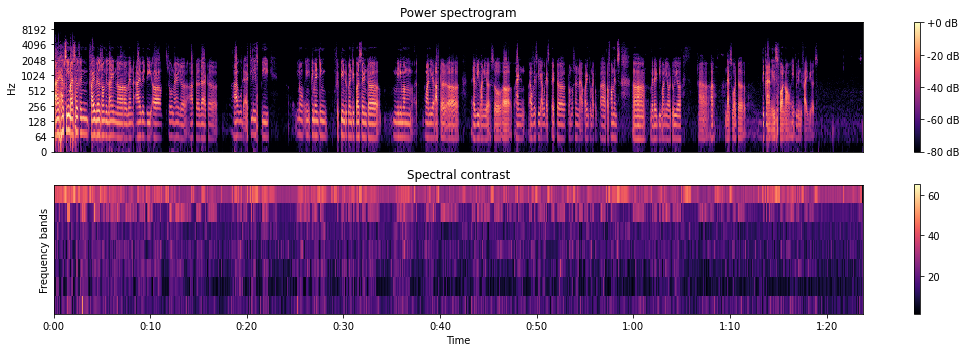

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(spec_contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

**j) Spectral Flatness (tonality)**

In [ ]:
#From time-series input
spec_flatness = librosa.feature.spectral_flatness(y=y)
spec_flatness, type(spec_flatness), spec_flatness.shape

(array([[1.50585656e-05, 1.44704245e-05, 2.84449397e-05, ...,
         9.20573599e-04, 1.44487880e-02, 1.33421356e-02]], dtype=float32),
 numpy.ndarray,
 (1, 3608))

In [ ]:
spec_flatness_min = np.min(spec_flatness)
spec_flatness_max = np.max(spec_flatness)
spec_flatness_range = spec_flatness_max - spec_flatness_min
spec_flatness_mean = np.mean(spec_flatness)
spec_flatness_median = np.median(spec_flatness)
spec_flatness_var = np.var(spec_flatness)
spec_flatness_std = np.std(spec_flatness)
spec_flatness_q25 = np.percentile(spec_flatness, 25)
spec_flatness_q50 = np.percentile(spec_flatness, 50)
spec_flatness_q75 = np.percentile(spec_flatness, 75)
spec_flatness_IQR = spec_flatness_q75 - spec_flatness_q25

spec_flatness_list = [spec_flatness_min, spec_flatness_max, spec_flatness_range, spec_flatness_mean, spec_flatness_median, spec_flatness_var, spec_flatness_std, spec_flatness_q25, spec_flatness_q50, spec_flatness_q75, spec_flatness_IQR]

#Generate the Spectral Flatness Dataframe
spec_flatness_df = pd.DataFrame(data = [spec_flatness_list], columns = ['spec_flatness_min', 'spec_flatness_max', 'spec_flatness_range', 'spec_flatness_mean', 'spec_flatness_median', 'spec_flatness_var', 'spec_flatness_std', 'spec_flatness_q25', 'spec_flatness_q50', 'spec_flatness_q75', 'spec_flatness_IQR'])
spec_flatness_df

spec_flatness_min  spec_flatness_max  ...  spec_flatness_q75  spec_flatness_IQR
0       1.653423e-07           0.028003  ...           0.000391           0.000388

[1 rows x 11 columns]

**k) Spectral Roll Off (Compute roll-off frequency)**

In [ ]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
spec_rolloff, type(spec_rolloff), spec_rolloff.shape

# Approximate minimum frequencies with roll_percent=0.1
# spec_rolloff = librosa.feature.spec_rolloff(y=y, sr=sr, roll_percent=0.1)
# spec_rolloff 

(array([[ 2777.78320312,  2885.44921875,  3229.98046875, ...,
          3488.37890625, 15030.17578125, 16838.96484375]]),
 numpy.ndarray,
 (1, 3608))

In [ ]:
spec_rolloff_min = np.min(spec_rolloff)
spec_rolloff_max = np.max(spec_rolloff)
spec_rolloff_range = spec_rolloff_max - spec_rolloff_min
spec_rolloff_mean = np.mean(spec_rolloff)
spec_rolloff_median = np.median(spec_rolloff)
spec_rolloff_var = np.var(spec_rolloff)
spec_rolloff_std = np.std(spec_rolloff)
spec_rolloff_q25 = np.percentile(spec_rolloff, 25)
spec_rolloff_q50 = np.percentile(spec_rolloff, 50)
spec_rolloff_q75 = np.percentile(spec_rolloff, 75)
spec_rolloff_IQR = spec_rolloff_q75 - spec_rolloff_q25

spec_rolloff_list = [spec_rolloff_min, spec_rolloff_max, spec_rolloff_range, spec_rolloff_mean, spec_rolloff_median, spec_rolloff_var, spec_rolloff_std, spec_rolloff_q25, spec_rolloff_q50, spec_rolloff_q75, spec_rolloff_IQR]

#Generate the Spectral Roll Off Dataframe
spec_rolloff_df = pd.DataFrame(data = [spec_rolloff_list], columns = ['spec_rolloff_min', 'spec_rolloff_max', 'spec_rolloff_range', 'spec_rolloff_mean', 'spec_rolloff_median', 'spec_rolloff_var', 'spec_rolloff_std', 'spec_rolloff_q25', 'spec_rolloff_q50', 'spec_rolloff_q75', 'spec_rolloff_IQR'])
spec_rolloff_df

spec_rolloff_min  spec_rolloff_max  ...  spec_rolloff_q75  spec_rolloff_IQR
0        366.064453      16838.964844  ...       3746.777344       1701.123047

[1 rows x 11 columns]

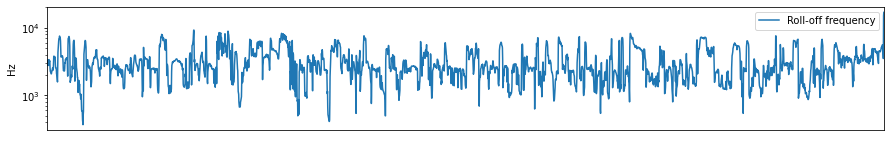

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.semilogy(spec_rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_rolloff.shape[-1]])
plt.legend()

**l) Poly Features  (Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram)**

In [ ]:
S = np.abs(librosa.stft(y))

***Fit a degree-0 polynomial (constant) to each frame***

In [ ]:
poly0 = librosa.feature.poly_features(S=S, order=0)
poly0, type(poly0), poly0.shape

(array([[0.19263018, 0.61054844, 1.13827103, ..., 0.00401875, 0.00719768,
         0.01156706]]), numpy.ndarray, (1, 3608))

In [ ]:
poly0_min = np.min(poly0)
poly0_max = np.max(poly0)
poly0_range = poly0_max - poly0_min
poly0_mean = np.mean(poly0)
poly0_median = np.median(poly0)
poly0_var = np.var(poly0)
poly0_std = np.std(poly0)
poly0_q25 = np.percentile(poly0, 25)
poly0_q50 = np.percentile(poly0, 50)
poly0_q75 = np.percentile(poly0, 75)
poly0_IQR = poly0_q75 - poly0_q25

poly0_list = [poly0_min, poly0_max, poly0_range, poly0_mean, poly0_median, poly0_var, poly0_std, poly0_q25, poly0_q50, poly0_q75, poly0_IQR]

#Generate the Degree-0 Polynomial Dataframe
poly0_df = pd.DataFrame(data = [poly0_list], columns = ['poly0_min', 'poly0_max', 'poly0_range', 'poly0_mean', 'poly0_median', 'poly0_var', 'poly0_std', 'poly0_q25', 'poly0_q50', 'poly0_q75', 'poly0_IQR'])
poly0_df

poly0_min  poly0_max  poly0_range  ...  poly0_q50  poly0_q75  poly0_IQR
0   0.000851   2.432684     2.431833  ...   0.105673   0.293945    0.28329

[1 rows x 11 columns]

***Fit a linear polynomial to each frame***



In [ ]:
poly1 = librosa.feature.poly_features(S=S, order=1)
poly1, type(poly1), poly1.shape

(array([[-9.21460218e-05, -2.92102810e-04, -5.37472356e-04, ...,
         -1.84429267e-06, -2.14645190e-06, -2.88297169e-06],
        [ 7.00585128e-01,  2.22076518e+00,  4.10108739e+00, ...,
          1.41854102e-02,  1.90299988e-02,  2.74594449e-02]]),
 numpy.ndarray,
 (2, 3608))

In [ ]:
poly1_min = np.min(poly1,axis=1)
poly1_max = np.max(poly1,axis=1)
poly1_range = poly1_max - poly1_min
poly1_mean = np.mean(poly1,axis=1)
poly1_median = np.median(poly1,axis=1)
poly1_var = np.var(poly1,axis=1)
poly1_std = np.std(poly1,axis=1)


poly1_q25 = []
poly1_q50 = []
poly1_q75 = []

for i in range(0, len(poly1)):
  poly1_q25.append(np.percentile(poly1[i], 25))
  poly1_q50.append(np.percentile(poly1[i], 50))
  poly1_q75.append(np.percentile(poly1[i], 75))

poly1_IQR = []
for i in range (0, len(poly1)):
  poly1_IQR.append(poly1_q75[i] - poly1_q25[i])


#Generate the Degree-1 Polynomial Dataframe
poly1_df = pd.DataFrame()
for i in range(0,len(poly1)):
    poly1_df['poly1_min_'+str(i)] = poly1_min[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_max_'+str(i)] = poly1_max[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_range_'+str(i)] = poly1_range[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_mean_'+str(i)] = poly1_mean[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_median'+str(i)] = poly1_median[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_var_'+str(i)] = poly1_var[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_std_'+str(i)] = poly1_std[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_q25_'+str(i)] = poly1_q25[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_q50_'+str(i)] = poly1_q50[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_q75_'+str(i)] = poly1_q75[i]
for i in range(0,len(poly1)):
    poly1_df['poly1_IQR_'+str(i)] = poly1_IQR[i]


poly1_df.loc[0]=np.concatenate((poly1_min, poly1_max, poly1_range, poly1_mean, poly1_median, poly1_var, poly1_std, poly1_q25, poly1_q50, poly1_q75, poly1_IQR), axis=0)
poly1_df

poly1_min_0  poly1_min_1  ...  poly1_IQR_0  poly1_IQR_1
0    -0.001125     0.002437  ...     0.000134     1.022103

[1 rows x 22 columns]

***Fit a quadratic to each frame***

In [ ]:
poly2 = librosa.feature.poly_features(S=S, order=2)
poly2, type(poly2), poly2.shape

(array([[ 3.27049277e-08,  1.03269224e-07,  1.85300596e-07, ...,
          6.69015096e-10,  9.55256076e-10,  1.41134311e-09],
        [-4.52717849e-04, -1.43064601e-03, -2.58041143e-03, ...,
         -9.22018410e-06, -1.26781501e-05, -1.84430295e-05],
        [ 1.36248884e+00,  4.31079527e+00,  7.85132201e+00, ...,
          2.77253751e-02,  3.83630959e-02,  5.60231297e-02]]),
 numpy.ndarray,
 (3, 3608))

In [ ]:
poly2_min = np.min(poly2,axis=1)
poly2_max = np.max(poly2,axis=1)
poly2_range = poly2_max - poly2_min
poly2_mean = np.mean(poly2,axis=1)
poly2_median = np.median(poly2,axis=1)
poly2_var = np.var(poly2,axis=1)
poly2_std = np.std(poly2,axis=1)


poly2_q25 = []
poly2_q50 = []
poly2_q75 = []

for i in range(0, len(poly2)):
  poly2_q25.append(np.percentile(poly2[i], 25))
  poly2_q50.append(np.percentile(poly2[i], 50))
  poly2_q75.append(np.percentile(poly2[i], 75))

poly2_IQR = []
for i in range (0, len(poly2)):
  poly2_IQR.append(poly2_q75[i] - poly2_q25[i])


#Generate the Degree-2 Polynomial Dataframe
poly2_df = pd.DataFrame()
for i in range(0,len(poly2)):
    poly2_df['poly2_min_'+str(i)] = poly2_min[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_max_'+str(i)] = poly2_max[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_range_'+str(i)] = poly2_range[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_mean_'+str(i)] = poly2_mean[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_median_'+str(i)] = poly2_median[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_var_'+str(i)] = poly2_var[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_std_'+str(i)] = poly2_std[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_q25_'+str(i)] = poly2_q25[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_q50_'+str(i)] = poly2_q50[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_q75_'+str(i)] = poly2_q75[i]
for i in range(0,len(poly2)):
    poly2_df['poly2_IQR_'+str(i)] = poly2_IQR[i]


poly2_df.loc[0]=np.concatenate((poly2_min, poly2_max, poly2_range, poly2_mean, poly2_median, poly2_var, poly2_std, poly2_q25, poly2_q50, poly2_q75, poly2_IQR), axis=0)
poly2_df

poly2_min_0  poly2_min_1  ...  poly2_IQR_1  poly2_IQR_2
0 -5.458023e-08    -0.005203  ...     0.000638     1.951373

[1 rows x 33 columns]

Plotting the results for comparison

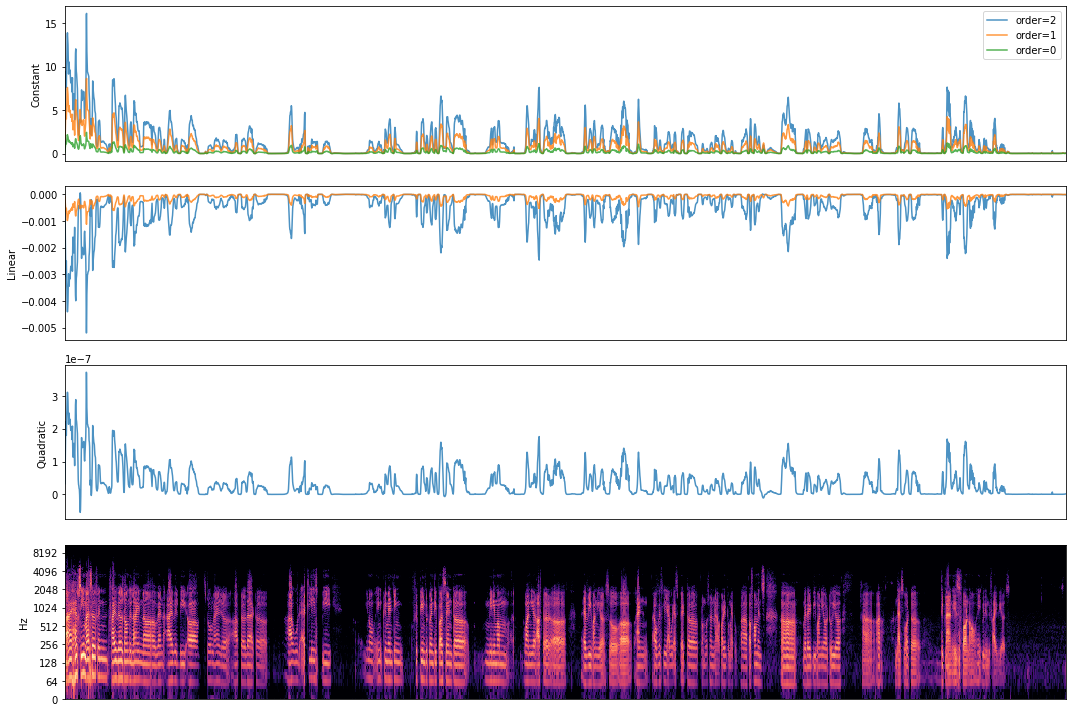

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
ax = plt.subplot(4,1,1)
plt.plot(poly2[2], label='order=2', alpha=0.8)
plt.plot(poly1[1], label='order=1', alpha=0.8)
plt.plot(poly0[0], label='order=0', alpha=0.8)
plt.xticks([])
plt.ylabel('Constant')
plt.legend()
plt.subplot(4,1,2, sharex=ax)
plt.plot(poly2[1], label='order=2', alpha=0.8)
plt.plot(poly1[0], label='order=1', alpha=0.8)
plt.xticks([])
plt.ylabel('Linear')
plt.subplot(4,1,3, sharex=ax)
plt.plot(poly2[0], label='order=2', alpha=0.8)
plt.xticks([])
plt.ylabel('Quadratic')
plt.subplot(4,1,4, sharex=ax)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log')
plt.tight_layout()
plt.show()

**m) Spectral Tonal Features  (Computes the tonal centroid features (tonnetz))**

In [ ]:
#Compute tonnetz centroid features from the harmonic component of an audio file

y = librosa.effects.harmonic(y)
spec_tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
spec_tonnetz, type(spec_tonnetz), spec_tonnetz.shape

(array([[-0.02935181,  0.00734938,  0.00738656, ...,  0.01060633,
          0.01086963, -0.00931102],
        [-0.15089097, -0.02275011, -0.00860446, ...,  0.02200181,
          0.02404114,  0.01425888],
        [ 0.04264893,  0.01336008, -0.0046054 , ..., -0.0756981 ,
         -0.04037457, -0.01964036],
        [-0.08977623, -0.01778559,  0.03093591, ..., -0.00625286,
         -0.05581587, -0.03948842],
        [-0.02268994, -0.00840137,  0.00987529, ...,  0.03777886,
          0.03172147,  0.0158177 ],
        [-0.10549798, -0.04040062, -0.02013827, ...,  0.03228937,
          0.03953362,  0.02499361]]), numpy.ndarray, (6, 3608))

In [ ]:
spec_tonnetz_min = np.min(spec_tonnetz,axis=1)
spec_tonnetz_max = np.max(spec_tonnetz,axis=1)
spec_tonnetz_range = spec_tonnetz_max - spec_tonnetz_min
spec_tonnetz_mean = np.mean(spec_tonnetz,axis=1)
spec_tonnetz_median = np.median(spec_tonnetz,axis=1)
spec_tonnetz_var = np.var(spec_tonnetz,axis=1)
spec_tonnetz_std = np.std(spec_tonnetz,axis=1)


spec_tonnetz_q25 = []
spec_tonnetz_q50 = []
spec_tonnetz_q75 = []

for i in range(0, len(spec_tonnetz)):
  spec_tonnetz_q25.append(np.percentile(spec_tonnetz[i], 25))
  spec_tonnetz_q50.append(np.percentile(spec_tonnetz[i], 50))
  spec_tonnetz_q75.append(np.percentile(spec_tonnetz[i], 75))

spec_tonnetz_IQR = []
for i in range (0, len(spec_tonnetz)):
  spec_tonnetz_IQR.append(spec_tonnetz_q75[i] - spec_tonnetz_q25[i])


#Generate the Spctral Tonal Dataframe
spec_tonnetz_df = pd.DataFrame()
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_min_'+str(i)] = spec_tonnetz_min[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_max_'+str(i)] = spec_tonnetz_max[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_range_'+str(i)] = spec_tonnetz_range[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_mean_'+str(i)] = spec_tonnetz_mean[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_median_'+str(i)] = spec_tonnetz_median[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_var_'+str(i)] = spec_tonnetz_var[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_std_'+str(i)] = spec_tonnetz_std[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_q25_'+str(i)] = spec_tonnetz_q25[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_q50_'+str(i)] = spec_tonnetz_q50[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_q75_'+str(i)] = spec_tonnetz_q75[i]
for i in range(0,len(spec_tonnetz)):
    spec_tonnetz_df['spec_tonnetz_IQR_'+str(i)] = spec_tonnetz_IQR[i]


spec_tonnetz_df.loc[0]=np.concatenate((spec_tonnetz_min, spec_tonnetz_max, spec_tonnetz_range, spec_tonnetz_mean, spec_tonnetz_median, spec_tonnetz_var, spec_tonnetz_std, spec_tonnetz_q25, spec_tonnetz_q50, spec_tonnetz_q75, spec_tonnetz_IQR), axis=0)
spec_tonnetz_df

spec_tonnetz_min_0  ...  spec_tonnetz_IQR_5
0           -0.164818  ...            0.041195

[1 rows x 66 columns]

Compare the tonnetz features to chroma_cqt

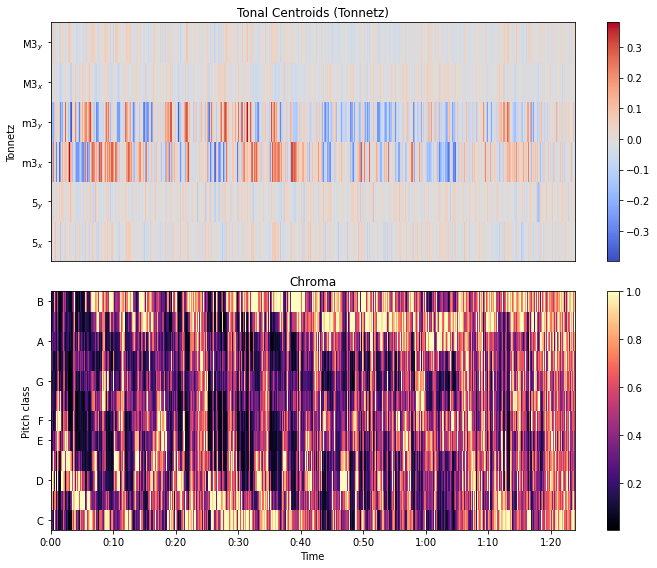

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(spec_tonnetz, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids (Tonnetz)')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr), y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()

**n) Zero Crossing Rate  (Compute the zero-crossing rate of an audio time series)**

In [ ]:
zcr = librosa.feature.zero_crossing_rate(y)
zcr, type(zcr), zcr.shape

(array([[0.01318359, 0.02294922, 0.03222656, ..., 0.02636719, 0.01904297,
         0.01171875]]), numpy.ndarray, (1, 3608))

In [ ]:
zcr_min = np.min(zcr)
zcr_max = np.max(zcr)
zcr_range = zcr_max - zcr_min
zcr_mean = np.mean(zcr)
zcr_median = np.median(zcr)
zcr_var = np.var(zcr)
zcr_std = np.std(zcr)
zcr_q25 = np.percentile(zcr, 25)
zcr_q50 = np.percentile(zcr, 50)
zcr_q75 = np.percentile(zcr, 75)
zcr_IQR = zcr_q75 - zcr_q25

zcr_list = [zcr_min, zcr_max, zcr_range, zcr_mean, zcr_median, zcr_var, zcr_std, zcr_q25, zcr_q50, zcr_q75, zcr_IQR]

#Generate the Zero Crossing Rate Dataframe
zcr_df = pd.DataFrame(data = [zcr_list], columns = ['zcr_min', 'zcr_max', 'zcr_range', 'zcr_mean', 'zcr_median', 'zcr_var', 'zcr_std', 'zcr_q25', 'zcr_q50', 'zcr_q75', 'zcr_IQR'])
zcr_df

zcr_min   zcr_max  zcr_range  ...   zcr_q50   zcr_q75   zcr_IQR
0  0.009277  0.219727   0.210449  ...  0.028809  0.040161  0.020142

[1 rows x 11 columns]

**2) Rhythm Features**

**a) Tempogram (Compute the tempogram: local autocorrelation of the onset strength envelope)**

***Compute local onset autocorrelation***

In [ ]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
tempogram, type(tempogram), tempogram.shape

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 7.88581820e-01,  7.89745939e-01,  7.90904603e-01, ...,
          8.97909807e-01,  8.98141702e-01,  8.98376278e-01],
        [ 6.44277542e-01,  6.46219725e-01,  6.48152832e-01, ...,
          8.82107099e-01,  8.82249104e-01,  8.82392618e-01],
        ...,
        [-5.44982800e-17,  1.82015280e-17, -6.98016235e-17, ...,
          3.87912175e-12,  2.01918065e-12,  1.93944578e-12],
        [ 4.13130670e-17,  5.19100343e-17, -4.69256763e-17, ...,
          5.98066560e-13,  1.16139971e-13,  1.67172361e-13],
        [-9.29953582e-17,  8.82134022e-17, -3.17063992e-17, ...,
         -2.49288880e-17,  1.09047374e-16, -2.64036692e-17]]),
 numpy.ndarray,
 (384, 3608))

In [ ]:
tempogram_min = np.min(tempogram,axis=1)
tempogram_max = np.max(tempogram,axis=1)
tempogram_range = tempogram_max - tempogram_min
tempogram_mean = np.mean(tempogram,axis=1)
tempogram_median = np.median(tempogram,axis=1)
tempogram_var = np.var(tempogram,axis=1)
tempogram_std = np.std(tempogram,axis=1)


tempogram_q25 = []
tempogram_q50 = []
tempogram_q75 = []

for i in range(0, len(tempogram)):
  tempogram_q25.append(np.percentile(tempogram[i], 25))
  tempogram_q50.append(np.percentile(tempogram[i], 50))
  tempogram_q75.append(np.percentile(tempogram[i], 75))

tempogram_IQR = []
for i in range (0, len(tempogram)):
  tempogram_IQR.append(tempogram_q75[i] - tempogram_q25[i])


#Generate the Tempogram Dataframe
tempogram_df = pd.DataFrame()
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_min_'+str(i)] = tempogram_min[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_max_'+str(i)] = tempogram_max[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_range_'+str(i)] = tempogram_range[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_mean_'+str(i)] = tempogram_mean[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_median_'+str(i)] = tempogram_median[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_var_'+str(i)] = tempogram_var[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_std_'+str(i)] = tempogram_std[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_q25_'+str(i)] = tempogram_q25[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_q50_'+str(i)] = tempogram_q50[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_q75_'+str(i)] = tempogram_q75[i]
for i in range(0,len(tempogram)):
    tempogram_df['tempogram_IQR_'+str(i)] = tempogram_IQR[i]


tempogram_df.loc[0]=np.concatenate((tempogram_min, tempogram_max, tempogram_range, tempogram_mean, tempogram_median, tempogram_var, tempogram_std, tempogram_q25, tempogram_q50, tempogram_q75, tempogram_IQR), axis=0)
tempogram_df

tempogram_min_0  tempogram_min_1  ...  tempogram_IQR_382  tempogram_IQR_383
0              1.0         0.588526  ...       1.251616e-11       1.168537e-16

[1 rows x 4224 columns]

***Compute global onset autocorrelation***

In [ ]:
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
ac_global, type(ac_global), ac_global.shape

(array([1.        , 0.74298711, 0.5724716 , 0.52325433, 0.50233942,
        0.49922906, 0.49694622, 0.48800671, 0.49031876, 0.48761296,
        0.49322394, 0.50567408, 0.50302756, 0.49634601, 0.49344052,
        0.48065439, 0.46170025, 0.44920304, 0.44875328, 0.46332391,
        0.46546402, 0.46417083, 0.46099249, 0.46272413, 0.46420699,
        0.47652001, 0.4671069 , 0.45452461, 0.45640255, 0.46133691,
        0.4714098 , 0.46185893, 0.45521097, 0.44759138, 0.44766098,
        0.46013913, 0.46262228, 0.46186194, 0.45468477, 0.44512117,
        0.44255115, 0.44687467, 0.44533457, 0.4452049 , 0.45030126,
        0.45766527, 0.46122474, 0.4552534 , 0.45553599, 0.45065771,
        0.44649562, 0.45083198, 0.45923783, 0.46663772, 0.44824832,
        0.44503617, 0.44599546, 0.44202827, 0.43531802, 0.4391383 ,
        0.43521532, 0.43614091, 0.43921132, 0.43488406, 0.43616361,
        0.44453818, 0.42960668, 0.42613682, 0.42343735, 0.4199904 ,
        0.425667  , 0.43692677, 0.43087717, 0.42

In [ ]:
ac_global_min = np.min(ac_global)
ac_global_max = np.max(ac_global)
ac_global_range = ac_global_max - ac_global_min
ac_global_mean = np.mean(ac_global)
ac_global_median = np.median(ac_global)
ac_global_var = np.var(ac_global)
ac_global_std = np.std(ac_global)
ac_global_q25 = np.percentile(ac_global, 25)
ac_global_q50 = np.percentile(ac_global, 50)
ac_global_q75 = np.percentile(ac_global, 75)
ac_global_IQR = ac_global_q75 - ac_global_q25

ac_global_list = [ac_global_min, ac_global_max, ac_global_range, ac_global_mean, ac_global_median, ac_global_var, ac_global_std, ac_global_q25, ac_global_q50, ac_global_q75, ac_global_IQR]

#Generate the Auto Correlation Global Dataframe
ac_global_df = pd.DataFrame(data = [ac_global_list], columns = ['ac_global_min', 'ac_global_max', 'ac_global_range', 'ac_global_mean', 'ac_global_median', 'ac_global_var', 'ac_global_std', 'ac_global_q25', 'ac_global_q50', 'ac_global_q75', 'ac_global_IQR'])
ac_global_df

ac_global_min  ac_global_max  ...  ac_global_q75  ac_global_IQR
0       0.356881            1.0  ...        0.42851       0.032313

[1 rows x 11 columns]

***Estimate the global tempo for display purposes***

In [ ]:
global_tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
global_tempo_df = pd.DataFrame(data = [global_tempo], columns = ['global_tempo'])
global_tempo_df

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


global_tempo
0    112.347147

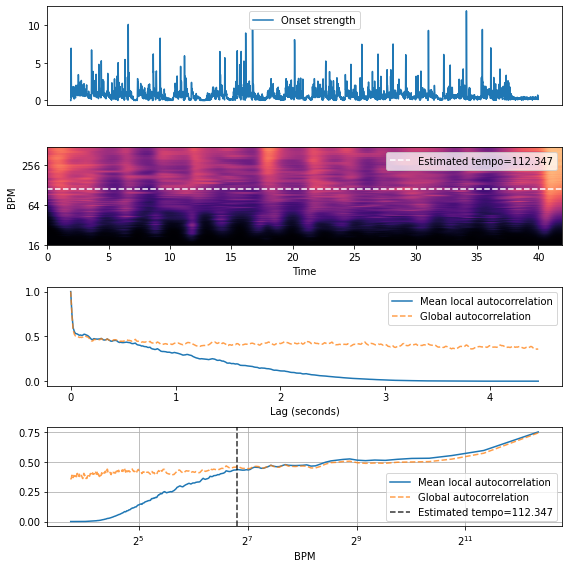

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(4, 1, 2)

# We'll truncate the display to a narrower range of temp0
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')
plt.axhline(global_tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(global_tempo))
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(4, 1, 3)

x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
plt.xlabel('Lag (seconds)')
plt.axis('tight')
plt.legend(frameon=True)
plt.subplot(4,1,4)

# We can also plot on a BPM axis
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
plt.semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', basex=2)
plt.semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)
plt.axvline(global_tempo, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(global_tempo))
plt.legend(frameon=True)
plt.xlabel('BPM')
plt.axis('tight')
plt.grid()
plt.tight_layout()
plt.show()

**b) Fourier Tempogram (Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope)**

***Fourier Tempogram (Librosa library has some error regarding this feature)***

In [ ]:
# Compute local onset autocorrelation
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
fourier_tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

#Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length, norm=None)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(3, 1, 2)
librosa.display.specshow(np.abs(fourier_tempogram), sr=sr, hop_length=hop_length, x_axis='time', y_axis='fourier_tempo', cmap='magma')
plt.title('Fourier tempogram')
plt.subplot(3, 1, 3)
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo', cmap='magma')
plt.title('Autocorrelation tempogram')
plt.tight_layout()
plt.show()

AttributeError: ignored

**3) Feature inversion not supported in Librosa as of now**

**4)Onset Detection**

**a) Onset Detection**

In [ ]:
#1st way
#onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
#magnitude = librosa.frames_to_time(onset_frames, sr=sr)
#magnitude, type(magnitude), magnitude.shape


# 2nd way
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
magnitude = librosa.frames_to_time(onset_frames, sr=sr)
magnitude, type(magnitude), magnitude.shape

(array([3.48299320e-02, 6.84988662e-01, 9.52018141e-01, 1.09133787e+00,
        1.18421769e+00, 1.41641723e+00, 1.86920635e+00, 1.96208617e+00,
        1.99691610e+00, 2.10140590e+00, 2.26394558e+00, 2.50775510e+00,
        2.73995465e+00, 2.89088435e+00, 2.93732426e+00, 3.30884354e+00,
        3.68036281e+00, 3.91256236e+00, 4.14476190e+00, 4.24925170e+00,
        4.30730159e+00, 4.62077098e+00, 4.72526077e+00, 4.85297052e+00,
        5.08517007e+00, 5.15482993e+00, 5.20126984e+00, 5.99074830e+00,
        6.26938776e+00, 6.36226757e+00, 6.61768707e+00, 6.91954649e+00,
        6.97759637e+00, 7.05886621e+00, 7.39555556e+00, 7.65097506e+00,
        8.01088435e+00, 8.38240363e+00, 9.35764172e+00, 9.52018141e+00,
        9.83365079e+00, 9.91492063e+00, 1.01935601e+01, 1.02400000e+01,
        1.03444898e+01, 1.08088889e+01, 1.30496145e+01, 1.33630839e+01,
        1.34095238e+01, 1.35604535e+01, 1.37926531e+01, 1.46169615e+01,
        1.47795011e+01, 1.49072109e+01, 1.51394104e+01, 1.526712

In [ ]:
magnitude_min = np.min(magnitude)
magnitude_max = np.max(magnitude)
magnitude_range = magnitude_max - magnitude_min
magnitude_mean = np.mean(magnitude)
magnitude_median = np.median(magnitude)
magnitude_var = np.var(magnitude)
magnitude_std = np.std(magnitude)
magnitude_q25 = np.percentile(magnitude, 25)
magnitude_q50 = np.percentile(magnitude, 50)
magnitude_q75 = np.percentile(magnitude, 75)
magnitude_IQR = magnitude_q75 - magnitude_q25

magnitude_list = [magnitude_min, magnitude_max, magnitude_range, magnitude_mean, magnitude_median, magnitude_var, magnitude_std, magnitude_q25, magnitude_q50, magnitude_q75, magnitude_IQR]

#Generate the Spectral Flatness Dataframe
magnitude_df = pd.DataFrame(data = [magnitude_list], columns = ['magnitude_min', 'magnitude_max', 'magnitude_range', 'magnitude_mean', 'magnitude_median', 'magnitude_var', 'magnitude_std', 'magnitude_q25', 'magnitude_q50', 'magnitude_q75', 'magnitude_IQR'])
magnitude_df

magnitude_min  magnitude_max  ...  magnitude_q75  magnitude_IQR
0        0.03483      39.346213  ...      31.016054      21.339138

[1 rows x 11 columns]

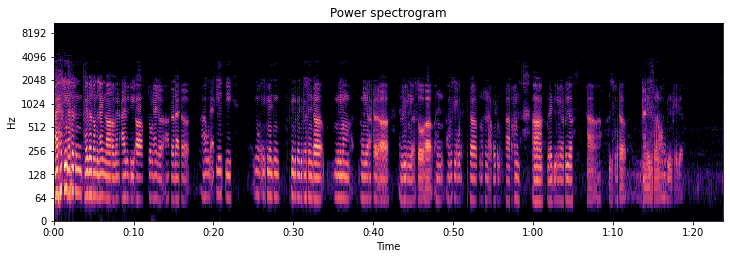

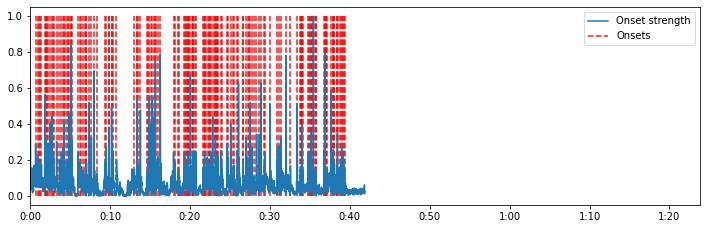

In [ ]:
import matplotlib.pyplot as plt
D = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

**b) Onset Backtrack**

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)

# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
onset_raw, type(onset_raw), onset_raw.shape

(array([   3,   49,   59,   68,   74,   82,   94,  161,  169,  172,  181,
         195,  216,  236,  249,  253,  285,  317,  337,  346,  357,  366,
         381,  398,  407,  418,  438,  444,  516,  540,  596,  601,  608,
         637,  639,  659,  661,  690,  722,  820,  848,  854,  878,  882,
         891,  932, 1118, 1124, 1151, 1155, 1168, 1188, 1259, 1273, 1284,
        1304, 1315, 1336, 1350, 1358, 1363, 1378, 1383, 1403, 1546, 1562,
        1594, 1601, 1662, 1670, 1683, 1692, 1699, 1702, 1727, 1746, 1754,
        1758, 1761, 1774, 1791, 1865, 1872, 1880, 1907, 1923, 1932, 1944,
        1947, 1966, 1968, 1991, 1997, 2004, 2010, 2015, 2027, 2035, 2053,
        2064, 2119, 2124, 2131, 2161, 2191, 2198, 2233, 2246, 2295, 2298,
        2327, 2345, 2370, 2377, 2383, 2391, 2393, 2440, 2468, 2470, 2487,
        2525, 2532, 2584, 2664, 2679, 2701, 2760, 2806, 2878, 2913, 2919,
        2922, 2928, 2933, 2997, 3005, 3014, 3028, 3040, 3053, 3073, 3076,
        3079, 3168, 3176, 3189, 3192, 

In [ ]:
onset_raw_min = np.min(onset_raw)
onset_raw_max = np.max(onset_raw)
onset_raw_range = onset_raw_max - onset_raw_min
onset_raw_mean = np.mean(onset_raw)
onset_raw_median = np.median(onset_raw)
onset_raw_var = np.var(onset_raw)
onset_raw_std = np.std(onset_raw)
onset_raw_q25 = np.percentile(onset_raw, 25)
onset_raw_q50 = np.percentile(onset_raw, 50)
onset_raw_q75 = np.percentile(onset_raw, 75)
onset_raw_IQR = onset_raw_q75 - onset_raw_q25

onset_raw_list = [onset_raw_min, onset_raw_max, onset_raw_range, onset_raw_mean, onset_raw_median, onset_raw_var, onset_raw_std, onset_raw_q25, onset_raw_q50, onset_raw_q75, onset_raw_IQR]

#Generate the Spectral Flatness Dataframe
onset_raw_df = pd.DataFrame(data = [onset_raw_list], columns = ['onset_raw_min', 'onset_raw_max', 'onset_raw_range', 'onset_raw_mean', 'onset_raw_median', 'onset_raw_var', 'onset_raw_std', 'onset_raw_q25', 'onset_raw_q50', 'onset_raw_q75', 'onset_raw_IQR'])
onset_raw_df

onset_raw_min  onset_raw_max  ...  onset_raw_q75  onset_raw_IQR
0              3           3389  ...         2545.0         1692.5

[1 rows x 11 columns]

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
onset_bt, type(onset_bt), onset_bt.shape

(array([   2,   48,   56,   66,   72,   80,   93,  159,  166,  171,  178,
         190,  214,  233,  246,  252,  284,  316,  334,  345,  355,  364,
         380,  395,  403,  416,  437,  442,  513,  537,  595,  599,  605,
         634,  638,  655,  655,  688,  721,  818,  845,  852,  876,  880,
         888,  928, 1116, 1121, 1149, 1153, 1166, 1187, 1258, 1268, 1282,
        1303, 1312, 1333, 1345, 1356, 1360, 1377, 1380, 1400, 1544, 1558,
        1592, 1600, 1661, 1667, 1681, 1690, 1697, 1701, 1726, 1744, 1753,
        1756, 1760, 1773, 1789, 1861, 1870, 1877, 1905, 1921, 1930, 1943,
        1946, 1965, 1965, 1990, 1996, 1999, 2008, 2014, 2026, 2033, 2051,
        2062, 2116, 2123, 2127, 2158, 2186, 2196, 2229, 2244, 2294, 2296,
        2324, 2343, 2369, 2374, 2380, 2389, 2392, 2437, 2465, 2469, 2485,
        2523, 2528, 2583, 2660, 2676, 2699, 2756, 2803, 2876, 2912, 2918,
        2920, 2926, 2930, 2995, 3003, 3010, 3026, 3037, 3051, 3072, 3074,
        3077, 3165, 3173, 3187, 3190, 

In [ ]:
onset_bt_min = np.min(onset_bt)
onset_bt_max = np.max(onset_bt)
onset_bt_range = onset_bt_max - onset_bt_min
onset_bt_mean = np.mean(onset_bt)
onset_bt_median = np.median(onset_bt)
onset_bt_var = np.var(onset_bt)
onset_bt_std = np.std(onset_bt)
onset_bt_q25 = np.percentile(onset_bt, 25)
onset_bt_q50 = np.percentile(onset_bt, 50)
onset_bt_q75 = np.percentile(onset_bt, 75)
onset_bt_IQR = onset_bt_q75 - onset_bt_q25

onset_bt_list = [onset_bt_min, onset_bt_max, onset_bt_range, onset_bt_mean, onset_bt_median, onset_bt_var, onset_bt_std, onset_bt_q25, onset_bt_q50, onset_bt_q75, onset_bt_IQR]

#Generate the Spectral Flatness Dataframe
onset_bt_df = pd.DataFrame(data = [onset_bt_list], columns = ['onset_bt_min', 'onset_bt_max', 'onset_bt_range', 'onset_bt_mean', 'onset_bt_median', 'onset_bt_var', 'onset_bt_std', 'onset_bt_q25', 'onset_bt_q50', 'onset_bt_q75', 'onset_bt_IQR'])
onset_bt_df

onset_bt_min  onset_bt_max  ...  onset_bt_q75  onset_bt_IQR
0             2          3385  ...       2541.75        1691.5

[1 rows x 11 columns]

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)

# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])
onset_bt_rms, type(onset_bt_rms), onset_bt_rms.shape

(array([   0,   40,   56,   56,   70,   79,   91,  158,  169,  169,  169,
         190,  213,  233,  246,  250,  282,  314,  332,  341,  351,  363,
         378,  394,  394,  415,  438,  441,  511,  538,  595,  601,  607,
         632,  632,  655,  655,  686,  719,  813,  846,  854,  874,  879,
         887,  923, 1117, 1120, 1151, 1151, 1166, 1185, 1256, 1267, 1281,
        1302, 1312, 1333, 1346, 1346, 1359, 1370, 1370, 1400, 1543, 1560,
        1586, 1598, 1654, 1654, 1681, 1689, 1699, 1702, 1722, 1743, 1751,
        1758, 1760, 1771, 1788, 1860, 1868, 1868, 1903, 1921, 1921, 1944,
        1944, 1963, 1963, 1991, 1994, 1998, 2006, 2012, 2024, 2032, 2050,
        2060, 2115, 2121, 2127, 2158, 2185, 2194, 2227, 2242, 2295, 2295,
        2324, 2344, 2365, 2373, 2373, 2388, 2388, 2435, 2465, 2465, 2483,
        2521, 2528, 2576, 2664, 2676, 2698, 2756, 2802, 2872, 2913, 2919,
        2919, 2924, 2933, 2993, 2993, 3011, 3025, 3035, 3047, 3073, 3076,
        3076, 3166, 3172, 3189, 3189, 

In [ ]:
onset_bt_rms_min = np.min(onset_bt_rms)
onset_bt_rms_max = np.max(onset_bt_rms)
onset_bt_rms_range = onset_bt_rms_max - onset_bt_rms_min
onset_bt_rms_mean = np.mean(onset_bt_rms)
onset_bt_rms_median = np.median(onset_bt_rms)
onset_bt_rms_var = np.var(onset_bt_rms)
onset_bt_rms_std = np.std(onset_bt_rms)
onset_bt_rms_q25 = np.percentile(onset_bt_rms, 25)
onset_bt_rms_q50 = np.percentile(onset_bt_rms, 50)
onset_bt_rms_q75 = np.percentile(onset_bt_rms, 75)
onset_bt_rms_IQR = onset_bt_rms_q75 - onset_bt_rms_q25

onset_bt_rms_list = [onset_bt_rms_min, onset_bt_rms_max, onset_bt_rms_range, onset_bt_rms_mean, onset_bt_rms_median, onset_bt_rms_var, onset_bt_rms_std, onset_bt_rms_q25, onset_bt_rms_q50, onset_bt_rms_q75, onset_bt_rms_IQR]

#Generate the Spectral Flatness Dataframe
onset_bt_rms_df = pd.DataFrame(data = [onset_bt_rms_list], columns = ['onset_bt_rms_min', 'onset_bt_rms_max', 'onset_bt_rms_range', 'onset_bt_rms_mean', 'onset_bt_rms_median', 'onset_bt_rms_var', 'onset_bt_rms_std', 'onset_bt_rms_q25', 'onset_bt_rms_q50', 'onset_bt_rms_q75', 'onset_bt_rms_IQR'])
onset_bt_rms_df

onset_bt_rms_min  onset_bt_rms_max  ...  onset_bt_rms_q75  onset_bt_rms_IQR
0                 0              3386  ...            2540.0            1688.0

[1 rows x 11 columns]

**c) Onset Strength**

Text(0.5, 1.0, 'Power spectrogram')

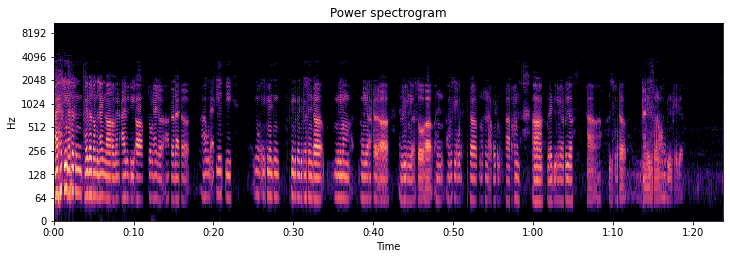

In [ ]:
#First, load some audio and plot the spectrogram

import matplotlib.pyplot as plt
D = np.abs(librosa.stft(y))
times = librosa.times_like(D)
plt.figure(figsize=(12,8))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')

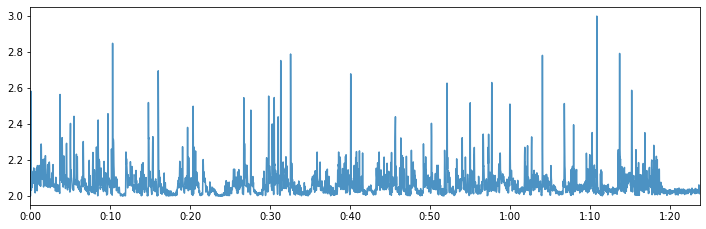

In [ ]:
# Construct a standard onset function

onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

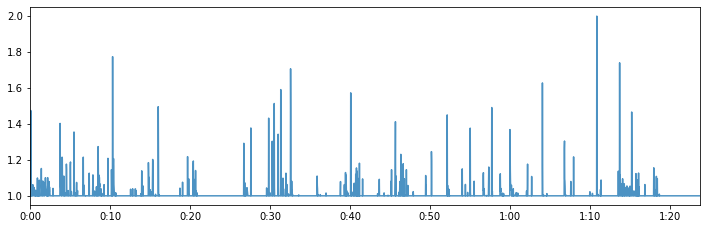

In [ ]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=8000, n_mels=256)
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

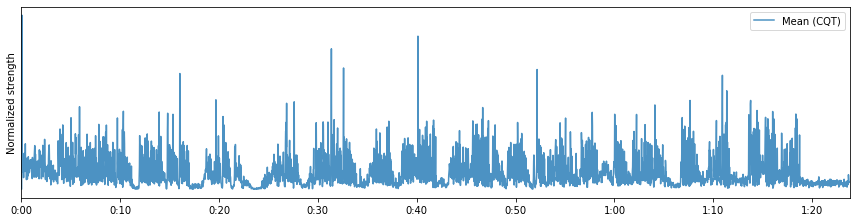

In [ ]:
#Constant-Q spectrogram instead of Mel

C = np.abs(librosa.cqt(y=y, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()
plt.show()

**d) Onsite Strength Multi (Compute a spectral flux onset strength envelope across multiple channels)**   <br>

Note-our audio is mono channel not stereo

In [ ]:
# No need

**5) Beat and Tempo** 

**a) Beat Tracker**  <br>

Dynamic programming beat tracker

In [ ]:
#onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
#tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo_df = pd.DataFrame(data = [tempo], columns = ['tempo'])
tempo_df

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


tempo
0  172.265625

In [ ]:
beats, type(beats), beats.shape

(array([   4,   38,   68,   99,  130,  161,  195,  223,  254,  286,  318,
         350,  382,  413,  444,  476,  508,  541,  571,  601,  631,  661,
         690,  722,  755,  788,  821,  848,  878,  910,  942,  972, 1003,
        1034, 1065, 1096, 1126, 1156, 1189, 1221, 1253, 1285, 1315, 1350,
        1378, 1403, 1431, 1460, 1489, 1518, 1547, 1578, 1609, 1640, 1671,
        1699, 1728, 1761, 1791, 1821, 1851, 1881, 1910, 1939, 1968, 1997,
        2028, 2064, 2097, 2131, 2162, 2191, 2219, 2247, 2278, 2309, 2340,
        2371, 2400, 2429, 2458, 2487, 2520, 2552, 2585, 2615, 2644, 2673,
        2702, 2731, 2760, 2789, 2819, 2849, 2879, 2908, 2937, 2966, 2995,
        3024, 3053, 3083, 3114, 3145, 3176, 3208, 3241]),
 numpy.ndarray,
 (107,))

In [ ]:
beats_min = np.min(beats)
beats_max = np.max(beats)
beats_range = beats_max - beats_min
beats_mean = np.mean(beats)
beats_median = np.median(beats)
beats_var = np.var(beats)
beats_std = np.std(beats)
beats_q25 = np.percentile(beats, 25)
beats_q50 = np.percentile(beats, 50)
beats_q75 = np.percentile(beats, 75)
beats_IQR = beats_q75 - beats_q25

beats_list = [beats_min, beats_max, beats_range, beats_mean, beats_median, beats_var, beats_std, beats_q25, beats_q50, beats_q75, beats_IQR]

#Generate the Spectral Flatness Dataframe
beats_df = pd.DataFrame(data = [beats_list], columns = ['beats_min', 'beats_max', 'beats_range', 'beats_mean', 'beats_median', 'beats_var', 'beats_std', 'beats_q25', 'beats_q50', 'beats_q75', 'beats_IQR'])
beats_df

beats_min  beats_max  beats_range  ...  beats_q50  beats_q75  beats_IQR
0          4       3241         3237  ...     1640.0     2443.5     1609.0

[1 rows x 11 columns]

In [ ]:
# Or print the beats as timestamps

librosa.frames_to_time(beats, sr=sr)

array([ 0.04643991,  0.44117914,  0.78947846,  1.14938776,  1.50929705,
        1.86920635,  2.26394558,  2.58902494,  2.94893424,  3.32045351,
        3.69197279,  4.06349206,  4.43501134,  4.79492063,  5.15482993,
        5.52634921,  5.89786848,  6.28099773,  6.62929705,  6.97759637,
        7.32589569,  7.67419501,  8.01088435,  8.38240363,  8.76553288,
        9.14866213,  9.53179138,  9.84526077, 10.19356009, 10.56507937,
       10.93659864, 11.28489796, 11.64480726, 12.00471655, 12.36462585,
       12.72453515, 13.07283447, 13.42113379, 13.80426304, 14.17578231,
       14.54730159, 14.91882086, 15.26712018, 15.67346939, 15.99854875,
       16.28879819, 16.61387755, 16.95056689, 17.28725624, 17.62394558,
       17.96063492, 18.32054422, 18.68045351, 19.04036281, 19.40027211,
       19.72535147, 20.06204082, 20.44517007, 20.79346939, 21.14176871,
       21.49006803, 21.83836735, 22.17505669, 22.51174603, 22.84843537,
       23.18512472, 23.54503401, 23.9629932 , 24.34612245, 24.74

In [ ]:
#Track beats using a pre-computed onset envelope

onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
tempo

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


172.265625

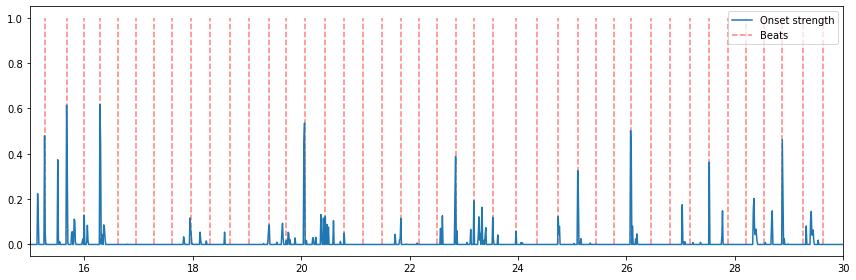

In [ ]:
import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(12, 4))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)

#Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

**b) Beat PLP (Predominant local pulse (PLP) estimation) --Not working as of now** <br>

The PLP method analyzes the onset strength envelope in the frequency domain to find a locally stable tempo for each frame. These local periodicities are used to synthesize local half-waves, which are combined such that peaks coincide with rhythmically salient frames (e.g. onset events on a musical time grid). The local maxima of the pulse curve can be taken as estimated beat positions.

This method may be preferred over the dynamic programming method of beat_track when either the tempo is expected to vary significantly over time. Additionally, since plp does not require the entire signal to make predictions, it may be preferable when beat-tracking long recordings in a streaming setting.

In [ ]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

# Or compute pulse with an alternate prior, like log-normal
import scipy.stats
prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr, prior=prior)
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

import matplotlib.pyplot as plt
ax = plt.subplot(3,1,1)
librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max), x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.subplot(3,1,2, sharex=ax)

plt.plot(librosa.times_like(onset_env),librosa.util.normalize(onset_env), label='Onset strength')
plt.plot(librosa.times_like(pulse), librosa.util.normalize(pulse), label='Predominant local pulse (PLP)')
plt.title('Uniform tempo prior [30, 300]')
plt.subplot(3,1,3, sharex=ax)
plt.plot(librosa.times_like(onset_env), librosa.util.normalize(onset_env), label='Onset strength')
plt.plot(librosa.times_like(pulse_lognorm), librosa.util.normalize(pulse_lognorm), label='Predominant local pulse (PLP)')
plt.title('Log-normal tempo prior, mean=120')
plt.legend()
plt.xlim([30, 35])
plt.tight_layout()
plt.show()

AttributeError: ignored

**c) Beat Tempo**  <br>

 Estimate the tempo (beats per minute)

In [ ]:
# Estimate a static tempo

onset_env = librosa.onset.onset_strength(y, sr=sr)
bpm_tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

bpm_tempo_df = pd.DataFrame(data = [bpm_tempo], columns = ['bpm_tempo'])
bpm_tempo_df

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


bpm_tempo
0  112.347147

In [ ]:
# Or a static tempo with a uniform prior instead

import scipy.stats
prior = scipy.stats.uniform(30, 300)  # uniform over 30-300 BPM
bpm_utempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, prior=prior)

bpm_utempo_df = pd.DataFrame(data = [bpm_utempo], columns = ['bpm_utempo'])
bpm_utempo_df

TypeError: ignored

In [ ]:
# Or a dynamic tempo
bpm_dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,  aggregate=None)
bpm_dtempo, type(bpm_dtempo), bpm_dtempo.shape

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


(array([129.19921875, 129.19921875, 129.19921875, ..., 139.67483108,
        139.67483108, 139.67483108]), numpy.ndarray, (3608,))

In [ ]:
bpm_dtempo_min = np.min(bpm_dtempo)
bpm_dtempo_max = np.max(bpm_dtempo)
bpm_dtempo_range = bpm_dtempo_max - bpm_dtempo_min
bpm_dtempo_mean = np.mean(bpm_dtempo)
bpm_dtempo_median = np.median(bpm_dtempo)
bpm_dtempo_var = np.var(bpm_dtempo)
bpm_dtempo_std = np.std(bpm_dtempo)
bpm_dtempo_q25 = np.percentile(bpm_dtempo, 25)
bpm_dtempo_q50 = np.percentile(bpm_dtempo, 50)
bpm_dtempo_q75 = np.percentile(bpm_dtempo, 75)
bpm_dtempo_IQR = bpm_dtempo_q75 - bpm_dtempo_q25

bpm_dtempo_list = [bpm_dtempo_min, bpm_dtempo_max, bpm_dtempo_range, bpm_dtempo_mean, bpm_dtempo_median, bpm_dtempo_var, bpm_dtempo_std, bpm_dtempo_q25, bpm_dtempo_q50, bpm_dtempo_q75, bpm_dtempo_IQR]

#Generate the Spectral Flatness Dataframe
bpm_dtempo_df = pd.DataFrame(data = [bpm_dtempo_list], columns = ['bpm_dtempo_min', 'bpm_dtempo_max', 'bpm_dtempo_range', 'bpm_dtempo_mean', 'bpm_dtempo_median', 'bpm_dtempo_var', 'bpm_dtempo_std', 'bpm_dtempo_q25', 'bpm_dtempo_q50', 'bpm_dtempo_q75', 'bpm_dtempo_IQR'])
bpm_dtempo_df

bpm_dtempo_min  bpm_dtempo_max  ...  bpm_dtempo_q75  bpm_dtempo_IQR
0       97.508844      166.708669  ...      135.999178       28.333162

[1 rows x 11 columns]

In [ ]:
# Dynamic tempo with a proper log-normal prior
prior_lognorm = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
dtempo_lognorm = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None, prior=prior_lognorm)
dtempo_lognorm

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
# Convert to scalar
bpm_tempo = bpm_tempo.item()
bpm_utempo = bpm_utempo.item()

# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr, hop_length=hop_length)

# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], librosa.util.normalize(ac)[1:], label='Onset autocorrelation', basex=2)
plt.axvline(bpm_tempo , 0, 1, color='r', alpha=0.75, linestyle='--', label='Tempo (default prior): {:.2f} BPM'.format(bpm_tempo))
plt.axvline(bpm_utempo, 0, 1, color='y', alpha=0.75, linestyle=':', label='Tempo (uniform prior): {:.2f} BPM'.format(bpm_utempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

NameError: ignored

**Spectral Fluctogram**  <br>

This feature uses two reliability indicators: Spectral Contraction and Spectral Flatness. 

Note - The fluctogram is state-of-the art lightweight feature that measures the degree of subtle sub-semitone fluctuation of a singing voice, due to the instability of vocal pitch compared to other instruments.

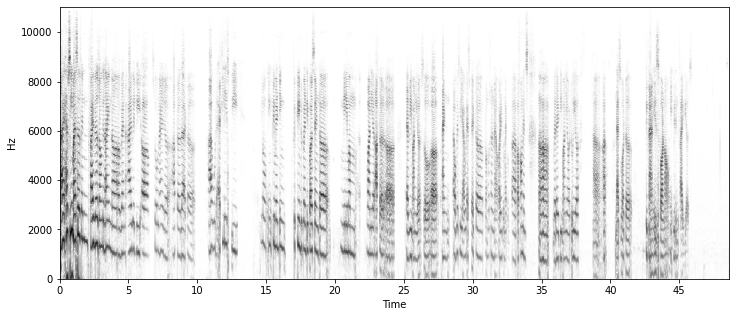

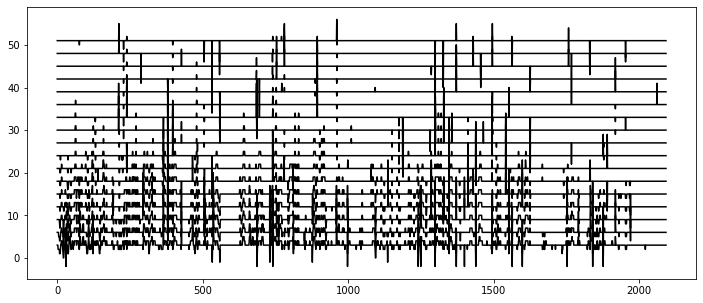

In [ ]:
from __future__ import division
import numpy as np


class Fluctogram:
    def __init__(self, spec_log, f_log, f_start=164, f_end=10548):
        # get indices for frequency range E3 (164 Hz) to E9 (10548 Hz)
        f_start_idx = np.argmin(np.abs(f_log - f_start))
        f_end_idx = np.argmin(np.abs(f_log - f_end))
        self.spec_log = spec_log[f_start_idx:f_end_idx+1, :]
        # self.spec_log = spec_log

        # parameters for the subbands
        self.n_bands = 17
        self.bandwith = 240  # in bins
        self.bands_offset = 30  # in bins

        # parameter for the correlation
        self.bin_shift = np.arange(-5, 6)

        self.fluctogram = np.zeros((self.n_bands, self.spec_log.shape[1]))

        self.extract()

    def extract(self):
        # get window function as a matrix
        win = self._get_triangle_window((self.bandwith, self.spec_log.shape[1]))

        # extract the subbands
        for cur_band_idx in np.arange(self.n_bands):
            cur_band_start = cur_band_idx * self.bands_offset
            cur_band_end = cur_band_start + self.bandwith

            # assign the subbands
            cur_band = self.spec_log[cur_band_start:cur_band_end, :].copy()

            # weight the subbands with the triangular window
            cur_band *= win

            for cur_frame in np.arange(self.spec_log.shape[1]-1):
                cur_frame_spec = cur_band[:, cur_frame]
                next_frame_spec = cur_band[:, cur_frame+1]

                # cross-correlate both frames
                xc = np.correlate(cur_frame_spec, next_frame_spec, 'same')

                # normalize according to Pearson at lag 0 (center bin)
                center_bin = int(np.floor(len(xc)/2))
                xc /= xc[center_bin]

                # Bins of interest: get +- 5 bins around center
                boi = self.bin_shift + center_bin
                xc_boi = xc[boi.tolist()]

                # take maximum idx and center it
                self.fluctogram[cur_band_idx, cur_frame] = np.argmax(xc_boi) + np.min(self.bin_shift)

    def visualize(self):
        import matplotlib.pyplot as plt

        for cur_band in np.arange(self.n_bands):
            plt.plot(self.fluctogram[cur_band, :]+(cur_band+1)*3, 'k')

    @staticmethod
    def _get_triangle_window(shape):
        win = np.bartlett(shape[0])

        return np.tile(win, (shape[1], 1)).T


def stft_interp(spec, source_freqs, target_freqs):
    """Compute an interpolated version of the spectrogram. Uses scipy.interp1d to map
       to the new frequency axis.
    """
    # magnitude spectrogram
    spec = np.abs(spec)

    from scipy.interpolate import interp1d
    set_interp = interp1d(source_freqs, spec, kind='linear', axis=0)
    spec_interp = set_interp(target_freqs)

    return spec_interp


if __name__ == '__main__':
    import librosa
    import librosa.display
    import matplotlib.pyplot as plt

    # load the audio
    y, sr = librosa.load('/content/Kushal_Q.No-12.wav')

    # get log freq axis
    bins_per_octave = 120
    target_freqs = librosa.cqt_frequencies(6*bins_per_octave, fmin=librosa.note_to_hz('E3'),
                                           bins_per_octave=bins_per_octave)

    n_fft = 4096
    hop_length = 441
    y_stft = librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length)

    y_stft_log = stft_interp(y_stft, librosa.core.fft_frequencies(sr=sr, n_fft=n_fft), target_freqs)
    plt.figure(figsize = (12,5))
    librosa.display.specshow(np.log(1 + y_stft_log), sr=sr, x_axis='time', y_axis='linear',
                             cmap=plt.get_cmap('gray_r'))

    # Calculate the fluctogram
    fluctogram = Fluctogram(y_stft_log, target_freqs)
    plt.figure(figsize = (12,5))
    fluctogram.visualize()

    plt.show()

# **Delta Features**

**Chroma Stft**

In [ ]:
delta_chroma_stft = librosa.feature.delta(chroma_stft)
delta_chroma_stft, type(delta_chroma_stft), delta_chroma_stft.shape

(array([[-0.07117443, -0.07117443, -0.07117443, ...,  0.09019664,
          0.09019664,  0.09019664],
        [-0.08900023, -0.08900023, -0.08900023, ..., -0.0894634 ,
         -0.0894634 , -0.0894634 ],
        [-0.10880078, -0.10880078, -0.10880078, ..., -0.06934257,
         -0.06934257, -0.06934257],
        ...,
        [-0.01646364, -0.01646364, -0.01646364, ...,  0.146137  ,
          0.146137  ,  0.146137  ],
        [-0.03447166, -0.03447166, -0.03447166, ...,  0.14593106,
          0.14593106,  0.14593106],
        [-0.05412741, -0.05412741, -0.05412741, ...,  0.13194232,
          0.13194232,  0.13194232]]), numpy.ndarray, (12, 3608))

In [ ]:
delta_chroma_stft_min = np.min(delta_chroma_stft,axis=1)
delta_chroma_stft_max = np.max(delta_chroma_stft,axis=1)
delta_chroma_stft_range = delta_chroma_stft_max - delta_chroma_stft_min
delta_chroma_stft_mean = np.mean(delta_chroma_stft,axis=1)
delta_chroma_stft_median = np.median(delta_chroma_stft,axis=1)
delta_chroma_stft_var = np.var(delta_chroma_stft,axis=1)
delta_chroma_stft_std = np.std(delta_chroma_stft,axis=1)


delta_chroma_stft_q25 = []
delta_chroma_stft_q50 = []
delta_chroma_stft_q75 = []

for i in range(0, len(delta_chroma_stft)):
  delta_chroma_stft_q25.append(np.percentile(delta_chroma_stft[i], 25))
  delta_chroma_stft_q50.append(np.percentile(delta_chroma_stft[i], 50))
  delta_chroma_stft_q75.append(np.percentile(delta_chroma_stft[i], 75))

delta_chroma_stft_IQR = []
for i in range (0, len(delta_chroma_stft)):
  delta_chroma_stft_IQR.append(delta_chroma_stft_q75[i] - delta_chroma_stft_q25[i])


#Generate the chromagram Dataframe
delta_chroma_stft_df=pd.DataFrame()
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_min_'+str(i)] = delta_chroma_stft_min[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_max_'+str(i)] = delta_chroma_stft_max[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_range_'+str(i)] = delta_chroma_stft_range[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_mean_'+str(i)] = delta_chroma_stft_mean[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_median_'+str(i)] = delta_chroma_stft_median[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_var_'+str(i)] = delta_chroma_stft_var[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_std_'+str(i)] = delta_chroma_stft_std[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_q25_'+str(i)] = delta_chroma_stft_q25[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_q50_'+str(i)] = delta_chroma_stft_q50[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_q75_'+str(i)] = delta_chroma_stft_q75[i]
for i in range(0,12):
    delta_chroma_stft_df['delta_chroma_stft_IQR_'+str(i)] = delta_chroma_stft_IQR[i]


delta_chroma_stft_df.loc[0]=np.concatenate((delta_chroma_stft_min, delta_chroma_stft_max, delta_chroma_stft_range, delta_chroma_stft_mean, delta_chroma_stft_median, delta_chroma_stft_var, delta_chroma_stft_std, delta_chroma_stft_q25, delta_chroma_stft_q50, delta_chroma_stft_q75, delta_chroma_stft_IQR),axis=0)
delta_chroma_stft_df

delta_chroma_stft_min_0  ...  delta_chroma_stft_IQR_11
0                -0.149895  ...                  0.055015

[1 rows x 132 columns]

In [ ]:
delta2_chroma_stft = librosa.feature.delta(chroma_stft, order=2)
delta2_chroma_stft, type(delta2_chroma_stft), delta2_chroma_stft.shape

(array([[-0.02308275, -0.02308275, -0.02308275, ..., -0.00588784,
         -0.00588784, -0.00588784],
        [ 0.01291022,  0.01291022,  0.01291022, ..., -0.01960251,
         -0.01960251, -0.01960251],
        [ 0.05221097,  0.05221097,  0.05221097, ..., -0.00844778,
         -0.00844778, -0.00844778],
        ...,
        [ 0.00441753,  0.00441753,  0.00441753, ..., -0.00345371,
         -0.00345371, -0.00345371],
        [ 0.00445444,  0.00445444,  0.00445444, ...,  0.02078571,
          0.02078571,  0.02078571],
        [-0.0069058 , -0.0069058 , -0.0069058 , ...,  0.02415649,
          0.02415649,  0.02415649]]), numpy.ndarray, (12, 3608))

In [ ]:
delta2_chroma_stft_min = np.min(delta2_chroma_stft,axis=1)
delta2_chroma_stft_max = np.max(delta2_chroma_stft,axis=1)
delta2_chroma_stft_range = delta2_chroma_stft_max - delta2_chroma_stft_min
delta2_chroma_stft_mean = np.mean(delta2_chroma_stft,axis=1)
delta2_chroma_stft_median = np.median(delta2_chroma_stft,axis=1)
delta2_chroma_stft_var = np.var(delta2_chroma_stft,axis=1)
delta2_chroma_stft_std = np.std(delta2_chroma_stft,axis=1)


delta2_chroma_stft_q25 = []
delta2_chroma_stft_q50 = []
delta2_chroma_stft_q75 = []

for i in range(0, len(delta2_chroma_stft)):
  delta2_chroma_stft_q25.append(np.percentile(delta2_chroma_stft[i], 25))
  delta2_chroma_stft_q50.append(np.percentile(delta2_chroma_stft[i], 50))
  delta2_chroma_stft_q75.append(np.percentile(delta2_chroma_stft[i], 75))

delta2_chroma_stft_IQR = []
for i in range (0, len(delta2_chroma_stft)):
  delta2_chroma_stft_IQR.append(delta2_chroma_stft_q75[i] - delta2_chroma_stft_q25[i])


#Generate the chromagram Dataframe
delta2_chroma_stft_df=pd.DataFrame()
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_min_'+str(i)] = delta2_chroma_stft_min[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_max_'+str(i)] = delta2_chroma_stft_max[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_range_'+str(i)] = delta2_chroma_stft_range[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_mean_'+str(i)] = delta2_chroma_stft_mean[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_median_'+str(i)] = delta2_chroma_stft_median[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_var_'+str(i)] = delta2_chroma_stft_var[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_std_'+str(i)] = delta2_chroma_stft_std[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_q25_'+str(i)] = delta2_chroma_stft_q25[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_q50_'+str(i)] = delta2_chroma_stft_q50[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_q75_'+str(i)] = delta2_chroma_stft_q75[i]
for i in range(0,12):
    delta2_chroma_stft_df['delta2_chroma_stft_IQR_'+str(i)] = delta2_chroma_stft_IQR[i]


delta2_chroma_stft_df.loc[0]=np.concatenate((delta2_chroma_stft_min, delta2_chroma_stft_max, delta2_chroma_stft_range, delta2_chroma_stft_mean, delta2_chroma_stft_median, delta2_chroma_stft_var, delta2_chroma_stft_std, delta2_chroma_stft_q25, delta2_chroma_stft_q50, delta2_chroma_stft_q75, delta2_chroma_stft_IQR),axis=0)
delta2_chroma_stft_df

delta2_chroma_stft_min_0  ...  delta2_chroma_stft_IQR_11
0                 -0.098345  ...                   0.032181

[1 rows x 132 columns]

**chroma_cqt**

In [ ]:
delta_chroma_cqt = librosa.feature.delta(chroma_cqt)
delta_chroma_cqt, type(delta_chroma_cqt), delta_chroma_cqt.shape

(array([[-0.00862249, -0.00862249, -0.00862249, ...,  0.04509002,
          0.04509002,  0.04509002],
        [-0.07014562, -0.07014562, -0.07014562, ...,  0.01543751,
          0.01543751,  0.01543751],
        [-0.04614639, -0.04614639, -0.04614639, ...,  0.01356154,
          0.01356154,  0.01356154],
        ...,
        [ 0.00236045,  0.00236045,  0.00236045, ...,  0.01428434,
          0.01428434,  0.01428434],
        [-0.03751663, -0.03751663, -0.03751663, ..., -0.00495327,
         -0.00495327, -0.00495327],
        [ 0.01079337,  0.01079337,  0.01079337, ...,  0.00698976,
          0.00698976,  0.00698976]]), numpy.ndarray, (12, 3608))

In [ ]:
delta_chroma_cqt_min = np.min(delta_chroma_cqt,axis=1)
delta_chroma_cqt_max = np.max(delta_chroma_cqt,axis=1)
delta_chroma_cqt_range = delta_chroma_cqt_max - delta_chroma_cqt_min
delta_chroma_cqt_mean = np.mean(delta_chroma_cqt,axis=1)
delta_chroma_cqt_median = np.median(delta_chroma_cqt,axis=1)
delta_chroma_cqt_var = np.var(delta_chroma_cqt,axis=1)
delta_chroma_cqt_std = np.std(delta_chroma_cqt,axis=1)


delta_chroma_cqt_q25 = []
delta_chroma_cqt_q50 = []
delta_chroma_cqt_q75 = []

for i in range(0, len(delta_chroma_cqt)):
  delta_chroma_cqt_q25.append(np.percentile(delta_chroma_cqt[i], 25))
  delta_chroma_cqt_q50.append(np.percentile(delta_chroma_cqt[i], 50))
  delta_chroma_cqt_q75.append(np.percentile(delta_chroma_cqt[i], 75))

delta_chroma_cqt_IQR = []
for i in range (0, len(delta_chroma_cqt)):
  delta_chroma_cqt_IQR.append(delta_chroma_cqt_q75[i] - delta_chroma_cqt_q25[i])


#Generate the chromagram Dataframe
delta_chroma_cqt_df=pd.DataFrame()
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_stft_min_'+str(i)] = delta_chroma_cqt_min[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_stft_max_'+str(i)] = delta_chroma_cqt_max[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_range_'+str(i)] = delta_chroma_cqt_range[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_mean_'+str(i)] = delta_chroma_cqt_mean[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_median_'+str(i)] = delta_chroma_cqt_median[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_var_'+str(i)] = delta_chroma_cqt_var[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_std_'+str(i)] = delta_chroma_cqt_std[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_q25_'+str(i)] = delta_chroma_cqt_q25[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_q50_'+str(i)] = delta_chroma_cqt_q50[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_q75_'+str(i)] = delta_chroma_cqt_q75[i]
for i in range(0,12):
    delta_chroma_cqt_df['delta_chroma_cqt_IQR_'+str(i)] = delta_chroma_cqt_IQR[i]


delta_chroma_cqt_df.loc[0]=np.concatenate((delta_chroma_cqt_min, delta_chroma_cqt_max, delta_chroma_cqt_range, delta_chroma_cqt_mean, delta_chroma_cqt_median, delta_chroma_cqt_var, delta_chroma_cqt_std, delta_chroma_cqt_q25, delta_chroma_cqt_q50, delta_chroma_cqt_q75, delta_chroma_cqt_IQR),axis=0)
delta_chroma_cqt_df

delta_chroma_stft_min_0  ...  delta_chroma_cqt_IQR_11
0                -0.140693  ...                 0.048134

[1 rows x 132 columns]

In [ ]:
delta2_chroma_cqt = librosa.feature.delta(chroma_cqt, order=2)
delta2_chroma_cqt, type(delta2_chroma_cqt), delta2_chroma_cqt.shape

(array([[ 0.02847929,  0.02847929,  0.02847929, ..., -0.03292274,
         -0.03292274, -0.03292274],
        [ 0.03498469,  0.03498469,  0.03498469, ..., -0.03323879,
         -0.03323879, -0.03323879],
        [ 0.0400184 ,  0.0400184 ,  0.0400184 , ..., -0.02323665,
         -0.02323665, -0.02323665],
        ...,
        [ 0.01375623,  0.01375623,  0.01375623, ...,  0.02331414,
          0.02331414,  0.02331414],
        [ 0.00851375,  0.00851375,  0.00851375, ...,  0.02900454,
          0.02900454,  0.02900454],
        [-0.02966362, -0.02966362, -0.02966362, ..., -0.00563897,
         -0.00563897, -0.00563897]]), numpy.ndarray, (12, 3608))

In [ ]:
delta2_chroma_cqt_min = np.min(delta2_chroma_cqt,axis=1)
delta2_chroma_cqt_max = np.max(delta2_chroma_cqt,axis=1)
delta2_chroma_cqt_range = delta2_chroma_cqt_max - delta2_chroma_cqt_min
delta2_chroma_cqt_mean = np.mean(delta2_chroma_cqt,axis=1)
delta2_chroma_cqt_median = np.median(delta2_chroma_cqt,axis=1)
delta2_chroma_cqt_var = np.var(delta2_chroma_cqt,axis=1)
delta2_chroma_cqt_std = np.std(delta2_chroma_cqt,axis=1)


delta2_chroma_cqt_q25 = []
delta2_chroma_cqt_q50 = []
delta2_chroma_cqt_q75 = []

for i in range(0, len(delta2_chroma_cqt)):
  delta2_chroma_cqt_q25.append(np.percentile(delta2_chroma_cqt[i], 25))
  delta2_chroma_cqt_q50.append(np.percentile(delta2_chroma_cqt[i], 50))
  delta2_chroma_cqt_q75.append(np.percentile(delta2_chroma_cqt[i], 75))

delta2_chroma_cqt_IQR = []
for i in range (0, len(delta2_chroma_cqt)):
  delta2_chroma_cqt_IQR.append(delta2_chroma_cqt_q75[i] - delta2_chroma_cqt_q25[i])


#Generate the chromagram Dataframe
delta2_chroma_cqt_df=pd.DataFrame()
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_min_'+str(i)] = delta2_chroma_cqt_min[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_max_'+str(i)] = delta2_chroma_cqt_max[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_range_'+str(i)] = delta2_chroma_cqt_range[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_mean_'+str(i)] = delta2_chroma_cqt_mean[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_median_'+str(i)] = delta2_chroma_cqt_median[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_var_'+str(i)] = delta2_chroma_cqt_var[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_std_'+str(i)] = delta2_chroma_cqt_std[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_q25_'+str(i)] = delta2_chroma_cqt_q25[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_q50_'+str(i)] = delta2_chroma_cqt_q50[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_q75_'+str(i)] = delta2_chroma_cqt_q75[i]
for i in range(0,12):
    delta2_chroma_cqt_df['delta2_chroma_cqt_IQR_'+str(i)] = delta2_chroma_cqt_IQR[i]


delta2_chroma_cqt_df.loc[0]=np.concatenate((delta2_chroma_cqt_min, delta2_chroma_cqt_max, delta2_chroma_cqt_range, delta2_chroma_cqt_mean, delta2_chroma_cqt_median, delta2_chroma_cqt_var, delta2_chroma_cqt_std, delta2_chroma_cqt_q25, delta2_chroma_cqt_q50, delta2_chroma_cqt_q75, delta2_chroma_cqt_IQR),axis=0)
delta2_chroma_cqt_df

delta2_chroma_cqt_min_0  ...  delta2_chroma_cqt_IQR_11
0                -0.102268  ...                  0.026971

[1 rows x 132 columns]

**chroma_cens**

In [ ]:
delta_chroma_cens = librosa.feature.delta(chroma_cens)
delta_chroma_cens, type(delta_chroma_cens), delta_chroma_cens.shape

(array([[-0.00506874, -0.00506874, -0.00506874, ...,  0.00078686,
          0.00078686,  0.00078686],
        [ 0.00606715,  0.00606715,  0.00606715, ...,  0.00210686,
          0.00210686,  0.00210686],
        [ 0.00868532,  0.00868532,  0.00868532, ...,  0.00076654,
          0.00076654,  0.00076654],
        ...,
        [-0.00018686, -0.00018686, -0.00018686, ..., -0.00153241,
         -0.00153241, -0.00153241],
        [-0.01030575, -0.01030575, -0.01030575, ..., -0.00281694,
         -0.00281694, -0.00281694],
        [-0.00881699, -0.00881699, -0.00881699, ..., -0.00380217,
         -0.00380217, -0.00380217]]), numpy.ndarray, (12, 3608))

In [ ]:
delta_chroma_cens_min = np.min(delta_chroma_cens,axis=1)
delta_chroma_cens_max = np.max(delta_chroma_cens,axis=1)
delta_chroma_cens_range = delta_chroma_cens_max - delta_chroma_cens_min
delta_chroma_cens_mean = np.mean(delta_chroma_cens,axis=1)
delta_chroma_cens_median = np.median(delta_chroma_cens,axis=1)
delta_chroma_cens_var = np.var(delta_chroma_cens,axis=1)
delta_chroma_cens_std = np.std(delta_chroma_cens,axis=1)


delta_chroma_cens_q25 = []
delta_chroma_cens_q50 = []
delta_chroma_cens_q75 = []

for i in range(0, len(delta_chroma_cens)):
  delta_chroma_cens_q25.append(np.percentile(delta_chroma_cens[i], 25))
  delta_chroma_cens_q50.append(np.percentile(delta_chroma_cens[i], 50))
  delta_chroma_cens_q75.append(np.percentile(delta_chroma_cens[i], 75))

delta_chroma_cens_IQR = []
for i in range (0, len(delta_chroma_cens)):
  delta_chroma_cens_IQR.append(delta_chroma_cens_q75[i] - delta_chroma_cens_q25[i])


#Generate the chromagram Dataframe
delta_chroma_cens_df=pd.DataFrame()
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_min_'+str(i)] = delta_chroma_cens_min[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_max_'+str(i)] = delta_chroma_cens_max[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_range_'+str(i)] = delta_chroma_cens_range[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_mean_'+str(i)] = delta_chroma_cens_mean[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_median_'+str(i)] = delta_chroma_cens_median[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_var_'+str(i)] = delta_chroma_cens_var[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_std_'+str(i)] = delta_chroma_cens_std[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_q25_'+str(i)] = delta_chroma_cens_q25[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_q50_'+str(i)] = delta_chroma_cens_q50[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_q75_'+str(i)] = delta_chroma_cens_q75[i]
for i in range(0,12):
    delta_chroma_cens_df['delta_chroma_cens_IQR_'+str(i)] = delta_chroma_cens_IQR[i]


delta_chroma_cens_df.loc[0]=np.concatenate((delta_chroma_cens_min, delta_chroma_cens_max, delta_chroma_cens_range, delta_chroma_cens_mean, delta_chroma_cens_median, delta_chroma_cens_var, delta_chroma_cens_std, delta_chroma_cens_q25, delta_chroma_cens_q50, delta_chroma_cens_q75, delta_chroma_cens_IQR),axis=0)
delta_chroma_cens_df

delta_chroma_cens_min_0  ...  delta_chroma_cens_IQR_11
0                -0.020906  ...                  0.009233

[1 rows x 132 columns]

In [ ]:
delta2_chroma_cens = librosa.feature.delta(chroma_cens, order=2)
delta2_chroma_cens, type(delta2_chroma_cens), delta2_chroma_cens.shape

(array([[-9.33513525e-04, -9.33513525e-04, -9.33513525e-04, ...,
          1.10331594e-05,  1.10331594e-05,  1.10331594e-05],
        [ 1.05995679e-03,  1.05995679e-03,  1.05995679e-03, ...,
          1.58397442e-04,  1.58397442e-04,  1.58397442e-04],
        [ 2.11874677e-03,  2.11874677e-03,  2.11874677e-03, ...,
         -1.34864608e-07, -1.34864608e-07, -1.34864608e-07],
        ...,
        [ 4.09381339e-04,  4.09381339e-04,  4.09381339e-04, ...,
          3.12237479e-04,  3.12237479e-04,  3.12237479e-04],
        [ 1.14060471e-05,  1.14060471e-05,  1.14060471e-05, ...,
          4.55981410e-04,  4.55981410e-04,  4.55981410e-04],
        [-5.85156644e-04, -5.85156644e-04, -5.85156644e-04, ...,
         -2.46015200e-04, -2.46015200e-04, -2.46015200e-04]]),
 numpy.ndarray,
 (12, 3608))

In [ ]:
delta2_chroma_cens_min = np.min(delta2_chroma_cens,axis=1)
delta2_chroma_cens_max = np.max(delta2_chroma_cens,axis=1)
delta2_chroma_cens_range = delta2_chroma_cens_max - delta2_chroma_cens_min
delta2_chroma_cens_mean = np.mean(delta2_chroma_cens,axis=1)
delta2_chroma_cens_median = np.median(delta2_chroma_cens,axis=1)
delta2_chroma_cens_var = np.var(delta2_chroma_cens,axis=1)
delta2_chroma_cens_std = np.std(delta2_chroma_cens,axis=1)


delta2_chroma_cens_q25 = []
delta2_chroma_cens_q50 = []
delta2_chroma_cens_q75 = []

for i in range(0, len(delta2_chroma_cens)):
  delta2_chroma_cens_q25.append(np.percentile(delta2_chroma_cens[i], 25))
  delta2_chroma_cens_q50.append(np.percentile(delta2_chroma_cens[i], 50))
  delta2_chroma_cens_q75.append(np.percentile(delta2_chroma_cens[i], 75))

delta2_chroma_cens_IQR = []
for i in range (0, len(delta2_chroma_cens)):
  delta2_chroma_cens_IQR.append(delta2_chroma_cens_q75[i] - delta2_chroma_cens_q25[i])


#Generate the chromagram Dataframe
delta2_chroma_cens_df=pd.DataFrame()
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_min_'+str(i)] = delta2_chroma_cens_min[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_max_'+str(i)] = delta2_chroma_cens_max[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta_chroma_cens_range_'+str(i)] = delta2_chroma_cens_range[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_mean_'+str(i)] = delta2_chroma_cens_mean[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_median_'+str(i)] = delta2_chroma_cens_median[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_var_'+str(i)] = delta2_chroma_cens_var[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_std_'+str(i)] = delta2_chroma_cens_std[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_q25_'+str(i)] = delta2_chroma_cens_q25[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_q50_'+str(i)] = delta2_chroma_cens_q50[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_q75_'+str(i)] = delta2_chroma_cens_q75[i]
for i in range(0,12):
    delta2_chroma_cens_df['delta2_chroma_cens_IQR_'+str(i)] = delta2_chroma_cens_IQR[i]


delta2_chroma_cens_df.loc[0]=np.concatenate((delta2_chroma_cens_min, delta2_chroma_cens_max, delta2_chroma_cens_range, delta2_chroma_cens_mean, delta2_chroma_cens_median, delta2_chroma_cens_var, delta2_chroma_cens_std, delta2_chroma_cens_q25, delta2_chroma_cens_q50, delta2_chroma_cens_q75, delta2_chroma_cens_IQR),axis=0)
delta2_chroma_cens_df

delta2_chroma_cens_min_0  ...  delta2_chroma_cens_IQR_11
0                  -0.00262  ...                   0.001188

[1 rows x 132 columns]

**mel_spec**

In [ ]:
delta_mel_spec = librosa.feature.delta(mel_spec)
delta_mel_spec, type(delta_mel_spec), delta_mel_spec.shape

(array([[-3.15542229e-02, -3.15542229e-02, -3.15542229e-02, ...,
          1.79439538e-05,  1.79439538e-05,  1.79439538e-05],
        [-1.48701280e-02, -1.48701280e-02, -1.48701280e-02, ...,
          1.71871314e-05,  1.71871314e-05,  1.71871314e-05],
        [-8.15540699e-03, -8.15540699e-03, -8.15540699e-03, ...,
          1.22770132e-04,  1.22770132e-04,  1.22770132e-04],
        ...,
        [ 7.75901115e-09,  7.75901115e-09,  7.75901115e-09, ...,
          2.27632859e-07,  2.27632859e-07,  2.27632859e-07],
        [ 2.55711912e-09,  2.55711912e-09,  2.55711912e-09, ...,
          2.71570082e-07,  2.71570082e-07,  2.71570082e-07],
        [ 2.23885059e-10,  2.23885059e-10,  2.23885059e-10, ...,
          2.56952363e-07,  2.56952363e-07,  2.56952363e-07]]),
 numpy.ndarray,
 (128, 3608))

In [ ]:
delta_mel_spec_min = np.min(delta_mel_spec,axis=1)
delta_mel_spec_max = np.max(delta_mel_spec,axis=1)
delta_mel_spec_range = delta_mel_spec_max - delta_mel_spec_min
delta_mel_spec_mean = np.mean(delta_mel_spec,axis=1)
delta_mel_spec_median = np.median(delta_mel_spec,axis=1)
delta_mel_spec_var = np.var(delta_mel_spec,axis=1)
delta_mel_spec_std = np.std(delta_mel_spec,axis=1)


delta_mel_spec_q25 = []
delta_mel_spec_q50 = []
delta_mel_spec_q75 = []

for i in range(0, len(delta_mel_spec)):
  delta_mel_spec_q25.append(np.percentile(delta_mel_spec[i], 25))
  delta_mel_spec_q50.append(np.percentile(delta_mel_spec[i], 50))
  delta_mel_spec_q75.append(np.percentile(delta_mel_spec[i], 75))

delta_mel_spec_IQR = []
for i in range (0, len(delta_mel_spec)):
  delta_mel_spec_IQR.append(delta_mel_spec_q75[i] - delta_mel_spec_q25[i])


#Generate the Mel-Scaled-Spectogram Dataframe
delta_mel_spec_df=pd.DataFrame()
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_min_'+str(i)] = delta_mel_spec_min[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_max_'+str(i)] = delta_mel_spec_max[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_range_'+str(i)] = delta_mel_spec_range[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_mean_'+str(i)] = delta_mel_spec_mean[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_median_'+str(i)] = delta_mel_spec_median[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_var_'+str(i)] = delta_mel_spec_var[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_std_'+str(i)] = delta_mel_spec_std[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_q25_'+str(i)] = delta_mel_spec_q25[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_q50_'+str(i)] = delta_mel_spec_q50[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_q75_'+str(i)] = delta_mel_spec_q75[i]
for i in range(0,len(delta_mel_spec)):
    delta_mel_spec_df['delta_mel_spec_IQR_'+str(i)] = delta_mel_spec_IQR[i]


delta_mel_spec_df.loc[0]=np.concatenate((delta_mel_spec_min, delta_mel_spec_max, delta_mel_spec_range, delta_mel_spec_mean, delta_mel_spec_median, delta_mel_spec_var, delta_mel_spec_std, delta_mel_spec_q25, delta_mel_spec_q50, delta_mel_spec_q75, delta_mel_spec_IQR), axis=0)
delta_mel_spec_df

delta_mel_spec_min_0  ...  delta_mel_spec_IQR_127
0             -0.448654  ...            1.267377e-11

[1 rows x 1408 columns]

In [ ]:
delta2_mel_spec = librosa.feature.delta(mel_spec, order=2)
delta2_mel_spec, type(delta2_mel_spec), delta2_mel_spec.shape

(array([[ 1.80706866e-02,  1.80706866e-02,  1.80706866e-02, ...,
          1.30616602e-05,  1.30616602e-05,  1.30616602e-05],
        [ 2.69207938e-02,  2.69207938e-02,  2.69207938e-02, ...,
          3.55020585e-06,  3.55020585e-06,  3.55020585e-06],
        [-2.00899444e-01, -2.00899444e-01, -2.00899444e-01, ...,
          3.18427084e-05,  3.18427084e-05,  3.18427084e-05],
        ...,
        [ 5.06925614e-09,  5.06925614e-09,  5.06925614e-09, ...,
          1.85690123e-07,  1.85690123e-07,  1.85690123e-07],
        [ 1.89491883e-09,  1.89491883e-09,  1.89491883e-09, ...,
          2.21727581e-07,  2.21727581e-07,  2.21727581e-07],
        [ 9.70509619e-11,  9.70509619e-11,  9.70509619e-11, ...,
          2.09749999e-07,  2.09749999e-07,  2.09749999e-07]]),
 numpy.ndarray,
 (128, 3608))

In [ ]:
delta2_mel_spec_min = np.min(delta2_mel_spec,axis=1)
delta2_mel_spec_max = np.max(delta2_mel_spec,axis=1)
delta2_mel_spec_range = delta2_mel_spec_max - delta2_mel_spec_min
delta2_mel_spec_mean = np.mean(delta2_mel_spec,axis=1)
delta2_mel_spec_median = np.median(delta2_mel_spec,axis=1)
delta2_mel_spec_var = np.var(delta2_mel_spec,axis=1)
delta2_mel_spec_std = np.std(delta2_mel_spec,axis=1)


delta2_mel_spec_q25 = []
delta2_mel_spec_q50 = []
delta2_mel_spec_q75 = []

for i in range(0, len(delta2_mel_spec)):
  delta2_mel_spec_q25.append(np.percentile(delta2_mel_spec[i], 25))
  delta2_mel_spec_q50.append(np.percentile(delta2_mel_spec[i], 50))
  delta2_mel_spec_q75.append(np.percentile(delta2_mel_spec[i], 75))

delta2_mel_spec_IQR = []
for i in range (0, len(delta2_mel_spec)):
  delta2_mel_spec_IQR.append(delta2_mel_spec_q75[i] - delta2_mel_spec_q25[i])


#Generate the Mel-Scaled-Spectogram Dataframe
delta2_mel_spec_df=pd.DataFrame()
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_min_'+str(i)] = delta2_mel_spec_min[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_max_'+str(i)] = delta2_mel_spec_max[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_range_'+str(i)] = delta2_mel_spec_range[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_mean_'+str(i)] = delta2_mel_spec_mean[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_median_'+str(i)] = delta2_mel_spec_median[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_var_'+str(i)] = delta2_mel_spec_var[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_std_'+str(i)] = delta2_mel_spec_std[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_q25_'+str(i)] = delta2_mel_spec_q25[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_q50_'+str(i)] = delta2_mel_spec_q50[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_q75_'+str(i)] = delta2_mel_spec_q75[i]
for i in range(0,len(delta2_mel_spec)):
    delta2_mel_spec_df['delta2_mel_spec_IQR_'+str(i)] = delta2_mel_spec_IQR[i]


delta2_mel_spec_df.loc[0]=np.concatenate((delta2_mel_spec_min, delta2_mel_spec_max, delta2_mel_spec_range, delta2_mel_spec_mean, delta2_mel_spec_median, delta2_mel_spec_var, delta2_mel_spec_std, delta2_mel_spec_q25, delta2_mel_spec_q50, delta2_mel_spec_q75, delta2_mel_spec_IQR), axis=0)
delta2_mel_spec_df

delta2_mel_spec_min_0  ...  delta2_mel_spec_IQR_127
0              -0.332924  ...             9.333389e-12

[1 rows x 1408 columns]

**MFCC**

In [ ]:
delta_mfccs = librosa.feature.delta(mfccs)
delta_mfccs, type(delta_mfccs), delta_mfccs.shape

(array([[17.09288518, 17.09288518, 17.09288518, ..., -2.62436179,
         -2.62436179, -2.62436179],
        [ 2.17776689,  2.17776689,  2.17776689, ...,  3.98195777,
          3.98195777,  3.98195777],
        [-7.18940147, -7.18940147, -7.18940147, ...,  5.65920794,
          5.65920794,  5.65920794],
        ...,
        [-0.30226869, -0.30226869, -0.30226869, ...,  0.0199219 ,
          0.0199219 ,  0.0199219 ],
        [-0.30545468, -0.30545468, -0.30545468, ...,  0.73562977,
          0.73562977,  0.73562977],
        [-1.01303533, -1.01303533, -1.01303533, ..., -0.38125016,
         -0.38125016, -0.38125016]]), numpy.ndarray, (40, 3608))

In [ ]:
delta_mfccs_min = np.min(delta_mfccs,axis=1)
delta_mfccs_max = np.max(delta_mfccs,axis=1)
delta_mfccs_range = delta_mfccs_max - delta_mfccs_min
delta_mfccs_mean = np.mean(delta_mfccs,axis=1)
delta_mfccs_median = np.median(delta_mfccs,axis=1)
delta_mfccs_var = np.var(delta_mfccs,axis=1)
delta_mfccs_std = np.std(delta_mfccs,axis=1)


delta_mfccs_q25 = []
delta_mfccs_q50 = []
delta_mfccs_q75 = []

for i in range(0, len(delta_mfccs)):
  delta_mfccs_q25.append(np.percentile(delta_mfccs[i], 25))
  delta_mfccs_q50.append(np.percentile(delta_mfccs[i], 50))
  delta_mfccs_q75.append(np.percentile(delta_mfccs[i], 75))

delta_mfccs_IQR = []
for i in range (0, len(delta_mfccs)):
  delta_mfccs_IQR.append(delta_mfccs_q75[i] - delta_mfccs_q25[i])


#Generate the MFCC Dataframe
delta_mfccs_df = pd.DataFrame()
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_min_'+str(i)] = delta_mfccs_min[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_max_'+str(i)] = delta_mfccs_max[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_range_'+str(i)] = delta_mfccs_range[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_mean_'+str(i)] = delta_mfccs_mean[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_median_'+str(i)] = delta_mfccs_median[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_var_'+str(i)] = delta_mfccs_var[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_std_'+str(i)] = delta_mfccs_std[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_q25_'+str(i)] = delta_mfccs_q25[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_q50_'+str(i)] = delta_mfccs_q50[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_q75_'+str(i)] = delta_mfccs_q75[i]
for i in range(0,len(delta_mfccs)):
    delta_mfccs_df['delta_mfccs_IQR_'+str(i)] = delta_mfccs_IQR[i]


delta_mfccs_df.loc[0]=np.concatenate((delta_mfccs_min, delta_mfccs_max, delta_mfccs_range, delta_mfccs_mean, delta_mfccs_median, delta_mfccs_var, delta_mfccs_std, delta_mfccs_q25, delta_mfccs_q50, delta_mfccs_q75, delta_mfccs_IQR), axis=0)
delta_mfccs_df

delta_mfccs_min_0  delta_mfccs_min_1  ...  delta_mfccs_IQR_38  delta_mfccs_IQR_39
0         -50.838052         -31.799029  ...            0.708388            0.679027

[1 rows x 440 columns]

In [ ]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
delta2_mfccs, type(delta2_mfccs), delta2_mfccs.shape

(array([[-7.32234365, -7.32234365, -7.32234365, ...,  1.24246642,
          1.24246642,  1.24246642],
        [-1.32188514, -1.32188514, -1.32188514, ..., -0.73635481,
         -0.73635481, -0.73635481],
        [ 1.11848938,  1.11848938,  1.11848938, ..., -1.16370647,
         -1.16370647, -1.16370647],
        ...,
        [-0.0997001 , -0.0997001 , -0.0997001 , ...,  0.09050632,
          0.09050632,  0.09050632],
        [ 0.88082063,  0.88082063,  0.88082063, ..., -0.36217112,
         -0.36217112, -0.36217112],
        [-0.70700694, -0.70700694, -0.70700694, ..., -0.51860316,
         -0.51860316, -0.51860316]]), numpy.ndarray, (40, 3608))

In [ ]:
delta2_mfccs_min = np.min(delta2_mfccs,axis=1)
delta2_mfccs_max = np.max(delta2_mfccs,axis=1)
delta2_mfccs_range = delta2_mfccs_max - delta2_mfccs_min
delta2_mfccs_mean = np.mean(delta2_mfccs,axis=1)
delta2_mfccs_median = np.median(delta2_mfccs,axis=1)
delta2_mfccs_var = np.var(delta2_mfccs,axis=1)
delta2_mfccs_std = np.std(delta2_mfccs,axis=1)


delta2_mfccs_q25 = []
delta2_mfccs_q50 = []
delta2_mfccs_q75 = []

for i in range(0, len(delta2_mfccs)):
  delta2_mfccs_q25.append(np.percentile(delta2_mfccs[i], 25))
  delta2_mfccs_q50.append(np.percentile(delta2_mfccs[i], 50))
  delta2_mfccs_q75.append(np.percentile(delta2_mfccs[i], 75))

delta2_mfccs_IQR = []
for i in range (0, len(delta2_mfccs)):
  delta2_mfccs_IQR.append(delta2_mfccs_q75[i] - delta2_mfccs_q25[i])


#Generate the MFCC Dataframe
delta2_mfccs_df = pd.DataFrame()
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_min_'+str(i)] = delta2_mfccs_min[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_max_'+str(i)] = delta2_mfccs_max[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_range_'+str(i)] = delta2_mfccs_range[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_mean_'+str(i)] = delta2_mfccs_mean[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_median_'+str(i)] = delta2_mfccs_median[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_var_'+str(i)] = delta2_mfccs_var[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_std_'+str(i)] = delta2_mfccs_std[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_q25_'+str(i)] = delta2_mfccs_q25[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_q50_'+str(i)] = delta2_mfccs_q50[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_q75_'+str(i)] = delta2_mfccs_q75[i]
for i in range(0,len(delta2_mfccs)):
    delta2_mfccs_df['delta2_mfccs_IQR_'+str(i)] = delta2_mfccs_IQR[i]

delta2_mfccs_df.loc[0]=np.concatenate((delta2_mfccs_min, delta2_mfccs_max, delta2_mfccs_range, delta2_mfccs_mean, delta2_mfccs_median, delta2_mfccs_var, delta2_mfccs_std, delta2_mfccs_q25, delta2_mfccs_q50, delta2_mfccs_q75, delta2_mfccs_IQR), axis=0)
delta2_mfccs_df

delta2_mfccs_min_0  ...  delta2_mfccs_IQR_39
0           -23.53133  ...             0.475628

[1 rows x 440 columns]

**rms**

In [ ]:
delta_rms = librosa.feature.delta(rms)
delta_rms, type(delta_rms), delta_rms.shape

(array([[0.51606053, 0.51606053, 0.51606053, ..., 0.00159789, 0.00159789,
         0.00159789]], dtype=float32), numpy.ndarray, (1, 3608))

In [ ]:
delta_rms_min = np.min(delta_rms)
delta_rms_max = np.max(delta_rms)
delta_rms_range = delta_rms_max - delta_rms_min
delta_rms_mean = np.mean(delta_rms)
delta_rms_median = np.median(delta_rms)
delta_rms_var = np.var(delta_rms)
delta_rms_std = np.std(delta_rms)
delta_rms_q25 = np.percentile(delta_rms, 25)
delta_rms_q50 = np.percentile(delta_rms, 50)
delta_rms_q75 = np.percentile(delta_rms, 75)
delta_rms_IQR = delta_rms_q75 - delta_rms_q25

delta_rms_list = [delta_rms_min, delta_rms_max, delta_rms_range, delta_rms_mean, delta_rms_median, delta_rms_var, delta_rms_std, delta_rms_q25, delta_rms_q50, delta_rms_q75, delta_rms_IQR]

#Generate the RMS Dataframe
delta_rms_df = pd.DataFrame(data = [delta_rms_list], columns = ['delta_rms_min', 'delta_rms_max', 'delta_rms_range', 'delta_rms_mean', 'delta_rms_median', 'delta_rms_var', 'delta_rms_std', 'delta_rms_q25', 'delta_rms_q50', 'delta_rms_q75', 'delta_rms_IQR'])
delta_rms_df

delta_rms_min  delta_rms_max  ...  delta_rms_q75  delta_rms_IQR
0      -0.649088       1.092974  ...       0.015882         0.0391

[1 rows x 11 columns]

In [ ]:
delta2_rms = librosa.feature.delta(rms, order=2)
delta2_rms, type(delta2_rms), delta2_rms.shape

(array([[-0.19226387, -0.19226387, -0.19226387, ...,  0.00048023,
          0.00048023,  0.00048023]], dtype=float32), numpy.ndarray, (1, 3608))

In [ ]:
delta2_rms_min = np.min(delta2_rms)
delta2_rms_max = np.max(delta2_rms)
delta2_rms_range = delta2_rms_max - delta2_rms_min
delta2_rms_mean = np.mean(delta2_rms)
delta2_rms_median = np.median(delta2_rms)
delta2_rms_var = np.var(delta2_rms)
delta2_rms_std = np.std(delta2_rms)
delta2_rms_q25 = np.percentile(delta2_rms, 25)
delta2_rms_q50 = np.percentile(delta2_rms, 50)
delta2_rms_q75 = np.percentile(delta2_rms, 75)
delta2_rms_IQR = delta2_rms_q75 - delta2_rms_q25

delta2_rms_list = [delta2_rms_min, delta2_rms_max, delta2_rms_range, delta2_rms_mean, delta2_rms_median, delta2_rms_var, delta2_rms_std, delta2_rms_q25, delta2_rms_q50, delta2_rms_q75, delta2_rms_IQR]

#Generate the RMS Dataframe
delta2_rms_df = pd.DataFrame(data = [delta2_rms_list], columns = ['delta2_rms_min', 'delta2_rms_max', 'delta2_rms_range', 'delta2_rms_mean', 'delta2_rms_median', 'delta2_rms_var', 'delta2_rms_std', 'delta2_rms_q25', 'delta2_rms_q50', 'delta2_rms_q75', 'delta2_rms_IQR'])
delta2_rms_df

delta2_rms_min  delta2_rms_max  ...  delta2_rms_q75  delta2_rms_IQR
0       -0.399385        0.388843  ...        0.007591        0.014187

[1 rows x 11 columns]

**Spectral Centroid**

In [ ]:
delta_spec_centroid = librosa.feature.delta(spec_centroid)
delta_spec_centroid, type(delta_spec_centroid), delta_spec_centroid.shape

(array([[41.79039318, 41.79039318, 41.79039318, ..., 27.46804544,
         27.46804544, 27.46804544]]), numpy.ndarray, (1, 3608))

In [ ]:
delta_spec_centroid_min = np.min(delta_spec_centroid)
delta_spec_centroid_max = np.max(delta_spec_centroid)
delta_spec_centroid_range = delta_spec_centroid_max - delta_spec_centroid_min
delta_spec_centroid_mean = np.mean(delta_spec_centroid)
delta_spec_centroid_median = np.median(delta_spec_centroid)
delta_spec_centroid_var = np.var(delta_spec_centroid)
delta_spec_centroid_std = np.std(delta_spec_centroid)
delta_spec_centroid_q25 = np.percentile(delta_spec_centroid, 25)
delta_spec_centroid_q50 = np.percentile(delta_spec_centroid, 50)
delta_spec_centroid_q75 = np.percentile(delta_spec_centroid, 75)
delta_spec_centroid_IQR = delta_spec_centroid_q75 - delta_spec_centroid_q25

delta_spec_centroid_list = [delta_spec_centroid_min, delta_spec_centroid_max, delta_spec_centroid_range, delta_spec_centroid_mean, delta_spec_centroid_median, delta_spec_centroid_var, delta_spec_centroid_std, delta_spec_centroid_q25, delta_spec_centroid_q50, delta_spec_centroid_q75, delta_spec_centroid_IQR]

#Generate the Spectral Centroid Dataframe
delta_spec_centroid_df = pd.DataFrame(data = [delta_spec_centroid_list], columns = ['delta_spec_centroid_min', 'delta_spec_centroid_max', 'delta_spec_centroid_range', 'delta_spec_centroid_mean', 'delta_spec_centroid_median', 'delta_spec_centroid_var', 'delta_spec_centroid_std', 'delta_spec_centroid_q25', 'delta_spec_centroid_q50', 'delta_spec_centroid_q75', 'delta_spec_centroid_IQR'])
delta_spec_centroid_df

delta_spec_centroid_min  ...  delta_spec_centroid_IQR
0              -655.061201  ...                96.295922

[1 rows x 11 columns]

In [ ]:
delta2_spec_centroid = librosa.feature.delta(spec_centroid, order=2)
delta2_spec_centroid, type(delta2_spec_centroid), delta2_spec_centroid.shape

(array([[  5.76104231,   5.76104231,   5.76104231, ..., 359.92063332,
         359.92063332, 359.92063332]]), numpy.ndarray, (1, 3608))

In [ ]:
delta2_spec_centroid_min = np.min(delta2_spec_centroid)
delta2_spec_centroid_max = np.max(delta2_spec_centroid)
delta2_spec_centroid_range = delta2_spec_centroid_max - delta2_spec_centroid_min
delta2_spec_centroid_mean = np.mean(delta2_spec_centroid)
delta2_spec_centroid_median = np.median(delta2_spec_centroid)
delta2_spec_centroid_var = np.var(delta2_spec_centroid)
delta2_spec_centroid_std = np.std(delta2_spec_centroid)
delta2_spec_centroid_q25 = np.percentile(delta2_spec_centroid, 25)
delta2_spec_centroid_q50 = np.percentile(delta2_spec_centroid, 50)
delta2_spec_centroid_q75 = np.percentile(delta2_spec_centroid, 75)
delta2_spec_centroid_IQR = delta2_spec_centroid_q75 - delta2_spec_centroid_q25

delta2_spec_centroid_list = [delta2_spec_centroid_min, delta2_spec_centroid_max, delta2_spec_centroid_range, delta2_spec_centroid_mean, delta2_spec_centroid_median, delta2_spec_centroid_var, delta2_spec_centroid_std, delta2_spec_centroid_q25, delta2_spec_centroid_q50, delta2_spec_centroid_q75, delta2_spec_centroid_IQR]

#Generate the Spectral Centroid Dataframe
delta2_spec_centroid_df = pd.DataFrame(data = [delta2_spec_centroid_list], columns = ['delta2_spec_centroid_min', 'delta2_spec_centroid_max', 'delta2_spec_centroid_range', 'delta2_spec_centroid_mean', 'delta2_spec_centroid_median', 'delta2_spec_centroid_var', 'delta2_spec_centroid_std', 'delta2_spec_centroid_q25', 'delta2_spec_centroid_q50', 'delta2_spec_centroid_q75', 'delta2_spec_centroid_IQR'])
delta2_spec_centroid_df

delta2_spec_centroid_min  ...  delta2_spec_centroid_IQR
0               -372.851174  ...                 43.240702

[1 rows x 11 columns]

**spec_bw**

In [ ]:
delta_spec_bw = librosa.feature.delta(spec_bw)
delta_spec_bw, type(delta_spec_bw), delta_spec_bw.shape

(array([[  9.47829907,   9.47829907,   9.47829907, ..., 652.1047819 ,
         652.1047819 , 652.1047819 ]]), numpy.ndarray, (1, 3608))

In [ ]:
delta_spec_bw_min = np.min(delta_spec_bw)
delta_spec_bw_max = np.max(delta_spec_bw)
delta_spec_bw_range = delta_spec_bw_max - delta_spec_bw_min
delta_spec_bw_mean = np.mean(delta_spec_bw)
delta_spec_bw_median = np.median(delta_spec_bw)
delta_spec_bw_var = np.var(delta_spec_bw)
delta_spec_bw_std = np.std(delta_spec_bw)
delta_spec_bw_q25 = np.percentile(delta_spec_bw, 25)
delta_spec_bw_q50 = np.percentile(delta_spec_bw, 50)
delta_spec_bw_q75 = np.percentile(delta_spec_bw, 75)
delta_spec_bw_IQR = delta_spec_bw_q75 - delta_spec_bw_q25

delta_spec_bw_list = [delta_spec_bw_min, delta_spec_bw_max, delta_spec_bw_range, delta_spec_bw_mean, delta_spec_bw_median, delta_spec_bw_var, delta_spec_bw_std, delta_spec_bw_q25, delta_spec_bw_q50, delta_spec_bw_q75, delta_spec_bw_IQR]

#Generate the Spectral Bandwidth Dataframe
delta_spec_bw_df = pd.DataFrame(data = [delta_spec_bw_list], columns = ['delta_spec_bw_min', 'delta_spec_bw_max', 'delta_spec_bw_range', 'delta_spec_bw_mean', 'delta_spec_bw_median', 'delta_spec_bw_var', 'delta_spec_bw_std', 'delta_spec_bw_q25', 'delta_spec_bw_q50', 'delta_spec_bw_q75', 'delta_spec_bw_IQR'])
delta_spec_bw_df

delta_spec_bw_min  delta_spec_bw_max  ...  delta_spec_bw_q75  delta_spec_bw_IQR
0         -595.93215         652.104782  ...           33.80297          65.267144

[1 rows x 11 columns]

In [ ]:
delta2_spec_bw = librosa.feature.delta(spec_bw)
delta2_spec_bw, type(delta2_spec_bw), delta2_spec_bw.shape

(array([[  9.47829907,   9.47829907,   9.47829907, ..., 652.1047819 ,
         652.1047819 , 652.1047819 ]]), numpy.ndarray, (1, 3608))

In [ ]:
delta2_spec_bw_min = np.min(delta2_spec_bw)
delta2_spec_bw_max = np.max(delta2_spec_bw)
delta2_spec_bw_range = delta2_spec_bw_max - delta2_spec_bw_min
delta2_spec_bw_mean = np.mean(delta2_spec_bw)
delta2_spec_bw_median = np.median(delta2_spec_bw)
delta2_spec_bw_var = np.var(delta2_spec_bw)
delta2_spec_bw_std = np.std(delta2_spec_bw)
delta2_spec_bw_q25 = np.percentile(delta2_spec_bw, 25)
delta2_spec_bw_q50 = np.percentile(delta2_spec_bw, 50)
delta2_spec_bw_q75 = np.percentile(delta2_spec_bw, 75)
delta2_spec_bw_IQR = delta2_spec_bw_q75 - delta2_spec_bw_q25

delta2_spec_bw_list = [delta2_spec_bw_min, delta2_spec_bw_max, delta2_spec_bw_range, delta2_spec_bw_mean, delta2_spec_bw_median, delta2_spec_bw_var, delta2_spec_bw_std, delta2_spec_bw_q25, delta2_spec_bw_q50, delta2_spec_bw_q75, delta2_spec_bw_IQR]

#Generate the Spectral Bandwidth Dataframe
delta2_spec_bw_df = pd.DataFrame(data = [delta2_spec_bw_list], columns = ['delta2_spec_bw_min', 'delta2_spec_bw_max', 'delta2_spec_bw_range', 'delta2_spec_bw_mean', 'delta2_spec_bw_median', 'delta2_spec_bw_var', 'delta2_spec_bw_std', 'delta2_spec_bw_q25', 'delta2_spec_bw_q50', 'delta2_spec_bw_q75', 'delta2_spec_bw_IQR'])
delta2_spec_bw_df

delta2_spec_bw_min  ...  delta2_spec_bw_IQR
0          -595.93215  ...           65.267144

[1 rows x 11 columns]

**spec_contrast**

In [ ]:
delta_spec_contrast = librosa.feature.delta(spec_contrast)
delta_spec_contrast, type(delta_spec_contrast), delta_spec_contrast.shape

(array([[ 0.34281956,  0.34281956,  0.34281956, ..., -0.17427532,
         -0.17427532, -0.17427532],
        [ 0.25123054,  0.25123054,  0.25123054, ...,  1.18512957,
          1.18512957,  1.18512957],
        [ 0.90352347,  0.90352347,  0.90352347, ...,  0.5619392 ,
          0.5619392 ,  0.5619392 ],
        ...,
        [-0.22877121, -0.22877121, -0.22877121, ...,  0.05917217,
          0.05917217,  0.05917217],
        [-1.12081284, -1.12081284, -1.12081284, ..., -1.31025799,
         -1.31025799, -1.31025799],
        [ 0.53905196,  0.53905196,  0.53905196, ..., -4.85692461,
         -4.85692461, -4.85692461]]), numpy.ndarray, (7, 3608))

In [ ]:
delta_spec_contrast_min = np.min(delta_spec_contrast,axis=1)
delta_spec_contrast_max = np.max(delta_spec_contrast,axis=1)
delta_spec_contrast_range = delta_spec_contrast_max - delta_spec_contrast_min
delta_spec_contrast_mean = np.mean(delta_spec_contrast,axis=1)
delta_spec_contrast_median = np.median(delta_spec_contrast,axis=1)
delta_spec_contrast_var = np.var(delta_spec_contrast,axis=1)
delta_spec_contrast_std = np.std(delta_spec_contrast,axis=1)


delta_spec_contrast_q25 = []
delta_spec_contrast_q50 = []
delta_spec_contrast_q75 = []

for i in range(0, len(delta_spec_contrast)):
  delta_spec_contrast_q25.append(np.percentile(delta_spec_contrast[i], 25))
  delta_spec_contrast_q50.append(np.percentile(delta_spec_contrast[i], 50))
  delta_spec_contrast_q75.append(np.percentile(delta_spec_contrast[i], 75))

delta_spec_contrast_IQR = []
for i in range (0, len(delta_spec_contrast)):
  delta_spec_contrast_IQR.append(delta_spec_contrast_q75[i] - delta_spec_contrast_q25[i])


#Generate the Spctral Contrast Dataframe
delta_spec_contrast_df = pd.DataFrame()
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_min_'+str(i)] = delta_spec_contrast_min[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_max_'+str(i)] = delta_spec_contrast_max[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_range_'+str(i)] = delta_spec_contrast_range[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_mean_'+str(i)] = delta_spec_contrast_mean[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_median_'+str(i)] = delta_spec_contrast_median[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_var_'+str(i)] = delta_spec_contrast_var[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_std_'+str(i)] = delta_spec_contrast_std[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_q25_'+str(i)] = delta_spec_contrast_q25[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_q50_'+str(i)] = delta_spec_contrast_q50[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_q75_'+str(i)] = delta_spec_contrast_q75[i]
for i in range(0,len(delta_spec_contrast)):
    delta_spec_contrast_df['delta_spec_contrast_IQR_'+str(i)] = delta_spec_contrast_IQR[i]


delta_spec_contrast_df.loc[0]=np.concatenate((delta_spec_contrast_min, delta_spec_contrast_max, delta_spec_contrast_range, delta_spec_contrast_mean, delta_spec_contrast_median, delta_spec_contrast_var, delta_spec_contrast_std, delta_spec_contrast_q25, delta_spec_contrast_q50, delta_spec_contrast_q75, delta_spec_contrast_IQR), axis=0)
delta_spec_contrast_df

delta_spec_contrast_min_0  ...  delta_spec_contrast_IQR_6
0                  -3.244009  ...                   0.750102

[1 rows x 77 columns]

In [ ]:
delta2_spec_contrast = librosa.feature.delta(spec_contrast, order=2)
delta2_spec_contrast, type(delta2_spec_contrast), delta2_spec_contrast.shape

(array([[ 0.1216088 ,  0.1216088 ,  0.1216088 , ...,  0.4195687 ,
          0.4195687 ,  0.4195687 ],
        [-0.30633258, -0.30633258, -0.30633258, ...,  0.33589461,
          0.33589461,  0.33589461],
        [-0.04497479, -0.04497479, -0.04497479, ...,  0.63660089,
          0.63660089,  0.63660089],
        ...,
        [ 0.55298869,  0.55298869,  0.55298869, ...,  0.24183635,
          0.24183635,  0.24183635],
        [ 0.34036424,  0.34036424,  0.34036424, ..., -0.0513854 ,
         -0.0513854 , -0.0513854 ],
        [ 0.12543783,  0.12543783,  0.12543783, ..., -2.19630476,
         -2.19630476, -2.19630476]]), numpy.ndarray, (7, 3608))

In [ ]:
delta2_spec_contrast_min = np.min(delta2_spec_contrast,axis=1)
delta2_spec_contrast_max = np.max(delta2_spec_contrast,axis=1)
delta2_spec_contrast_range = delta2_spec_contrast_max - delta2_spec_contrast_min
delta2_spec_contrast_mean = np.mean(delta2_spec_contrast,axis=1)
delta2_spec_contrast_median = np.median(delta2_spec_contrast,axis=1)
delta2_spec_contrast_var = np.var(delta2_spec_contrast,axis=1)
delta2_spec_contrast_std = np.std(delta2_spec_contrast,axis=1)


delta2_spec_contrast_q25 = []
delta2_spec_contrast_q50 = []
delta2_spec_contrast_q75 = []

for i in range(0, len(delta2_spec_contrast)):
  delta2_spec_contrast_q25.append(np.percentile(delta2_spec_contrast[i], 25))
  delta2_spec_contrast_q50.append(np.percentile(delta2_spec_contrast[i], 50))
  delta2_spec_contrast_q75.append(np.percentile(delta2_spec_contrast[i], 75))

delta2_spec_contrast_IQR = []
for i in range (0, len(delta2_spec_contrast)):
  delta2_spec_contrast_IQR.append(delta2_spec_contrast_q75[i] - delta2_spec_contrast_q25[i])


#Generate the Spctral Contrast Dataframe
delta2_spec_contrast_df = pd.DataFrame()
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_min_'+str(i)] = delta2_spec_contrast_min[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_max_'+str(i)] = delta2_spec_contrast_max[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_range_'+str(i)] = delta2_spec_contrast_range[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_mean_'+str(i)] = delta2_spec_contrast_mean[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_median_'+str(i)] = delta2_spec_contrast_median[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_var_'+str(i)] = delta2_spec_contrast_var[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_std_'+str(i)] = delta2_spec_contrast_std[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_q25_'+str(i)] = delta2_spec_contrast_q25[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_q50_'+str(i)] = delta2_spec_contrast_q50[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_q75_'+str(i)] = delta2_spec_contrast_q75[i]
for i in range(0,len(delta2_spec_contrast)):
    delta2_spec_contrast_df['delta2_spec_contrast_IQR_'+str(i)] = delta2_spec_contrast_IQR[i]


delta2_spec_contrast_df.loc[0]=np.concatenate((delta2_spec_contrast_min, delta2_spec_contrast_max, delta2_spec_contrast_range, delta2_spec_contrast_mean, delta2_spec_contrast_median, delta2_spec_contrast_var, delta2_spec_contrast_std, delta2_spec_contrast_q25, delta2_spec_contrast_q50, delta_spec_contrast_q75, delta2_spec_contrast_IQR), axis=0)
delta2_spec_contrast_df

delta2_spec_contrast_min_0  ...  delta2_spec_contrast_IQR_6
0                   -2.188811  ...                    0.437796

[1 rows x 77 columns]

**spec_flatness**

In [ ]:
delta_spec_flatness = librosa.feature.delta(spec_flatness)
delta_spec_flatness, type(delta_spec_flatness), delta_spec_flatness.shape

(array([[3.4618657e-07, 3.4618657e-07, 3.4618657e-07, ..., 1.5905923e-03,
         1.5905923e-03, 1.5905923e-03]], dtype=float32),
 numpy.ndarray,
 (1, 3608))

In [ ]:
delta_spec_flatness_min = np.min(delta_spec_flatness)
delta_spec_flatness_max = np.max(delta_spec_flatness)
delta_spec_flatness_range = delta_spec_flatness_max - delta_spec_flatness_min
delta_spec_flatness_mean = np.mean(delta_spec_flatness)
delta_spec_flatness_median = np.median(delta_spec_flatness)
delta_spec_flatness_var = np.var(delta_spec_flatness)
delta_spec_flatness_std = np.std(delta_spec_flatness)
delta_spec_flatness_q25 = np.percentile(delta_spec_flatness, 25)
delta_spec_flatness_q50 = np.percentile(delta_spec_flatness, 50)
delta_spec_flatness_q75 = np.percentile(delta_spec_flatness, 75)
delta_spec_flatness_IQR = delta_spec_flatness_q75 - delta_spec_flatness_q25

delta_spec_flatness_list = [delta_spec_flatness_min, delta_spec_flatness_max, delta_spec_flatness_range, delta_spec_flatness_mean, delta_spec_flatness_median, delta_spec_flatness_var, delta_spec_flatness_std, delta_spec_flatness_q25, delta_spec_flatness_q50, delta_spec_flatness_q75, delta_spec_flatness_IQR]

#Generate the Spectral Flatness Dataframe
delta_spec_flatness_df = pd.DataFrame(data = [delta_spec_flatness_list], columns = ['delta_spec_flatness_min', 'delta_spec_flatness_max', 'delta_spec_flatness_range', 'delta_spec_flatness_mean', 'delta_spec_flatness_median', 'delta_spec_flatness_var', 'delta_spec_flatness_std', 'delta_spec_flatness_q25', 'delta_spec_flatness_q50', 'delta_spec_flatness_q75', 'delta_spec_flatness_IQR'])
delta_spec_flatness_df

delta_spec_flatness_min  ...  delta_spec_flatness_IQR
0                -0.003886  ...                 0.000007

[1 rows x 11 columns]

In [ ]:
delta2_spec_flatness = librosa.feature.delta(spec_flatness, order=2)
delta2_spec_flatness, type(delta2_spec_flatness), delta2_spec_flatness.shape

(array([[-8.2404574e-07, -8.2404574e-07, -8.2404574e-07, ...,
          8.9087390e-04,  8.9087390e-04,  8.9087390e-04]], dtype=float32),
 numpy.ndarray,
 (1, 3608))

In [ ]:
delta2_spec_flatness_min = np.min(delta2_spec_flatness)
delta2_spec_flatness_max = np.max(delta2_spec_flatness)
delta2_spec_flatness_range = delta2_spec_flatness_max - delta2_spec_flatness_min
delta2_spec_flatness_mean = np.mean(delta2_spec_flatness)
delta2_spec_flatness_median = np.median(delta2_spec_flatness)
delta2_spec_flatness_var = np.var(delta2_spec_flatness)
delta2_spec_flatness_std = np.std(delta2_spec_flatness)
delta2_spec_flatness_q25 = np.percentile(delta2_spec_flatness, 25)
delta2_spec_flatness_q50 = np.percentile(delta2_spec_flatness, 50)
delta2_spec_flatness_q75 = np.percentile(delta2_spec_flatness, 75)
delta2_spec_flatness_IQR = delta2_spec_flatness_q75 - delta2_spec_flatness_q25

delta2_spec_flatness_list = [delta2_spec_flatness_min, delta2_spec_flatness_max, delta2_spec_flatness_range, delta2_spec_flatness_mean, delta2_spec_flatness_median, delta2_spec_flatness_var, delta2_spec_flatness_std, delta2_spec_flatness_q25, delta2_spec_flatness_q50, delta2_spec_flatness_q75, delta2_spec_flatness_IQR]

#Generate the Spectral Flatness Dataframe
delta2_spec_flatness_df = pd.DataFrame(data = [delta2_spec_flatness_list], columns = ['delta2_spec_flatness_min', 'delta2_spec_flatness_max', 'delta2_spec_flatness_range', 'delta2_spec_flatness_mean', 'delta2_spec_flatness_median', 'delta2_spec_flatness_var', 'delta2_spec_flatness_std', 'delta2_spec_flatness_q25', 'delta2_spec_flatness_q50', 'delta2_spec_flatness_q75', 'delta2_spec_flatness_IQR'])
delta2_spec_flatness_df

delta2_spec_flatness_min  ...  delta2_spec_flatness_IQR
0                 -0.003105  ...                  0.000007

[1 rows x 11 columns]

**spec_rolloff**

In [ ]:
delta_spec_rolloff = librosa.feature.delta(spec_rolloff)
delta_spec_rolloff, type(delta_spec_rolloff), delta_spec_rolloff.shape

(array([[  34.453125  ,   34.453125  ,   34.453125  , ..., 1159.20410156,
         1159.20410156, 1159.20410156]]), numpy.ndarray, (1, 3608))

In [ ]:
delta_spec_rolloff_min = np.min(delta_spec_rolloff)
delta_spec_rolloff_max = np.max(delta_spec_rolloff)
delta_spec_rolloff_range = delta_spec_rolloff_max - delta_spec_rolloff_min
delta_spec_rolloff_mean = np.mean(delta_spec_rolloff)
delta_spec_rolloff_median = np.median(delta_spec_rolloff)
delta_spec_rolloff_var = np.var(delta_spec_rolloff)
delta_spec_rolloff_std = np.std(delta_spec_rolloff)
delta_spec_rolloff_q25 = np.percentile(delta_spec_rolloff, 25)
delta_spec_rolloff_q50 = np.percentile(delta_spec_rolloff, 50)
delta_spec_rolloff_q75 = np.percentile(delta_spec_rolloff, 75)
delta_spec_rolloff_IQR = delta_spec_rolloff_q75 - delta_spec_rolloff_q25

delta_spec_rolloff_list = [delta_spec_rolloff_min, delta_spec_rolloff_max, delta_spec_rolloff_range, delta_spec_rolloff_mean, delta_spec_rolloff_median, delta_spec_rolloff_var, delta_spec_rolloff_std, delta_spec_rolloff_q25, delta_spec_rolloff_q50, delta_spec_rolloff_q75, delta_spec_rolloff_IQR]

#Generate the Spectral Roll Off Dataframe
delta_spec_rolloff_df = pd.DataFrame(data = [delta_spec_rolloff_list], columns = ['delta_spec_rolloff_min', 'delta_spec_rolloff_max', 'delta_spec_rolloff_range', 'delta_spec_rolloff_mean', 'delta_spec_rolloff_median', 'delta_spec_rolloff_var', 'delta_spec_rolloff_std', 'delta_spec_rolloff_q25', 'delta_spec_rolloff_q50', 'delta_spec_rolloff_q75', 'delta_spec_rolloff_IQR'])
delta_spec_rolloff_df

delta_spec_rolloff_min  ...  delta_spec_rolloff_IQR
0             -972.941895  ...              199.899902

[1 rows x 11 columns]

In [ ]:
delta2_spec_rolloff = librosa.feature.delta(spec_rolloff, order=2)
delta2_spec_rolloff, type(delta2_spec_rolloff), delta2_spec_rolloff.shape

(array([[-18.27059659, -18.27059659, -18.27059659, ..., 921.36008523,
         921.36008523, 921.36008523]]), numpy.ndarray, (1, 3608))

In [ ]:
delta2_spec_rolloff_min = np.min(delta2_spec_rolloff)
delta2_spec_rolloff_max = np.max(delta2_spec_rolloff)
delta2_spec_rolloff_range = delta2_spec_rolloff_max - delta2_spec_rolloff_min
delta2_spec_rolloff_mean = np.mean(delta2_spec_rolloff)
delta2_spec_rolloff_median = np.median(delta2_spec_rolloff)
delta2_spec_rolloff_var = np.var(delta2_spec_rolloff)
delta2_spec_rolloff_std = np.std(delta2_spec_rolloff)
delta2_spec_rolloff_q25 = np.percentile(delta2_spec_rolloff, 25)
delta2_spec_rolloff_q50 = np.percentile(delta2_spec_rolloff, 50)
delta2_spec_rolloff_q75 = np.percentile(delta2_spec_rolloff, 75)
delta2_spec_rolloff_IQR = delta2_spec_rolloff_q75 - delta2_spec_rolloff_q25

delta2_spec_rolloff_list = [delta2_spec_rolloff_min, delta2_spec_rolloff_max, delta2_spec_rolloff_range, delta2_spec_rolloff_mean, delta2_spec_rolloff_median, delta2_spec_rolloff_var, delta2_spec_rolloff_std, delta2_spec_rolloff_q25, delta2_spec_rolloff_q50, delta2_spec_rolloff_q75, delta2_spec_rolloff_IQR]

#Generate the Spectral Roll Off Dataframe
delta2_spec_rolloff_df = pd.DataFrame(data = [delta2_spec_rolloff_list], columns = ['delta2_spec_rolloff_min', 'delta2_spec_rolloff_max', 'delta2_spec_rolloff_range', 'delta2_spec_rolloff_mean', 'delta2_spec_rolloff_median', 'delta2_spec_rolloff_var', 'delta2_spec_rolloff_std', 'delta2_spec_rolloff_q25', 'delta2_spec_rolloff_q50', 'delta2_spec_rolloff_q75', 'delta2_spec_rolloff_IQR'])
delta2_spec_rolloff_df

delta2_spec_rolloff_min  ...  delta2_spec_rolloff_IQR
0              -591.137695  ...                94.499068

[1 rows x 11 columns]

**Poly Features**

***poly0***

In [ ]:
delta_poly0 = librosa.feature.delta(poly0)
delta_poly0, type(delta_poly0), delta_poly0.shape

(array([[ 0.18419235,  0.18419235,  0.18419235, ..., -0.00178506,
         -0.00178506, -0.00178506]]), numpy.ndarray, (1, 3608))

In [ ]:
delta_poly0_min = np.min(delta_poly0)
delta_poly0_max = np.max(delta_poly0)
delta_poly0_range = delta_poly0_max - delta_poly0_min
delta_poly0_mean = np.mean(delta_poly0)
delta_poly0_median = np.median(delta_poly0)
delta_poly0_var = np.var(delta_poly0)
delta_poly0_std = np.std(delta_poly0)
delta_poly0_q25 = np.percentile(delta_poly0, 25)
delta_poly0_q50 = np.percentile(delta_poly0, 50)
delta_poly0_q75 = np.percentile(delta_poly0, 75)
delta_poly0_IQR = delta_poly0_q75 - delta_poly0_q25

delta_poly0_list = [delta_poly0_min, delta_poly0_max, delta_poly0_range, delta_poly0_mean, delta_poly0_median, delta_poly0_var, delta_poly0_std, delta_poly0_q25, delta_poly0_q50, delta_poly0_q75, delta_poly0_IQR]

#Generate the Degree-0 Polynomial Dataframe
delta_poly0_df = pd.DataFrame(data = [delta_poly0_list], columns = ['delta_poly0_min', 'delta_poly0_max', 'delta_poly0_range', 'delta_poly0_mean', 'delta_poly0_median', 'delta_poly0_var', 'delta_poly0_std', 'delta_poly0_q25', 'delta_poly0_q50', 'delta_poly0_q75', 'delta_poly0_IQR'])
delta_poly0_df

delta_poly0_min  delta_poly0_max  ...  delta_poly0_q75  delta_poly0_IQR
0        -0.159262         0.239502  ...          0.00837          0.02035

[1 rows x 11 columns]

In [ ]:
delta2_poly0 = librosa.feature.delta(poly0, order=2)
delta2_poly0, type(delta2_poly0), delta2_poly0.shape

(array([[-0.01398846, -0.01398846, -0.01398846, ...,  0.00151985,
          0.00151985,  0.00151985]]), numpy.ndarray, (1, 3608))

In [ ]:
delta2_poly0_min = np.min(delta2_poly0)
delta2_poly0_max = np.max(delta2_poly0)
delta2_poly0_range = delta2_poly0_max - delta2_poly0_min
delta2_poly0_mean = np.mean(delta2_poly0)
delta2_poly0_median = np.median(delta2_poly0)
delta2_poly0_var = np.var(delta2_poly0)
delta2_poly0_std = np.std(delta2_poly0)
delta2_poly0_q25 = np.percentile(delta2_poly0, 25)
delta2_poly0_q50 = np.percentile(delta2_poly0, 50)
delta2_poly0_q75 = np.percentile(delta2_poly0, 75)
delta2_poly0_IQR = delta2_poly0_q75 - delta2_poly0_q25

delta2_poly0_list = [delta2_poly0_min, delta2_poly0_max, delta2_poly0_range, delta2_poly0_mean, delta2_poly0_median, delta2_poly0_var, delta2_poly0_std, delta2_poly0_q25, delta2_poly0_q50, delta2_poly0_q75, delta2_poly0_IQR]

#Generate the Degree-0 Polynomial Dataframe
delta2_poly0_df = pd.DataFrame(data = [delta2_poly0_list], columns = ['delta2_poly0_min', 'delta2_poly0_max', 'delta2_poly0_range', 'delta2_poly0_mean', 'delta2_poly0_median', 'delta2_poly0_var', 'delta2_poly0_std', 'delta2_poly0_q25', 'delta2_poly0_q50', 'delta2_poly0_q75', 'delta2_poly0_IQR'])
delta2_poly0_df

delta2_poly0_min  delta2_poly0_max  ...  delta2_poly0_q75  delta2_poly0_IQR
0         -0.140677          0.110694  ...          0.004308          0.007537

[1 rows x 11 columns]

***poly1***

In [ ]:
delta_poly1 = librosa.feature.delta(poly1)
delta_poly1, type(delta_poly1), delta_poly1.shape

(array([[-8.38838913e-05, -8.38838913e-05, -8.38838913e-05, ...,
          6.38674843e-07,  6.38674843e-07,  6.38674843e-07],
        [ 6.46602297e-01,  6.46602297e-01,  6.46602297e-01, ...,
         -5.30575129e-03, -5.30575129e-03, -5.30575129e-03]]),
 numpy.ndarray,
 (2, 3608))

In [ ]:
delta_poly1_min = np.min(delta_poly1,axis=1)
delta_poly1_max = np.max(delta_poly1,axis=1)
delta_poly1_range = delta_poly1_max - delta_poly1_min
delta_poly1_mean = np.mean(delta_poly1,axis=1)
delta_poly1_median = np.median(delta_poly1,axis=1)
delta_poly1_var = np.var(delta_poly1,axis=1)
delta_poly1_std = np.std(delta_poly1,axis=1)


delta_poly1_q25 = []
delta_poly1_q50 = []
delta_poly1_q75 = []

for i in range(0, len(delta_poly1)):
  delta_poly1_q25.append(np.percentile(delta_poly1[i], 25))
  delta_poly1_q50.append(np.percentile(delta_poly1[i], 50))
  delta_poly1_q75.append(np.percentile(delta_poly1[i], 75))

delta_poly1_IQR = []
for i in range (0, len(delta_poly1)):
  delta_poly1_IQR.append(delta_poly1_q75[i] - delta_poly1_q25[i])


#Generate the Degree-1 Polynomial Dataframe
delta_poly1_df = pd.DataFrame()
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_min_'+str(i)] = delta_poly1_min[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_max_'+str(i)] = delta_poly1_max[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_range_'+str(i)] = delta_poly1_range[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_mean_'+str(i)] = delta_poly1_mean[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_median'+str(i)] = delta_poly1_median[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_var_'+str(i)] = delta_poly1_var[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_std_'+str(i)] = delta_poly1_std[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_q25_'+str(i)] = delta_poly1_q25[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_q50_'+str(i)] = delta_poly1_q50[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_q75_'+str(i)] = delta_poly1_q75[i]
for i in range(0,len(delta_poly1)):
    delta_poly1_df['delta_poly1_IQR_'+str(i)] = delta_poly1_IQR[i]


delta_poly1_df.loc[0]=np.concatenate((delta_poly1_min, delta_poly1_max, delta_poly1_range, delta_poly1_mean, delta_poly1_median, delta_poly1_var, delta_poly1_std, delta_poly1_q25, delta_poly1_q50, delta_poly1_q75, delta_poly1_IQR), axis=0)
delta_poly1_df

delta_poly1_min_0  delta_poly1_min_1  ...  delta_poly1_IQR_0  delta_poly1_IQR_1
0          -0.000109          -0.575975  ...           0.000009           0.071415

[1 rows x 22 columns]

In [ ]:
delta2_poly1 = librosa.feature.delta(poly1, order=2)
delta2_poly1, type(delta2_poly1), delta2_poly1.shape

(array([[ 8.46071090e-06,  8.46071090e-06,  8.46071090e-06, ...,
         -3.65938014e-07, -3.65938014e-07, -3.65938014e-07],
        [-6.06281259e-02, -6.06281259e-02, -6.06281259e-02, ...,
          3.53708599e-03,  3.53708599e-03,  3.53708599e-03]]),
 numpy.ndarray,
 (2, 3608))

In [ ]:
delta2_poly1_min = np.min(delta2_poly1,axis=1)
delta2_poly1_max = np.max(delta2_poly1,axis=1)
delta2_poly1_range = delta2_poly1_max - delta2_poly1_min
delta2_poly1_mean = np.mean(delta2_poly1,axis=1)
delta2_poly1_median = np.median(delta2_poly1,axis=1)
delta2_poly1_var = np.var(delta2_poly1,axis=1)
delta2_poly1_std = np.std(delta2_poly1,axis=1)


delta2_poly1_q25 = []
delta2_poly1_q50 = []
delta2_poly1_q75 = []

for i in range(0, len(delta2_poly1)):
  delta2_poly1_q25.append(np.percentile(delta2_poly1[i], 25))
  delta2_poly1_q50.append(np.percentile(delta2_poly1[i], 50))
  delta2_poly1_q75.append(np.percentile(delta2_poly1[i], 75))

delta2_poly1_IQR = []
for i in range (0, len(delta2_poly1)):
  delta2_poly1_IQR.append(delta2_poly1_q75[i] - delta2_poly1_q25[i])


#Generate the Degree-1 Polynomial Dataframe
delta2_poly1_df = pd.DataFrame()
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_min_'+str(i)] = delta2_poly1_min[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_max_'+str(i)] = delta2_poly1_max[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_range_'+str(i)] = delta2_poly1_range[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_mean_'+str(i)] = delta2_poly1_mean[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_median'+str(i)] = delta2_poly1_median[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_var_'+str(i)] = delta2_poly1_var[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_std_'+str(i)] = delta2_poly1_std[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_q25_'+str(i)] = delta2_poly1_q25[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_q50_'+str(i)] = delta2_poly1_q50[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_q75_'+str(i)] = delta2_poly1_q75[i]
for i in range(0,len(delta2_poly1)):
    delta2_poly1_df['delta2_poly1_IQR_'+str(i)] = delta2_poly1_IQR[i]


delta2_poly1_df.loc[0]=np.concatenate((delta2_poly1_min, delta2_poly1_max, delta2_poly1_range, delta2_poly1_mean, delta2_poly1_median, delta2_poly1_var, delta2_poly1_std, delta2_poly1_q25, delta2_poly1_q50, delta2_poly1_q75, delta2_poly1_IQR), axis=0)
delta2_poly1_df

delta2_poly1_min_0  ...  delta2_poly1_IQR_1
0            -0.00005  ...            0.026823

[1 rows x 22 columns]

***poly2***

In [ ]:
delta_poly2 = librosa.feature.delta(poly2)
delta_poly2, type(delta_poly2), delta_poly2.shape

(array([[ 2.65144791e-08,  2.65144791e-08,  2.65144791e-08, ...,
          9.69693079e-11,  9.69693079e-11,  9.69693079e-11],
        [-3.76206024e-04, -3.76206024e-04, -3.76206024e-04, ...,
         -4.30411776e-07, -4.30411776e-07, -4.30411776e-07],
        [ 1.18321966e+00,  1.18321966e+00,  1.18321966e+00, ...,
         -3.34322303e-03, -3.34322303e-03, -3.34322303e-03]]),
 numpy.ndarray,
 (3, 3608))

In [ ]:
delta_poly2_min = np.min(delta_poly2,axis=1)
delta_poly2_max = np.max(delta_poly2,axis=1)
delta_poly2_range = delta_poly2_max - delta_poly2_min
delta_poly2_mean = np.mean(delta_poly2,axis=1)
delta_poly2_median = np.median(delta_poly2,axis=1)
delta_poly2_var = np.var(delta_poly2,axis=1)
delta_poly2_std = np.std(delta_poly2,axis=1)


delta_poly2_q25 = []
delta_poly2_q50 = []
delta_poly2_q75 = []

for i in range(0, len(delta_poly2)):
  delta_poly2_q25.append(np.percentile(delta_poly2[i], 25))
  delta_poly2_q50.append(np.percentile(delta_poly2[i], 50))
  delta_poly2_q75.append(np.percentile(delta_poly2[i], 75))

delta_poly2_IQR = []
for i in range (0, len(delta_poly2)):
  delta_poly2_IQR.append(delta_poly2_q75[i] - delta_poly2_q25[i])


#Generate the Degree-1 Polynomial Dataframe
delta_poly2_df = pd.DataFrame()
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_min_'+str(i)] = delta_poly2_min[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_max_'+str(i)] = delta_poly2_max[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_range_'+str(i)] = delta_poly2_range[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_mean_'+str(i)] = delta_poly2_mean[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_median'+str(i)] = delta_poly2_median[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_var_'+str(i)] = delta_poly2_var[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_std_'+str(i)] = delta_poly2_std[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_q25_'+str(i)] = delta_poly2_q25[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_q50_'+str(i)] = delta_poly2_q50[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_q75_'+str(i)] = delta_poly2_q75[i]
for i in range(0,len(delta_poly2)):
    delta_poly2_df['delta_poly2_IQR_'+str(i)] = delta_poly2_IQR[i]


delta_poly2_df.loc[0]=np.concatenate((delta_poly2_min, delta_poly2_max, delta_poly2_range, delta_poly2_mean, delta_poly2_median, delta_poly2_var, delta_poly2_std, delta_poly2_q25, delta_poly2_q50, delta_poly2_q75, delta_poly2_IQR), axis=0)
delta_poly2_df

delta_poly2_min_0  delta_poly2_min_1  ...  delta_poly2_IQR_1  delta_poly2_IQR_2
0      -2.896000e-08          -0.000494  ...           0.000043            0.13264

[1 rows x 33 columns]

In [ ]:
delta2_poly2 = librosa.feature.delta(poly2, order=2)
delta2_poly2, type(delta2_poly2), delta2_poly2.shape

(array([[-4.55103576e-09, -4.55103576e-09, -4.55103576e-09, ...,
          3.36535969e-11,  3.36535969e-11,  3.36535969e-11],
        [ 5.86358801e-05,  5.86358801e-05,  5.86358801e-05, ...,
         -7.36968920e-07, -7.36968920e-07, -7.36968920e-07],
        [-1.52734963e-01, -1.52734963e-01, -1.52734963e-01, ...,
          4.21818949e-03,  4.21818949e-03,  4.21818949e-03]]),
 numpy.ndarray,
 (3, 3608))

In [ ]:
delta2_poly2_min = np.min(delta2_poly2,axis=1)
delta2_poly2_max = np.max(delta2_poly2,axis=1)
delta2_poly2_range = delta2_poly2_max - delta2_poly2_min
delta2_poly2_mean = np.mean(delta2_poly2,axis=1)
delta2_poly2_median = np.median(delta2_poly2,axis=1)
delta2_poly2_var = np.var(delta2_poly2,axis=1)
delta2_poly2_std = np.std(delta2_poly2,axis=1)


delta2_poly2_q25 = []
delta2_poly2_q50 = []
delta2_poly2_q75 = []

for i in range(0, len(delta2_poly2)):
  delta2_poly2_q25.append(np.percentile(delta2_poly2[i], 25))
  delta2_poly2_q50.append(np.percentile(delta2_poly2[i], 50))
  delta2_poly2_q75.append(np.percentile(delta2_poly2[i], 75))

delta2_poly2_IQR = []
for i in range (0, len(delta2_poly2)):
  delta2_poly2_IQR.append(delta2_poly2_q75[i] - delta2_poly2_q25[i])


#Generate the Degree-1 Polynomial Dataframe
delta2_poly2_df = pd.DataFrame()
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_min_'+str(i)] = delta2_poly2_min[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_max_'+str(i)] = delta2_poly2_max[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_range_'+str(i)] = delta2_poly2_range[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_mean_'+str(i)] = delta2_poly2_mean[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_median'+str(i)] = delta2_poly2_median[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_var_'+str(i)] = delta2_poly2_var[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_std_'+str(i)] = delta2_poly2_std[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_q25_'+str(i)] = delta2_poly2_q25[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_q50_'+str(i)] = delta2_poly2_q50[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_q75_'+str(i)] = delta2_poly2_q75[i]
for i in range(0,len(delta2_poly2)):
    delta2_poly2_df['delta2_poly2_IQR_'+str(i)] = delta2_poly2_IQR[i]

delta2_poly2_df.loc[0]=np.concatenate((delta2_poly2_min, delta2_poly2_max, delta2_poly2_range, delta2_poly2_mean, delta2_poly2_median, delta2_poly2_var, delta2_poly2_std, delta2_poly2_q25, delta2_poly2_q50, delta2_poly2_q75, delta2_poly2_IQR), axis=0)
delta2_poly2_df

delta2_poly2_min_0  ...  delta2_poly2_IQR_2
0       -1.887055e-08  ...            0.048688

[1 rows x 33 columns]

**spec_tonnetz**

In [ ]:
delta_spec_tonnetz = librosa.feature.delta(spec_tonnetz)
delta_spec_tonnetz, type(delta_spec_tonnetz), delta_spec_tonnetz.shape

(array([[-0.00499337, -0.00499337, -0.00499337, ...,  0.00104696,
          0.00104696,  0.00104696],
        [ 0.01280162,  0.01280162,  0.01280162, ...,  0.00323508,
          0.00323508,  0.00323508],
        [-0.00157919, -0.00157919, -0.00157919, ..., -0.00451739,
         -0.00451739, -0.00451739],
        [ 0.02179262,  0.02179262,  0.02179262, ..., -0.00531957,
         -0.00531957, -0.00531957],
        [ 0.00574833,  0.00574833,  0.00574833, ...,  0.00319558,
          0.00319558,  0.00319558],
        [ 0.01132853,  0.01132853,  0.01132853, ...,  0.00801428,
          0.00801428,  0.00801428]]), numpy.ndarray, (6, 3608))

In [ ]:
delta_spec_tonnetz_min = np.min(delta_spec_tonnetz,axis=1)
delta_spec_tonnetz_max = np.max(delta_spec_tonnetz,axis=1)
delta_spec_tonnetz_range = delta_spec_tonnetz_max - delta_spec_tonnetz_min
delta_spec_tonnetz_mean = np.mean(delta_spec_tonnetz,axis=1)
delta_spec_tonnetz_median = np.median(delta_spec_tonnetz,axis=1)
delta_spec_tonnetz_var = np.var(delta_spec_tonnetz,axis=1)
delta_spec_tonnetz_std = np.std(delta_spec_tonnetz,axis=1)


delta_spec_tonnetz_q25 = []
delta_spec_tonnetz_q50 = []
delta_spec_tonnetz_q75 = []

for i in range(0, len(delta_spec_tonnetz)):
  delta_spec_tonnetz_q25.append(np.percentile(delta_spec_tonnetz[i], 25))
  delta_spec_tonnetz_q50.append(np.percentile(delta_spec_tonnetz[i], 50))
  delta_spec_tonnetz_q75.append(np.percentile(delta_spec_tonnetz[i], 75))

delta_spec_tonnetz_IQR = []
for i in range (0, len(delta_spec_tonnetz)):
  delta_spec_tonnetz_IQR.append(delta_spec_tonnetz_q75[i] - delta_spec_tonnetz_q25[i])


#Generate the Spctral Tonal Dataframe
delta_spec_tonnetz_df = pd.DataFrame()
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_min_'+str(i)] = delta_spec_tonnetz_min[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_max_'+str(i)] = delta_spec_tonnetz_max[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_range_'+str(i)] = delta_spec_tonnetz_range[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_mean_'+str(i)] = delta_spec_tonnetz_mean[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_median_'+str(i)] = delta_spec_tonnetz_median[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_var_'+str(i)] = delta_spec_tonnetz_var[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_std_'+str(i)] = delta_spec_tonnetz_std[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_q25_'+str(i)] = delta_spec_tonnetz_q25[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_q50_'+str(i)] = delta_spec_tonnetz_q50[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_q75_'+str(i)] = delta_spec_tonnetz_q75[i]
for i in range(0,len(delta_spec_tonnetz)):
    delta_spec_tonnetz_df['delta_spec_tonnetz_IQR_'+str(i)] = delta_spec_tonnetz_IQR[i]


delta_spec_tonnetz_df.loc[0]=np.concatenate((delta_spec_tonnetz_min, delta_spec_tonnetz_max, delta_spec_tonnetz_range, delta_spec_tonnetz_mean, delta_spec_tonnetz_median, delta_spec_tonnetz_var, delta_spec_tonnetz_std, delta_spec_tonnetz_q25, delta_spec_tonnetz_q50, delta_spec_tonnetz_q75, delta_spec_tonnetz_IQR), axis=0)
delta_spec_tonnetz_df

delta_spec_tonnetz_min_0  ...  delta_spec_tonnetz_IQR_5
0                 -0.023202  ...                  0.006112

[1 rows x 66 columns]

In [ ]:
delta2_spec_tonnetz = librosa.feature.delta(spec_tonnetz, order=2)
delta2_spec_tonnetz, type(delta2_spec_tonnetz), delta2_spec_tonnetz.shape

(array([[-0.00988395, -0.00988395, -0.00988395, ...,  0.00046838,
          0.00046838,  0.00046838],
        [-0.01057222, -0.01057222, -0.01057222, ...,  0.00072039,
          0.00072039,  0.00072039],
        [-0.01739144, -0.01739144, -0.01739144, ...,  0.00264353,
          0.00264353,  0.00264353],
        [-0.01006765, -0.01006765, -0.01006765, ..., -0.0110554 ,
         -0.0110554 , -0.0110554 ],
        [-0.00065273, -0.00065273, -0.00065273, ...,  0.00089804,
          0.00089804,  0.00089804],
        [-0.00659073, -0.00659073, -0.00659073, ...,  0.00054519,
          0.00054519,  0.00054519]]), numpy.ndarray, (6, 3608))

In [ ]:
delta2_spec_tonnetz_min = np.min(delta2_spec_tonnetz,axis=1)
delta2_spec_tonnetz_max = np.max(delta2_spec_tonnetz,axis=1)
delta2_spec_tonnetz_range = delta2_spec_tonnetz_max - delta2_spec_tonnetz_min
delta2_spec_tonnetz_mean = np.mean(delta2_spec_tonnetz,axis=1)
delta2_spec_tonnetz_median = np.median(delta2_spec_tonnetz,axis=1)
delta2_spec_tonnetz_var = np.var(delta2_spec_tonnetz,axis=1)
delta2_spec_tonnetz_std = np.std(delta2_spec_tonnetz,axis=1)


delta2_spec_tonnetz_q25 = []
delta2_spec_tonnetz_q50 = []
delta2_spec_tonnetz_q75 = []

for i in range(0, len(delta2_spec_tonnetz)):
  delta2_spec_tonnetz_q25.append(np.percentile(delta2_spec_tonnetz[i], 25))
  delta2_spec_tonnetz_q50.append(np.percentile(delta2_spec_tonnetz[i], 50))
  delta2_spec_tonnetz_q75.append(np.percentile(delta2_spec_tonnetz[i], 75))

delta2_spec_tonnetz_IQR = []
for i in range (0, len(delta2_spec_tonnetz)):
  delta2_spec_tonnetz_IQR.append(delta2_spec_tonnetz_q75[i] - delta2_spec_tonnetz_q25[i])


#Generate the Spctral Tonal Dataframe
delta2_spec_tonnetz_df = pd.DataFrame()
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_min_'+str(i)] = delta2_spec_tonnetz_min[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_max_'+str(i)] = delta2_spec_tonnetz_max[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_range_'+str(i)] = delta2_spec_tonnetz_range[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_mean_'+str(i)] = delta2_spec_tonnetz_mean[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_median_'+str(i)] = delta2_spec_tonnetz_median[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_var_'+str(i)] = delta2_spec_tonnetz_var[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_std_'+str(i)] = delta2_spec_tonnetz_std[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_q25_'+str(i)] = delta2_spec_tonnetz_q25[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_q50_'+str(i)] = delta2_spec_tonnetz_q50[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_q75_'+str(i)] = delta2_spec_tonnetz_q75[i]
for i in range(0,len(delta2_spec_tonnetz)):
    delta2_spec_tonnetz_df['delta2_spec_tonnetz_IQR_'+str(i)] = delta2_spec_tonnetz_IQR[i]


delta2_spec_tonnetz_df.loc[0]=np.concatenate((delta2_spec_tonnetz_min, delta2_spec_tonnetz_max, delta2_spec_tonnetz_range, delta2_spec_tonnetz_mean, delta2_spec_tonnetz_median, delta2_spec_tonnetz_var, delta2_spec_tonnetz_std, delta2_spec_tonnetz_q25, delta2_spec_tonnetz_q50, delta2_spec_tonnetz_q75, delta2_spec_tonnetz_IQR), axis=0)
delta2_spec_tonnetz_df

delta2_spec_tonnetz_min_0  ...  delta2_spec_tonnetz_IQR_5
0                  -0.016616  ...                    0.00382

[1 rows x 66 columns]

**zcr**

In [ ]:
delta_zcr = librosa.feature.delta(zcr)
delta_zcr, type(delta_zcr), delta_zcr.shape

(array([[ 0.0025472,  0.0025472,  0.0025472, ..., -0.0111735, -0.0111735,
         -0.0111735]]), numpy.ndarray, (1, 3608))

In [ ]:
delta_zcr_min = np.min(delta_zcr)
delta_zcr_max = np.max(delta_zcr)
delta_zcr_range = delta_zcr_max - delta_zcr_min
delta_zcr_mean = np.mean(delta_zcr)
delta_zcr_median = np.median(delta_zcr)
delta_zcr_var = np.var(delta_zcr)
delta_zcr_std = np.std(delta_zcr)
delta_zcr_q25 = np.percentile(delta_zcr, 25)
delta_zcr_q50 = np.percentile(delta_zcr, 50)
delta_zcr_q75 = np.percentile(delta_zcr, 75)
delta_zcr_IQR = delta_zcr_q75 - delta_zcr_q25

delta_zcr_list = [delta_zcr_min, delta_zcr_max, delta_zcr_range, delta_zcr_mean, delta_zcr_median, delta_zcr_var, delta_zcr_std, delta_zcr_q25, delta_zcr_q50, delta_zcr_q75, delta_zcr_IQR]

#Generate the Zero Crossing Rate Dataframe
delta_zcr_df = pd.DataFrame(data = [delta_zcr_list], columns = ['delta_zcr_min', 'delta_zcr_max', 'delta_zcr_range', 'delta_zcr_mean', 'delta_zcr_median', 'delta_zcr_var', 'delta_zcr_std', 'delta_zcr_q25', 'delta_zcr_q50', 'delta_zcr_q75', 'delta_zcr_IQR'])
delta_zcr_df

delta_zcr_min  delta_zcr_max  ...  delta_zcr_q75  delta_zcr_IQR
0      -0.018937       0.017277  ...        0.00096       0.001872

[1 rows x 11 columns]

In [ ]:
delta2_zcr = librosa.feature.delta(zcr, order=2)
delta2_zcr, type(delta2_zcr), delta2_zcr.shape

(array([[-0.00126932, -0.00126932, -0.00126932, ..., -0.00379316,
         -0.00379316, -0.00379316]]), numpy.ndarray, (1, 3608))

In [ ]:
delta2_zcr_min = np.min(delta2_zcr)
delta2_zcr_max = np.max(delta2_zcr)
delta2_zcr_range = delta2_zcr_max - delta2_zcr_min
delta2_zcr_mean = np.mean(delta2_zcr)
delta2_zcr_median = np.median(delta2_zcr)
delta2_zcr_var = np.var(delta2_zcr)
delta2_zcr_std = np.std(delta2_zcr)
delta2_zcr_q25 = np.percentile(delta2_zcr, 25)
delta2_zcr_q50 = np.percentile(delta2_zcr, 50)
delta2_zcr_q75 = np.percentile(delta2_zcr, 75)
delta2_zcr_IQR = delta2_zcr_q75 - delta2_zcr_q25

delta2_zcr_list = [delta2_zcr_min, delta2_zcr_max, delta2_zcr_range, delta2_zcr_mean, delta2_zcr_median, delta2_zcr_var, delta2_zcr_std, delta2_zcr_q25, delta2_zcr_q50, delta2_zcr_q75, delta2_zcr_IQR]

#Generate the Zero Crossing Rate Dataframe
delta2_zcr_df = pd.DataFrame(data = [delta2_zcr_list], columns = ['delta2_zcr_min', 'delta2_zcr_max', 'delta2_zcr_range', 'delta2_zcr_mean', 'delta2_zcr_median', 'delta2_zcr_var', 'delta2_zcr_std', 'delta2_zcr_q25', 'delta2_zcr_q50', 'delta2_zcr_q75', 'delta2_zcr_IQR'])
delta2_zcr_df

delta2_zcr_min  delta2_zcr_max  ...  delta2_zcr_q75  delta2_zcr_IQR
0       -0.010701        0.008469  ...        0.000536         0.00098

[1 rows x 11 columns]

**tempogram**

In [ ]:
delta_tempogram = librosa.feature.delta(tempogram)
delta_tempogram, type(delta_tempogram), delta_tempogram.shape

(array([[-3.06266935e-17, -3.06266935e-17, -3.06266935e-17, ...,
         -3.06266935e-17, -3.06266935e-17, -3.06266935e-17],
        [-5.78712233e-06, -5.78712233e-06, -5.78712233e-06, ...,
          2.52564607e-06,  2.52564607e-06,  2.52564607e-06],
        [-9.69733323e-06, -9.69733323e-06, -9.69733323e-06, ...,
          1.21029173e-06,  1.21029173e-06,  1.21029173e-06],
        ...,
        [ 1.67275483e-17,  1.67275483e-17,  1.67275483e-17, ...,
          8.42070248e-14,  8.42070248e-14,  8.42070248e-14],
        [ 1.00716763e-17,  1.00716763e-17,  1.00716763e-17, ...,
          5.94281667e-15,  5.94281667e-15,  5.94281667e-15],
        [ 5.32553283e-18,  5.32553283e-18,  5.32553283e-18, ...,
          1.97677668e-17,  1.97677668e-17,  1.97677668e-17]]),
 numpy.ndarray,
 (384, 3608))

In [ ]:
delta_tempogram_min = np.min(delta_tempogram,axis=1)
delta_tempogram_max = np.max(delta_tempogram,axis=1)
delta_tempogram_range = delta_tempogram_max - delta_tempogram_min
delta_tempogram_mean = np.mean(delta_tempogram,axis=1)
delta_tempogram_median = np.median(delta_tempogram,axis=1)
delta_tempogram_var = np.var(delta_tempogram,axis=1)
delta_tempogram_std = np.std(delta_tempogram,axis=1)


delta_tempogram_q25 = []
delta_tempogram_q50 = []
delta_tempogram_q75 = []

for i in range(0, len(delta_tempogram)):
  delta_tempogram_q25.append(np.percentile(delta_tempogram[i], 25))
  delta_tempogram_q50.append(np.percentile(delta_tempogram[i], 50))
  delta_tempogram_q75.append(np.percentile(delta_tempogram[i], 75))

delta_tempogram_IQR = []
for i in range (0, len(delta_tempogram)):
  delta_tempogram_IQR.append(delta_tempogram_q75[i] - delta_tempogram_q25[i])


#Generate the Tempogram Dataframe
delta_tempogram_df = pd.DataFrame()
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_min_'+str(i)] = delta_tempogram_min[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_max_'+str(i)] = delta_tempogram_max[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_range_'+str(i)] = delta_tempogram_range[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_mean_'+str(i)] = delta_tempogram_mean[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_median_'+str(i)] = delta_tempogram_median[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_var_'+str(i)] = delta_tempogram_var[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_std_'+str(i)] = delta_tempogram_std[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_q25_'+str(i)] = delta_tempogram_q25[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_q50_'+str(i)] = delta_tempogram_q50[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_q75_'+str(i)] = delta_tempogram_q75[i]
for i in range(0,len(delta_tempogram)):
    delta_tempogram_df['delta_tempogram_IQR_'+str(i)] = delta_tempogram_IQR[i]


delta_tempogram_df.loc[0]=np.concatenate((delta_tempogram_min, delta_tempogram_max, delta_tempogram_range, delta_tempogram_mean, delta_tempogram_median, delta_tempogram_var, delta_tempogram_std, delta_tempogram_q25, delta_tempogram_q50, delta_tempogram_q75, delta_tempogram_IQR), axis=0)
delta_tempogram_df

delta_tempogram_min_0  ...  delta_tempogram_IQR_383
0          -3.062669e-17  ...             1.339938e-17

[1 rows x 4224 columns]

In [ ]:
delta2_tempogram = librosa.feature.delta(tempogram, order=2)
delta2_tempogram, type(delta2_tempogram), delta2_tempogram.shape

(array([[-3.06266935e-17, -3.06266935e-17, -3.06266935e-17, ...,
         -3.06266935e-17, -3.06266935e-17, -3.06266935e-17],
        [-5.78712233e-06, -5.78712233e-06, -5.78712233e-06, ...,
          2.52564607e-06,  2.52564607e-06,  2.52564607e-06],
        [-9.69733323e-06, -9.69733323e-06, -9.69733323e-06, ...,
          1.21029173e-06,  1.21029173e-06,  1.21029173e-06],
        ...,
        [ 1.67275483e-17,  1.67275483e-17,  1.67275483e-17, ...,
          8.42070248e-14,  8.42070248e-14,  8.42070248e-14],
        [ 1.00716763e-17,  1.00716763e-17,  1.00716763e-17, ...,
          5.94281667e-15,  5.94281667e-15,  5.94281667e-15],
        [ 5.32553283e-18,  5.32553283e-18,  5.32553283e-18, ...,
          1.97677668e-17,  1.97677668e-17,  1.97677668e-17]]),
 numpy.ndarray,
 (384, 3608))

In [ ]:
delta2_tempogram_min = np.min(delta2_tempogram,axis=1)
delta2_tempogram_max = np.max(delta2_tempogram,axis=1)
delta2_tempogram_range = delta2_tempogram_max - delta2_tempogram_min
delta2_tempogram_mean = np.mean(delta2_tempogram,axis=1)
delta2_tempogram_median = np.median(delta2_tempogram,axis=1)
delta2_tempogram_var = np.var(delta2_tempogram,axis=1)
delta2_tempogram_std = np.std(delta2_tempogram,axis=1)


delta2_tempogram_q25 = []
delta2_tempogram_q50 = []
delta2_tempogram_q75 = []

for i in range(0, len(delta2_tempogram)):
  delta2_tempogram_q25.append(np.percentile(delta2_tempogram[i], 25))
  delta2_tempogram_q50.append(np.percentile(delta2_tempogram[i], 50))
  delta2_tempogram_q75.append(np.percentile(delta2_tempogram[i], 75))

delta2_tempogram_IQR = []
for i in range (0, len(delta2_tempogram)):
  delta2_tempogram_IQR.append(delta2_tempogram_q75[i] - delta2_tempogram_q25[i])


#Generate the Tempogram Dataframe
delta2_tempogram_df = pd.DataFrame()
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_min_'+str(i)] = delta2_tempogram_min[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_max_'+str(i)] = delta2_tempogram_max[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_range_'+str(i)] = delta2_tempogram_range[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_mean_'+str(i)] = delta2_tempogram_mean[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_median_'+str(i)] = delta2_tempogram_median[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_var_'+str(i)] = delta2_tempogram_var[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_std_'+str(i)] = delta2_tempogram_std[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_q25_'+str(i)] = delta2_tempogram_q25[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_q50_'+str(i)] = delta2_tempogram_q50[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_q75_'+str(i)] = delta2_tempogram_q75[i]
for i in range(0,len(delta2_tempogram)):
    delta2_tempogram_df['delta2_tempogram_IQR_'+str(i)] = delta2_tempogram_IQR[i]


delta2_tempogram_df.loc[0]=np.concatenate((delta2_tempogram_min, delta2_tempogram_max, delta2_tempogram_range, delta2_tempogram_mean, delta2_tempogram_median, delta2_tempogram_var, delta2_tempogram_std, delta2_tempogram_q25, delta2_tempogram_q50, delta2_tempogram_q75, delta2_tempogram_IQR), axis=0)
delta2_tempogram_df

delta2_tempogram_min_0  ...  delta2_tempogram_IQR_383
0           -3.062669e-17  ...              1.339938e-17

[1 rows x 4224 columns]

**ac_global**

In [ ]:
delta_ac_global = librosa.feature.delta(ac_global)
delta_ac_global, type(delta_ac_global), delta_ac_global.shape

(array([-4.96457036e-02, -4.96457036e-02, -4.96457036e-02, -4.96457036e-02,
        -4.96457036e-02, -2.23973928e-02, -7.65297391e-03, -2.12545188e-03,
         2.37488130e-04,  7.49195436e-04,  9.07897085e-04,  1.20429249e-04,
        -2.40407728e-03, -5.13061929e-03, -7.42736663e-03, -7.63749546e-03,
        -6.16910483e-03, -4.33730256e-03, -2.62657390e-03, -4.53300566e-04,
         1.26525953e-03,  2.49929908e-03,  1.81736746e-03, -3.92616403e-05,
        -6.52663926e-04, -6.43410428e-04, -1.61158973e-06, -3.82048896e-04,
        -1.07582051e-03, -2.02877338e-03, -1.67407488e-03, -7.90941862e-04,
        -6.74660496e-04, -5.87533960e-04, -6.58678870e-04, -4.17120911e-04,
        -7.04659178e-04, -9.36162514e-04, -1.76636680e-03, -2.56180293e-03,
        -1.93670095e-03, -4.49771370e-04,  1.29371129e-03,  2.05162701e-03,
         2.02193760e-03,  1.27928155e-03,  4.84336609e-04, -1.43541423e-04,
        -3.13459125e-04,  2.00763690e-04, -1.69580280e-04, -3.00495687e-04,
        -5.9

In [ ]:
delta_ac_global_min = np.min(delta_ac_global)
delta_ac_global_max = np.max(delta_ac_global)
delta_ac_global_range = delta_ac_global_max - delta_ac_global_min
delta_ac_global_mean = np.mean(delta_ac_global)
delta_ac_global_median = np.median(delta_ac_global)
delta_ac_global_var = np.var(delta_ac_global)
delta_ac_global_std = np.std(delta_ac_global)
delta_ac_global_q25 = np.percentile(delta_ac_global, 25)
delta_ac_global_q50 = np.percentile(delta_ac_global, 50)
delta_ac_global_q75 = np.percentile(delta_ac_global, 75)
delta_ac_global_IQR = delta_ac_global_q75 - delta_ac_global_q25

delta_ac_global_list = [delta_ac_global_min, delta_ac_global_max, delta_ac_global_range, delta_ac_global_mean, delta_ac_global_median, delta_ac_global_var, delta_ac_global_std, delta_ac_global_q25, delta_ac_global_q50, delta_ac_global_q75, delta_ac_global_IQR]

#Generate the Auto Correlation Global Dataframe
delta_ac_global_df = pd.DataFrame(data = [delta_ac_global_list], columns = ['delta_ac_global_min', 'delta_ac_global_max', 'delta_ac_global_range', 'delta_ac_global_mean', 'delta_ac_global_median', 'delta_ac_global_var', 'delta_ac_global_std', 'delta_ac_global_q25', 'delta_ac_global_q50', 'delta_ac_global_q75', 'delta_ac_global_IQR'])
delta_ac_global_df

delta_ac_global_min  ...  delta_ac_global_IQR
0            -0.049646  ...             0.002993

[1 rows x 11 columns]

In [ ]:
delta2_ac_global = librosa.feature.delta(ac_global,order=2)
delta2_ac_global, type(delta2_ac_global), delta2_ac_global.shape

(array([ 3.10855695e-02,  3.10855695e-02,  3.10855695e-02,  3.10855695e-02,
         3.10855695e-02,  1.47917943e-02,  4.87521324e-03,  2.90165392e-03,
         1.88598833e-03,  9.82655487e-04, -1.64136670e-04, -1.97533140e-03,
        -3.36321348e-03, -3.98741932e-03, -2.45917256e-03,  8.21506335e-04,
         2.71931106e-03,  3.44849800e-03,  3.10078579e-03,  1.64130854e-03,
        -9.90562268e-05, -2.82671092e-04, -4.14372053e-04, -6.07458258e-04,
        -9.37128056e-04, -7.89489691e-04,  8.85677790e-05,  3.13062674e-04,
         2.30574264e-04,  1.57516317e-06, -1.05437459e-03, -6.97248172e-04,
         5.74862789e-04,  1.53930077e-03,  1.44889532e-03, -4.08033803e-04,
        -1.64264583e-03, -1.72512220e-03, -8.67583394e-04,  6.06069326e-04,
         1.50696953e-03,  2.00758621e-03,  1.62361019e-03,  3.69464119e-04,
        -3.15922831e-04, -9.00245068e-04, -1.62018778e-03, -1.27699903e-03,
         1.16025248e-04,  1.57434457e-03,  7.46874074e-04, -4.71587887e-04,
        -9.2

In [ ]:
delta2_ac_global_min = np.min(delta2_ac_global)
delta2_ac_global_max = np.max(delta2_ac_global)
delta2_ac_global_range = delta2_ac_global_max - delta2_ac_global_min
delta2_ac_global_mean = np.mean(delta2_ac_global)
delta2_ac_global_median = np.median(delta2_ac_global)
delta2_ac_global_var = np.var(delta2_ac_global)
delta2_ac_global_std = np.std(delta2_ac_global)
delta2_ac_global_q25 = np.percentile(delta2_ac_global, 25)
delta2_ac_global_q50 = np.percentile(delta2_ac_global, 50)
delta2_ac_global_q75 = np.percentile(delta2_ac_global, 75)
delta2_ac_global_IQR = delta2_ac_global_q75 - delta2_ac_global_q25

delta2_ac_global_list = [delta2_ac_global_min, delta2_ac_global_max, delta2_ac_global_range, delta2_ac_global_mean, delta2_ac_global_median, delta2_ac_global_var, delta2_ac_global_std, delta2_ac_global_q25, delta2_ac_global_q50, delta2_ac_global_q75, delta2_ac_global_IQR]

#Generate the Auto Correlation Global Dataframe
delta2_ac_global_df = pd.DataFrame(data = [delta2_ac_global_list], columns = ['delta2_ac_global_min', 'delta2_ac_global_max', 'delta2_ac_global_range', 'delta2_ac_global_mean', 'delta2_ac_global_median', 'delta2_ac_global_var', 'delta2_ac_global_std', 'delta2_ac_global_q25', 'delta2_ac_global_q50', 'delta2_ac_global_q75', 'delta2_ac_global_IQR'])
delta2_ac_global_df

delta2_ac_global_min  ...  delta2_ac_global_IQR
0             -0.003987  ...              0.001871

[1 rows x 11 columns]

**magnitude**

In [ ]:
delta_magnitude = librosa.feature.delta(magnitude)
delta_magnitude, type(delta_magnitude), delta_magnitude.shape

(array([0.23065155, 0.23065155, 0.23065155, 0.23065155, 0.23065155,
        0.18711413, 0.17414966, 0.17337566, 0.17376266, 0.16447468,
        0.14918821, 0.17105367, 0.20143311, 0.22155707, 0.23394104,
        0.23278005, 0.22271807, 0.22291156, 0.21130159, 0.18150265,
        0.16621618, 0.15692819, 0.14551172, 0.18459864, 0.22020257,
        0.23316704, 0.2550325 , 0.27244747, 0.26780348, 0.25251701,
        0.23258655, 0.19620862, 0.20878609, 0.23568254, 0.30011791,
        0.34675132, 0.39106274, 0.39706122, 0.37945276, 0.34075283,
        0.28289645, 0.24110053, 0.33301285, 0.44930612, 0.51548299,
        0.55302192, 0.55069992, 0.5619229 , 0.5141285 , 0.4078972 ,
        0.27980045, 0.27476946, 0.27515646, 0.254452  , 0.21788057,
        0.17550416, 0.18440514, 0.28966893, 0.36513379, 0.43092366,
        0.45665911, 0.49303704, 0.48800605, 0.44272714, 0.3577808 ,
        0.24168103, 0.20897959, 0.17008617, 0.14377022, 0.11319728,
        0.11784127, 0.11706727, 0.11416478, 0.11

In [ ]:
delta_magnitude_min = np.min(delta_magnitude)
delta_magnitude_max = np.max(delta_magnitude)
delta_magnitude_range = delta_magnitude_max - delta_magnitude_min
delta_magnitude_mean = np.mean(delta_magnitude)
delta_magnitude_median = np.median(delta_magnitude)
delta_magnitude_var = np.var(delta_magnitude)
delta_magnitude_std = np.std(delta_magnitude)
delta_magnitude_q25 = np.percentile(delta_magnitude, 25)
delta_magnitude_q50 = np.percentile(delta_magnitude, 50)
delta_magnitude_q75 = np.percentile(delta_magnitude, 75)
delta_magnitude_IQR = delta_magnitude_q75 - delta_magnitude_q25

delta_magnitude_list = [delta_magnitude_min, delta_magnitude_max, delta_magnitude_range, delta_magnitude_mean, delta_magnitude_median, delta_magnitude_var, delta_magnitude_std, delta_magnitude_q25, delta_magnitude_q50, delta_magnitude_q75, delta_magnitude_IQR]

#Generate the Spectral Flatness Dataframe
delta_magnitude_df = pd.DataFrame(data = [delta_magnitude_list], columns = ['delta_magnitude_min', 'delta_magnitude_max', 'delta_magnitude_range', 'delta_magnitude_mean', 'delta_magnitude_median', 'delta_magnitude_var', 'delta_magnitude_std', 'delta_magnitude_q25', 'delta_magnitude_q50', 'delta_magnitude_q75', 'delta_magnitude_IQR'])
delta_magnitude_df

delta_magnitude_min  ...  delta_magnitude_IQR
0             0.113197  ...             0.112714

[1 rows x 11 columns]

In [ ]:
delta2_magnitude = librosa.feature.delta(magnitude, order=2)
delta2_magnitude, type(delta2_magnitude), delta2_magnitude.shape

(array([-0.02915059, -0.02915059, -0.02915059, -0.02915059, -0.02915059,
        -0.01299212, -0.01703802, -0.01774165, -0.01025297,  0.0057296 ,
         0.01520354,  0.01507789,  0.01872172,  0.01977717,  0.01922431,
         0.0092729 , -0.012389  , -0.0231697 , -0.03352318, -0.02070697,
        -0.00238733, -0.00062825, -0.00688557,  0.02432567,  0.04151446,
         0.04279609,  0.02548164,  0.00995141, -0.01658568, -0.04842517,
        -0.04342433,  0.00160831,  0.01872172,  0.02849722,  0.07908355,
         0.07835478,  0.04319816, -0.00954933, -0.04068518, -0.07501252,
        -0.08478802, -0.04669121,  0.13371578,  0.17570771,  0.13655545,
         0.04292173, -0.05136535, -0.10187629, -0.1280867 , -0.0922767 ,
         0.01472608, -0.00934829, -0.03764447, -0.04797283, -0.0369911 ,
         0.00072876,  0.00525213,  0.09496559,  0.11929126,  0.10064493,
         0.04231862, -0.00201039, -0.06257325, -0.10252967, -0.09878533,
        -0.0348048 , -0.05357678, -0.04948062, -0.0

In [ ]:
delta2_magnitude_min = np.min(delta2_magnitude)
delta2_magnitude_max = np.max(delta2_magnitude)
delta2_magnitude_range = delta2_magnitude_max - delta2_magnitude_min
delta2_magnitude_mean = np.mean(delta2_magnitude)
delta2_magnitude_median = np.median(delta2_magnitude)
delta2_magnitude_var = np.var(delta2_magnitude)
delta2_magnitude_std = np.std(delta2_magnitude)
delta2_magnitude_q25 = np.percentile(delta2_magnitude, 25)
delta2_magnitude_q50 = np.percentile(delta2_magnitude, 50)
delta2_magnitude_q75 = np.percentile(delta2_magnitude, 75)
delta2_magnitude_IQR = delta2_magnitude_q75 - delta2_magnitude_q25

delta2_magnitude_list = [delta2_magnitude_min, delta2_magnitude_max, delta2_magnitude_range, delta2_magnitude_mean, delta2_magnitude_median, delta2_magnitude_var, delta2_magnitude_std, delta2_magnitude_q25, delta2_magnitude_q50, delta2_magnitude_q75, delta2_magnitude_IQR]

#Generate the Spectral Flatness Dataframe
delta2_magnitude_df = pd.DataFrame(data = [delta2_magnitude_list], columns = ['delta2_magnitude_min', 'delta2_magnitude_max', 'delta2_magnitude_range', 'delta2_magnitude_mean', 'delta2_magnitude_median', 'delta2_magnitude_var', 'delta2_magnitude_std', 'delta2_magnitude_q25', 'delta2_magnitude_q50', 'delta2_magnitude_q75', 'delta2_magnitude_IQR'])
delta2_magnitude_df

delta2_magnitude_min  ...  delta2_magnitude_IQR
0             -0.128087  ...              0.044191

[1 rows x 11 columns]

**onset_raw**

In [ ]:
delta_onset_raw = librosa.feature.delta(onset_raw)
delta_onset_raw, type(delta_onset_raw), delta_onset_raw.shape

(array([18.06666667, 18.06666667, 18.06666667, 18.06666667, 18.06666667,
        17.13333333, 17.81666667, 18.06666667, 18.2       , 17.7       ,
        16.03333333, 12.85      , 14.73333333, 17.35      , 19.08333333,
        19.41666667, 18.9       , 18.03333333, 17.33333333, 16.43333333,
        13.98333333, 12.36666667, 12.53333333, 12.75      , 16.73333333,
        20.4       , 25.5       , 28.35      , 29.41666667, 29.66666667,
        27.13333333, 23.91666667, 17.65      , 15.7       , 14.98333333,
        22.43333333, 28.43333333, 31.3       , 34.08333333, 33.28333333,
        30.7       , 27.15      , 33.9       , 36.58333333, 42.53333333,
        45.56666667, 44.85      , 42.23333333, 39.51666667, 32.2       ,
        22.66666667, 24.1       , 23.66666667, 23.7       , 21.91666667,
        18.5       , 13.91666667, 13.33333333, 12.26666667, 11.61666667,
        20.18333333, 26.7       , 32.98333333, 36.6       , 40.76666667,
        40.81666667, 37.86666667, 30.85      , 20.8

In [ ]:
delta_onset_raw_min = np.min(delta_onset_raw)
delta_onset_raw_max = np.max(delta_onset_raw)
delta_onset_raw_range = delta_onset_raw_max - delta_onset_raw_min
delta_onset_raw_mean = np.mean(delta_onset_raw)
delta_onset_raw_median = np.median(delta_onset_raw)
delta_onset_raw_var = np.var(delta_onset_raw)
delta_onset_raw_std = np.std(delta_onset_raw)
delta_onset_raw_q25 = np.percentile(delta_onset_raw, 25)
delta_onset_raw_q50 = np.percentile(delta_onset_raw, 50)
delta_onset_raw_q75 = np.percentile(delta_onset_raw, 75)
delta_onset_raw_IQR = delta_onset_raw_q75 - delta_onset_raw_q25

delta_onset_raw_list = [delta_onset_raw_min, delta_onset_raw_max, delta_onset_raw_range, delta_onset_raw_mean, delta_onset_raw_median, delta_onset_raw_var, delta_onset_raw_std, delta_onset_raw_q25, delta_onset_raw_q50, delta_onset_raw_q75, delta_onset_raw_IQR]

#Generate the Spectral Flatness Dataframe
delta_onset_raw_df = pd.DataFrame(data = [delta_onset_raw_list], columns = ['delta_onset_raw_min', 'delta_onset_raw_max', 'delta_onset_raw_range', 'delta_onset_raw_mean', 'delta_onset_raw_median', 'delta_onset_raw_var', 'delta_onset_raw_std', 'delta_onset_raw_q25', 'delta_onset_raw_q50', 'delta_onset_raw_q75', 'delta_onset_raw_IQR'])
delta_onset_raw_df

delta_onset_raw_min  ...  delta_onset_raw_IQR
0             8.566667  ...               9.7875

[1 rows x 11 columns]

In [ ]:
delta2_onset_raw = librosa.feature.delta(onset_raw, order=2)
delta2_onset_raw, type(delta2_onset_raw), delta2_onset_raw.shape

(array([  2.23376623,   2.23376623,   2.23376623,   2.23376623,
          2.23376623,   3.15151515,   0.96320346,  -1.24242424,
         -2.55844156,  -2.51948052,  -1.2034632 ,   1.30952381,
          1.2987013 ,   1.61255411,   1.7034632 ,   0.98917749,
          0.08658009,  -1.31601732,  -2.54112554,  -2.7965368 ,
         -1.31385281,  -0.06493506,   0.70995671,   0.12337662,
          3.35497835,   4.73160173,   6.76190476,   4.82900433,
          0.504329  ,  -2.6017316 ,  -5.5974026 ,  -6.35281385,
         -3.75974026,  -1.68831169,   2.11471861,   6.93073593,
          8.4978355 ,   6.52380952,   1.91558442,  -3.29220779,
         -8.13419913,  -7.20995671,   6.06060606,  13.4047619 ,
         11.23809524,   3.49350649,  -4.54761905, -11.63636364,
        -10.84632035,  -5.71428571,   3.38528139,   1.26839827,
         -0.80519481,  -3.24242424,  -4.13203463,  -3.42857143,
         -0.90692641,  -1.22077922,  -1.67099567,  -0.67316017,
          7.88961039,  11.00865801,  10.

In [ ]:
delta2_onset_raw_min = np.min(delta2_onset_raw)
delta2_onset_raw_max = np.max(delta2_onset_raw)
delta2_onset_raw_range = delta2_onset_raw_max - delta2_onset_raw_min
delta2_onset_raw_mean = np.mean(delta2_onset_raw)
delta2_onset_raw_median = np.median(delta2_onset_raw)
delta2_onset_raw_var = np.var(delta2_onset_raw)
delta2_onset_raw_std = np.std(delta2_onset_raw)
delta2_onset_raw_q25 = np.percentile(delta2_onset_raw, 25)
delta2_onset_raw_q50 = np.percentile(delta2_onset_raw, 50)
delta2_onset_raw_q75 = np.percentile(delta2_onset_raw, 75)
delta2_onset_raw_IQR = delta2_onset_raw_q75 - delta2_onset_raw_q25

delta2_onset_raw_list = [delta2_onset_raw_min, delta2_onset_raw_max, delta2_onset_raw_range, delta2_onset_raw_mean, delta2_onset_raw_median, delta2_onset_raw_var, delta2_onset_raw_std, delta2_onset_raw_q25, delta2_onset_raw_q50, delta2_onset_raw_q75, delta2_onset_raw_IQR]

#Generate the Spectral Flatness Dataframe
delta2_onset_raw_df = pd.DataFrame(data = [delta2_onset_raw_list], columns = ['delta2_onset_raw_min', 'delta2_onset_raw_max', 'delta2_onset_raw_range', 'delta2_onset_raw_mean', 'delta2_onset_raw_median', 'delta2_onset_raw_var', 'delta2_onset_raw_std', 'delta2_onset_raw_q25', 'delta2_onset_raw_q50', 'delta2_onset_raw_q75', 'delta2_onset_raw_IQR'])
delta2_onset_raw_df

delta2_onset_raw_min  ...  delta2_onset_raw_IQR
0            -11.636364  ...              4.441017

[1 rows x 11 columns]

**onset_bt**

In [ ]:
delta_onset_bt = librosa.feature.delta(onset_bt)
delta_onset_bt, type(delta_onset_bt), delta_onset_bt.shape

(array([17.95      , 17.95      , 17.95      , 17.95      , 17.95      ,
        17.15      , 17.83333333, 17.81666667, 18.        , 17.48333333,
        15.81666667, 12.86666667, 14.9       , 17.56666667, 19.35      ,
        19.73333333, 19.        , 18.11666667, 17.38333333, 16.28333333,
        13.73333333, 12.2       , 12.53333333, 12.68333333, 16.68333333,
        20.31666667, 25.53333333, 28.5       , 29.46666667, 29.53333333,
        27.1       , 23.85      , 17.38333333, 15.48333333, 14.86666667,
        22.48333333, 28.51666667, 31.41666667, 34.21666667, 33.58333333,
        30.86666667, 26.93333333, 33.73333333, 36.48333333, 42.51666667,
        45.55      , 44.9       , 42.41666667, 39.81666667, 32.25      ,
        22.61666667, 24.15      , 23.58333333, 23.56666667, 21.61666667,
        18.28333333, 13.8       , 13.48333333, 12.21666667, 11.58333333,
        20.33333333, 26.75      , 33.08333333, 36.63333333, 40.91666667,
        40.85      , 38.01666667, 30.96666667, 20.8

In [ ]:
delta_onset_bt_min = np.min(delta_onset_bt)
delta_onset_bt_max = np.max(delta_onset_bt)
delta_onset_bt_range = delta_onset_bt_max - delta_onset_bt_min
delta_onset_bt_mean = np.mean(delta_onset_bt)
delta_onset_bt_median = np.median(delta_onset_bt)
delta_onset_bt_var = np.var(delta_onset_bt)
delta_onset_bt_std = np.std(delta_onset_bt)
delta_onset_bt_q25 = np.percentile(delta_onset_bt, 25)
delta_onset_bt_q50 = np.percentile(delta_onset_bt, 50)
delta_onset_bt_q75 = np.percentile(delta_onset_bt, 75)
delta_onset_bt_IQR = delta_onset_bt_q75 - delta_onset_bt_q25

delta_onset_bt_list = [delta_onset_bt_min, delta_onset_bt_max, delta_onset_bt_range, delta_onset_bt_mean, delta_onset_bt_median, delta_onset_bt_var, delta_onset_bt_std, delta_onset_bt_q25, delta_onset_bt_q50, delta_onset_bt_q75, delta_onset_bt_IQR]

#Generate the Spectral Flatness Dataframe
delta_onset_bt_df = pd.DataFrame(data = [delta_onset_bt_list], columns = ['delta_onset_bt_min', 'delta_onset_bt_max', 'delta_onset_bt_range', 'delta_onset_bt_mean', 'delta_onset_bt_median', 'delta_onset_bt_var', 'delta_onset_bt_std', 'delta_onset_bt_q25', 'delta_onset_bt_q50', 'delta_onset_bt_q75', 'delta_onset_bt_IQR'])
delta_onset_bt_df

delta_onset_bt_min  ...  delta_onset_bt_IQR
0            8.583333  ...              9.8625

[1 rows x 11 columns]

In [ ]:
delta2_onset_bt = librosa.feature.delta(onset_bt, order=2)
delta2_onset_bt, type(delta2_onset_bt), delta2_onset_bt.shape

(array([ 2.24891775e+00,  2.24891775e+00,  2.24891775e+00,  2.24891775e+00,
         2.24891775e+00,  3.20562771e+00,  8.31168831e-01, -1.45670996e+00,
        -2.59740260e+00, -2.48268398e+00, -1.08441558e+00,  1.50649351e+00,
         1.51082251e+00,  1.84848485e+00,  1.57792208e+00,  8.09523810e-01,
         4.32900433e-03, -1.46969697e+00, -2.57359307e+00, -2.79004329e+00,
        -1.41125541e+00, -8.65800866e-02,  7.53246753e-01,  2.79220779e-01,
         3.38311688e+00,  4.72510823e+00,  6.86147186e+00,  4.77056277e+00,
         3.67965368e-01, -2.61904762e+00, -5.46320346e+00, -6.43939394e+00,
        -4.06277056e+00, -1.71645022e+00,  2.38961039e+00,  7.14502165e+00,
         8.57359307e+00,  6.60822511e+00,  1.98917749e+00, -3.47402597e+00,
        -8.41125541e+00, -7.29437229e+00,  6.12554113e+00,  1.34004329e+01,
         1.12792208e+01,  3.63419913e+00, -4.41991342e+00, -1.15129870e+01,
        -1.08246753e+01, -6.00216450e+00,  3.27056277e+00,  1.24025974e+00,
        -8.2

In [ ]:
delta2_onset_bt_min = np.min(delta2_onset_bt)
delta2_onset_bt_max = np.max(delta2_onset_bt)
delta2_onset_bt_range = delta2_onset_bt_max - delta2_onset_bt_min
delta2_onset_bt_mean = np.mean(delta2_onset_bt)
delta2_onset_bt_median = np.median(delta2_onset_bt)
delta2_onset_bt_var = np.var(delta2_onset_bt)
delta2_onset_bt_std = np.std(delta2_onset_bt)
delta2_onset_bt_q25 = np.percentile(delta2_onset_bt, 25)
delta2_onset_bt_q50 = np.percentile(delta2_onset_bt, 50)
delta2_onset_bt_q75 = np.percentile(delta2_onset_bt, 75)
delta2_onset_bt_IQR = delta2_onset_bt_q75 - delta2_onset_bt_q25

delta2_onset_bt_list = [delta2_onset_bt_min, delta2_onset_bt_max, delta2_onset_bt_range, delta2_onset_bt_mean, delta2_onset_bt_median, delta2_onset_bt_var, delta2_onset_bt_std, delta2_onset_bt_q25, delta2_onset_bt_q50, delta2_onset_bt_q75, delta2_onset_bt_IQR]

#Generate the Spectral Flatness Dataframe
delta2_onset_bt_df = pd.DataFrame(data = [delta2_onset_bt_list], columns = ['delta2_onset_bt_min', 'delta2_onset_bt_max', 'delta2_onset_bt_range', 'delta2_onset_bt_mean', 'delta2_onset_bt_median', 'delta2_onset_bt_var', 'delta2_onset_bt_std', 'delta2_onset_bt_q25', 'delta2_onset_bt_q50', 'delta2_onset_bt_q75', 'delta2_onset_bt_IQR'])
delta2_onset_bt_df

delta2_onset_bt_min  ...  delta2_onset_bt_IQR
0           -11.512987  ...             4.411797

[1 rows x 11 columns]

**onset_bt_rms**

In [ ]:
delta_onset_bt_rms = librosa.feature.delta(onset_bt_rms)
delta_onset_bt_rms, type(delta_onset_bt_rms), delta_onset_bt_rms.shape

(array([18.71666667, 18.71666667, 18.71666667, 18.71666667, 18.71666667,
        18.        , 17.8       , 18.18333333, 17.86666667, 17.43333333,
        15.9       , 12.85      , 14.86666667, 17.86666667, 19.65      ,
        19.31666667, 18.53333333, 17.78333333, 17.2       , 16.35      ,
        13.36666667, 12.05      , 12.71666667, 13.01666667, 16.91666667,
        20.61666667, 26.        , 29.16666667, 30.35      , 29.65      ,
        26.73333333, 23.65      , 17.2       , 15.08333333, 14.5       ,
        21.91666667, 28.4       , 31.83333333, 34.56666667, 33.6       ,
        30.96666667, 26.86666667, 33.81666667, 36.53333333, 42.46666667,
        45.51666667, 45.15      , 42.51666667, 39.85      , 32.3       ,
        22.35      , 24.        , 23.48333333, 23.75      , 21.85      ,
        17.95      , 13.5       , 12.8       , 11.11666667, 10.88333333,
        19.95      , 26.96666667, 33.33333333, 37.36666667, 40.93333333,
        40.45      , 37.76666667, 30.43333333, 20.9

In [ ]:
delta_onset_bt_rms_min = np.min(delta_onset_bt_rms)
delta_onset_bt_rms_max = np.max(delta_onset_bt_rms)
delta_onset_bt_rms_range = delta_onset_bt_rms_max - delta_onset_bt_rms_min
delta_onset_bt_rms_mean = np.mean(delta_onset_bt_rms)
delta_onset_bt_rms_median = np.median(delta_onset_bt_rms)
delta_onset_bt_rms_var = np.var(delta_onset_bt_rms)
delta_onset_bt_rms_std = np.std(delta_onset_bt_rms)
delta_onset_bt_rms_q25 = np.percentile(delta_onset_bt_rms, 25)
delta_onset_bt_rms_q50 = np.percentile(delta_onset_bt_rms, 50)
delta_onset_bt_rms_q75 = np.percentile(delta_onset_bt_rms, 75)
delta_onset_bt_rms_IQR = delta_onset_bt_rms_q75 - delta_onset_bt_rms_q25

delta_onset_bt_rms_list = [delta_onset_bt_rms_min, delta_onset_bt_rms_max, delta_onset_bt_rms_range, delta_onset_bt_rms_mean, delta_onset_bt_rms_median, delta_onset_bt_rms_var, delta_onset_bt_rms_std, delta_onset_bt_rms_q25, delta_onset_bt_rms_q50, delta_onset_bt_rms_q75, delta_onset_bt_rms_IQR]

#Generate the Spectral Flatness Dataframe
delta_onset_bt_rms_df = pd.DataFrame(data = [delta_onset_bt_rms_list], columns = ['delta_onset_bt_rms_min', 'delta_onset_bt_rms_max', 'delta_onset_bt_rms_range', 'delta_onset_bt_rms_mean', 'delta_onset_bt_rms_median', 'delta_onset_bt_rms_var', 'delta_onset_bt_rms_std', 'delta_onset_bt_rms_q25', 'delta_onset_bt_rms_q50', 'delta_onset_bt_rms_q75', 'delta_onset_bt_rms_IQR'])
delta_onset_bt_rms_df

delta_onset_bt_rms_min  ...  delta_onset_bt_rms_IQR
0                    8.55  ...                 10.1375

[1 rows x 11 columns]

In [ ]:
delta2_onset_bt_rms = librosa.feature.delta(onset_bt_rms, order=2)
delta2_onset_bt_rms, type(delta2_onset_bt_rms), delta2_onset_bt_rms.shape

(array([  2.6991342 ,   2.6991342 ,   2.6991342 ,   2.6991342 ,
          2.6991342 ,   3.02597403,   0.24675325,  -2.17099567,
         -2.62337662,  -2.26406926,  -0.79220779,   1.77272727,
          1.70995671,   1.51082251,   1.00649351,   0.71645022,
         -0.09090909,  -1.25324675,  -2.32900433,  -2.58658009,
         -1.6969697 ,  -0.08441558,   1.0021645 ,   0.41341991,
          3.46969697,   5.03679654,   6.96103896,   4.77489177,
          0.02813853,  -2.74242424,  -5.92207792,  -6.76406926,
         -4.15151515,  -1.57792208,   2.56709957,   7.25324675,
          8.86147186,   6.77922078,   1.86147186,  -3.31168831,
         -8.38095238,  -7.70995671,   5.96320346,  13.27272727,
         11.75757576,   3.88528139,  -4.42640693, -11.65584416,
        -11.10606061,  -6.31601732,   3.38744589,   1.34632035,
         -0.53030303,  -3.17532468,  -4.05844156,  -3.98051948,
         -1.16883117,  -1.54545455,  -1.94588745,  -0.21428571,
          8.63852814,  11.83116883,  10.

In [ ]:
delta2_onset_bt_rms_min = np.min(delta2_onset_bt_rms)
delta2_onset_bt_rms_max = np.max(delta2_onset_bt_rms)
delta2_onset_bt_rms_range = delta2_onset_bt_rms_max - delta2_onset_bt_rms_min
delta2_onset_bt_rms_mean = np.mean(delta2_onset_bt_rms)
delta2_onset_bt_rms_median = np.median(delta2_onset_bt_rms)
delta2_onset_bt_rms_var = np.var(delta2_onset_bt_rms)
delta2_onset_bt_rms_std = np.std(delta2_onset_bt_rms)
delta2_onset_bt_rms_q25 = np.percentile(delta2_onset_bt_rms, 25)
delta2_onset_bt_rms_q50 = np.percentile(delta2_onset_bt_rms, 50)
delta2_onset_bt_rms_q75 = np.percentile(delta2_onset_bt_rms, 75)
delta2_onset_bt_rms_IQR = delta2_onset_bt_rms_q75 - delta2_onset_bt_rms_q25

delta2_onset_bt_rms_list = [delta2_onset_bt_rms_min, delta2_onset_bt_rms_max, delta2_onset_bt_rms_range, delta2_onset_bt_rms_mean, delta2_onset_bt_rms_median, delta2_onset_bt_rms_var, delta2_onset_bt_rms_std, delta2_onset_bt_rms_q25, delta2_onset_bt_rms_q50, delta2_onset_bt_rms_q75, delta2_onset_bt_rms_IQR]

#Generate the Spectral Flatness Dataframe
delta2_onset_bt_rms_df = pd.DataFrame(data = [delta2_onset_bt_rms_list], columns = ['delta2_onset_bt_rms_min', 'delta2_onset_bt_rms_max', 'delta2_onset_bt_rms_range', 'delta2_onset_bt_rms_mean', 'delta2_onset_bt_rms_median', 'delta2_onset_bt_rms_var', 'delta2_onset_bt_rms_std', 'delta2_onset_bt_rms_q25', 'delta2_onset_bt_rms_q50', 'delta2_onset_bt_rms_q75', 'delta2_onset_bt_rms_IQR'])
delta2_onset_bt_rms_df

delta2_onset_bt_rms_min  ...  delta2_onset_bt_rms_IQR
0               -11.655844  ...                 4.547078

[1 rows x 11 columns]

**beats**

In [ ]:
delta_beats = librosa.feature.delta(beats)
delta_beats, type(delta_beats), delta_beats.shape

(array([31.18333333, 31.18333333, 31.18333333, 31.18333333, 31.18333333,
        31.05      , 31.18333333, 31.28333333, 31.4       , 31.45      ,
        31.43333333, 31.66666667, 31.68333333, 31.73333333, 31.66666667,
        31.51666667, 31.31666667, 31.1       , 30.75      , 30.5       ,
        30.48333333, 30.68333333, 31.16666667, 31.28333333, 31.28333333,
        31.3       , 31.3       , 31.03333333, 30.8       , 30.7       ,
        30.76666667, 31.03333333, 30.96666667, 30.76666667, 30.8       ,
        30.98333333, 31.15      , 31.35      , 31.43333333, 31.75      ,
        31.76666667, 31.25      , 30.48333333, 29.81666667, 29.23333333,
        28.78333333, 28.51666667, 28.45      , 28.98333333, 29.6       ,
        30.        , 30.13333333, 30.15      , 30.31666667, 30.36666667,
        30.28333333, 30.21666667, 30.18333333, 30.13333333, 30.1       ,
        29.86666667, 29.5       , 29.46666667, 29.88333333, 30.45      ,
        31.18333333, 31.81666667, 32.11666667, 32.0

In [ ]:
delta_beats_min = np.min(delta_beats)
delta_beats_max = np.max(delta_beats)
delta_beats_range = delta_beats_max - delta_beats_min
delta_beats_mean = np.mean(delta_beats)
delta_beats_median = np.median(delta_beats)
delta_beats_var = np.var(delta_beats)
delta_beats_std = np.std(delta_beats)
delta_beats_q25 = np.percentile(delta_beats, 25)
delta_beats_q50 = np.percentile(delta_beats, 50)
delta_beats_q75 = np.percentile(delta_beats, 75)
delta_beats_IQR = delta_beats_q75 - delta_beats_q25

delta_beats_list = [delta_beats_min, delta_beats_max, delta_beats_range, delta_beats_mean, delta_beats_median, delta_beats_var, delta_beats_std, delta_beats_q25, delta_beats_q50, delta_beats_q75, delta_beats_IQR]

#Generate the Spectral Flatness Dataframe
delta_beats_df = pd.DataFrame(data = [delta_beats_list], columns = ['delta_beats_min', 'delta_beats_max', 'delta_beats_range', 'delta_beats_mean', 'delta_beats_median', 'delta_beats_var', 'delta_beats_std', 'delta_beats_q25', 'delta_beats_q50', 'delta_beats_q75', 'delta_beats_IQR'])
delta_beats_df

delta_beats_min  delta_beats_max  ...  delta_beats_q75  delta_beats_IQR
0            28.45        32.116667  ...        31.183333         1.291667

[1 rows x 11 columns]

In [ ]:
delta2_beats = librosa.feature.delta(beats, order=2)
delta2_beats, type(delta2_beats), delta2_beats.shape

(array([-1.58008658e-01, -1.58008658e-01, -1.58008658e-01, -1.58008658e-01,
        -1.58008658e-01,  1.08225108e-02,  6.49350649e-03,  8.44155844e-02,
         1.64502165e-01,  1.79653680e-01,  1.81818182e-01, -7.35930736e-02,
        -8.00865801e-02,  6.06060606e-02,  3.46320346e-02, -8.00865801e-02,
        -2.31601732e-01, -3.93939394e-01, -5.08658009e-01, -3.03030303e-01,
         9.30735931e-02,  5.04329004e-01,  6.49350649e-01,  3.00865801e-01,
        -9.30735931e-02, -3.20346320e-01, -3.80952381e-01, -2.51082251e-01,
        -1.29870130e-02,  1.81818182e-01,  2.16450216e-01, -5.19480519e-02,
        -1.38528139e-01, -1.21212121e-01,  4.76190476e-02,  1.32034632e-01,
         2.53246753e-01,  3.18181818e-01,  1.86147186e-01,  2.44588745e-01,
        -8.65800866e-02, -6.55844156e-01, -8.98268398e-01, -9.28571429e-01,
        -7.31601732e-01, -3.91774892e-01, -3.24675325e-02,  5.43290043e-01,
         5.90909091e-01,  4.50216450e-01,  4.32900433e-01,  2.07792208e-01,
        -7.5

In [ ]:
delta2_beats_min = np.min(delta2_beats)
delta2_beats_max = np.max(delta2_beats)
delta2_beats_range = delta2_beats_max - delta2_beats_min
delta2_beats_mean = np.mean(delta2_beats)
delta2_beats_median = np.median(delta2_beats)
delta2_beats_var = np.var(delta2_beats)
delta2_beats_std = np.std(delta2_beats)
delta2_beats_q25 = np.percentile(delta2_beats, 25)
delta2_beats_q50 = np.percentile(delta2_beats, 50)
delta2_beats_q75 = np.percentile(delta2_beats, 75)
delta2_beats_IQR = delta2_beats_q75 - delta2_beats_q25

delta2_beats_list = [delta2_beats_min, delta2_beats_max, delta2_beats_range, delta2_beats_mean, delta2_beats_median, delta2_beats_var, delta2_beats_std, delta2_beats_q25, delta2_beats_q50, delta2_beats_q75, delta2_beats_IQR]

#Generate the Spectral Flatness Dataframe
delta2_beats_df = pd.DataFrame(data = [delta2_beats_list], columns = ['delta2_beats_min', 'delta2_beats_max', 'delta2_beats_range', 'delta2_beats_mean', 'delta2_beats_median', 'delta2_beats_var', 'delta2_beats_std', 'delta2_beats_q25', 'delta2_beats_q50', 'delta2_beats_q75', 'delta2_beats_IQR'])
delta2_beats_df

delta2_beats_min  delta2_beats_max  ...  delta2_beats_q75  delta2_beats_IQR
0          -1.08658          1.058442  ...          0.248918          0.406926

[1 rows x 11 columns]

**bpm_dtempo**

In [ ]:
delta_bpm_dtempo = librosa.feature.delta(bpm_dtempo)
delta_bpm_dtempo, type(delta_bpm_dtempo), delta_bpm_dtempo.shape

(array([9.07183766e-15, 9.07183766e-15, 9.07183766e-15, ...,
        4.77038044e-15, 4.77038044e-15, 4.77038044e-15]),
 numpy.ndarray,
 (3608,))

In [ ]:
delta_bpm_dtempo_min = np.min(delta_bpm_dtempo)
delta_bpm_dtempo_max = np.max(delta_bpm_dtempo)
delta_bpm_dtempo_range = delta_bpm_dtempo_max - delta_bpm_dtempo_min
delta_bpm_dtempo_mean = np.mean(delta_bpm_dtempo)
delta_bpm_dtempo_median = np.median(delta_bpm_dtempo)
delta_bpm_dtempo_var = np.var(delta_bpm_dtempo)
delta_bpm_dtempo_std = np.std(delta_bpm_dtempo)
delta_bpm_dtempo_q25 = np.percentile(delta_bpm_dtempo, 25)
delta_bpm_dtempo_q50 = np.percentile(delta_bpm_dtempo, 50)
delta_bpm_dtempo_q75 = np.percentile(delta_bpm_dtempo, 75)
delta_bpm_dtempo_IQR = delta_bpm_dtempo_q75 - delta_bpm_dtempo_q25

delta_bpm_dtempo_list = [delta_bpm_dtempo_min, delta_bpm_dtempo_max, delta_bpm_dtempo_range, delta_bpm_dtempo_mean, delta_bpm_dtempo_median, delta_bpm_dtempo_var, delta_bpm_dtempo_std, delta_bpm_dtempo_q25, delta_bpm_dtempo_q50, delta_bpm_dtempo_q75, delta_bpm_dtempo_IQR]

#Generate the Spectral Flatness Dataframe
delta_bpm_dtempo_df = pd.DataFrame(data = [delta_bpm_dtempo_list], columns = ['delta_bpm_dtempo_min', 'delta_bpm_dtempo_max', 'delta_bpm_dtempo_range', 'delta_bpm_dtempo_mean', 'delta_bpm_dtempo_median', 'delta_bpm_dtempo_var', 'delta_bpm_dtempo_std', 'delta_bpm_dtempo_q25', 'delta_bpm_dtempo_q50', 'delta_bpm_dtempo_q75', 'delta_bpm_dtempo_IQR'])
delta_bpm_dtempo_df

delta_bpm_dtempo_min  ...  delta_bpm_dtempo_IQR
0             -8.357901  ...          1.110529e-16

[1 rows x 11 columns]

In [ ]:
delta2_bpm_dtempo = librosa.feature.delta(bpm_dtempo, order=2)
delta2_bpm_dtempo, type(delta2_bpm_dtempo), delta2_bpm_dtempo.shape

(array([-7.15231607e-15, -7.15231607e-15, -7.15231607e-15, ...,
        -9.48419644e-15, -9.48419644e-15, -9.48419644e-15]),
 numpy.ndarray,
 (3608,))

In [ ]:
delta2_bpm_dtempo_min = np.min(delta2_bpm_dtempo)
delta2_bpm_dtempo_max = np.max(delta2_bpm_dtempo)
delta2_bpm_dtempo_range = delta2_bpm_dtempo_max - delta2_bpm_dtempo_min
delta2_bpm_dtempo_mean = np.mean(delta2_bpm_dtempo)
delta2_bpm_dtempo_median = np.median(delta2_bpm_dtempo)
delta2_bpm_dtempo_var = np.var(delta2_bpm_dtempo)
delta2_bpm_dtempo_std = np.std(delta2_bpm_dtempo)
delta2_bpm_dtempo_q25 = np.percentile(delta2_bpm_dtempo, 25)
delta2_bpm_dtempo_q50 = np.percentile(delta2_bpm_dtempo, 50)
delta2_bpm_dtempo_q75 = np.percentile(delta2_bpm_dtempo, 75)
delta2_bpm_dtempo_IQR = delta2_bpm_dtempo_q75 - delta2_bpm_dtempo_q25

delta2_bpm_dtempo_list = [delta2_bpm_dtempo_min, delta2_bpm_dtempo_max, delta2_bpm_dtempo_range, delta2_bpm_dtempo_mean, delta2_bpm_dtempo_median, delta2_bpm_dtempo_var, delta2_bpm_dtempo_std, delta2_bpm_dtempo_q25, delta2_bpm_dtempo_q50, delta2_bpm_dtempo_q75, delta2_bpm_dtempo_IQR]

#Generate the Spectral Flatness Dataframe
delta2_bpm_dtempo_df = pd.DataFrame(data = [delta2_bpm_dtempo_list], columns = ['delta2_bpm_dtempo_min', 'delta2_bpm_dtempo_max', 'delta2_bpm_dtempo_range', 'delta2_bpm_dtempo_mean', 'delta2_bpm_dtempo_median', 'delta2_bpm_dtempo_var', 'delta2_bpm_dtempo_std', 'delta2_bpm_dtempo_q25', 'delta2_bpm_dtempo_q50', 'delta2_bpm_dtempo_q75', 'delta2_bpm_dtempo_IQR'])
delta2_bpm_dtempo_df

delta2_bpm_dtempo_min  ...  delta2_bpm_dtempo_IQR
0              -5.242411  ...           1.776357e-15

[1 rows x 11 columns]

# **Concatenating all Dataframes to produce the Final Dataset**

In [ ]:
pd.concat([chroma_stft_df, chroma_cqt_df, chroma_cens_df, mel_spec_df, mfccs_df, rms_df, spec_centroid_df, spec_bw_df, spec_contrast_df, spec_flatness_df, spec_rolloff_df, poly0_df, poly1_df, poly2_df, spec_tonnetz_df, zcr_df, tempogram_df, ac_global_df, global_tempo_df, magnitude_df, onset_raw_df, onset_bt_df, onset_bt_rms_df, tempo_df, beats_df, bpm_tempo_df, bpm_dtempo_df, delta_chroma_stft_df, delta2_chroma_stft_df, delta_chroma_cqt_df, delta2_chroma_cqt_df, delta_chroma_cens_df, delta2_chroma_cens_df, delta_mel_spec_df, delta2_mel_spec_df, delta_mfccs_df, delta2_mfccs_df, delta_rms_df, delta2_rms_df, delta_spec_centroid_df, delta2_spec_centroid_df, delta_spec_bw_df, delta2_spec_bw_df, delta_spec_contrast_df, delta2_spec_contrast_df, delta_spec_flatness_df, delta2_spec_flatness_df, delta_spec_rolloff_df, delta2_spec_rolloff_df, delta_poly0_df, delta2_poly0_df, delta_poly1_df, delta2_poly1_df, delta_poly2_df, delta2_poly2_df, delta_spec_tonnetz_df, delta2_spec_tonnetz_df, delta_zcr_df, delta2_zcr_df, delta_tempogram_df, delta2_tempogram_df, delta_ac_global_df, delta2_ac_global_df, delta_magnitude_df, delta2_magnitude_df, delta_onset_raw_df, delta2_onset_raw_df, delta_onset_bt_df, delta2_onset_bt_df, delta_onset_bt_rms_df, delta2_onset_bt_rms_df, delta_beats_df, delta2_beats_df, delta_bpm_dtempo_df, delta2_bpm_dtempo_df], axis=1)

chroma_stft_min_0  ...  delta2_bpm_dtempo_IQR
0            0.00804  ...           1.776357e-15

[1 rows x 20463 columns]